<a href="https://colab.research.google.com/github/romenmeitei/Dengue-cases-in-Manipur/blob/main/Copy_of_NEW__RAW_of_Data_Dengue_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monthly Trends: Identification of the peaks and troughs in cases across months for each district.

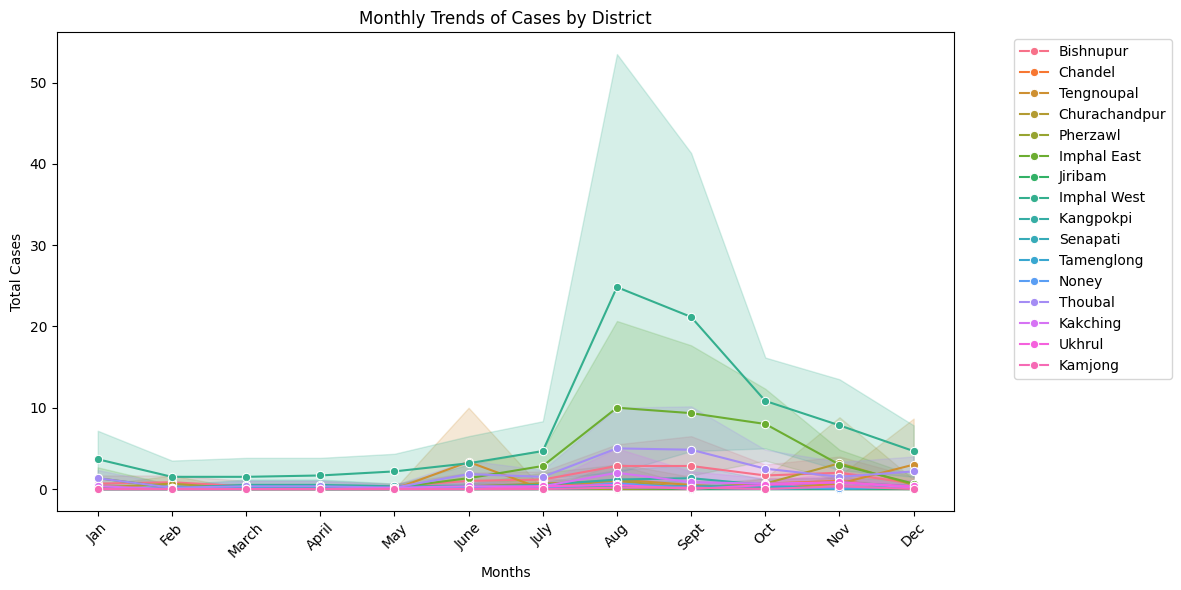

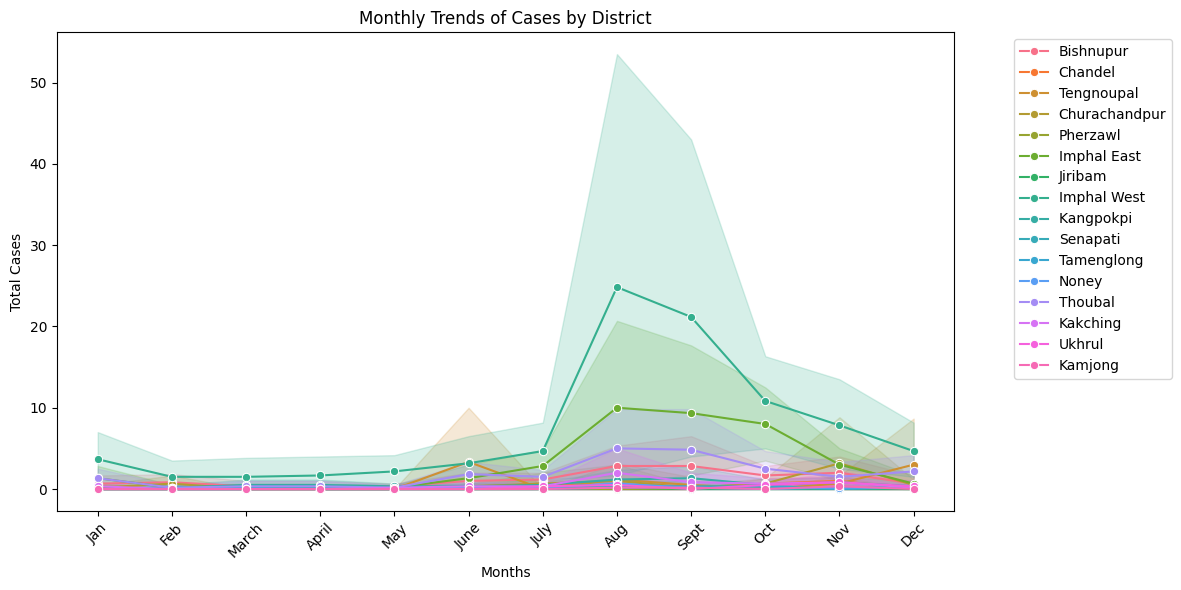

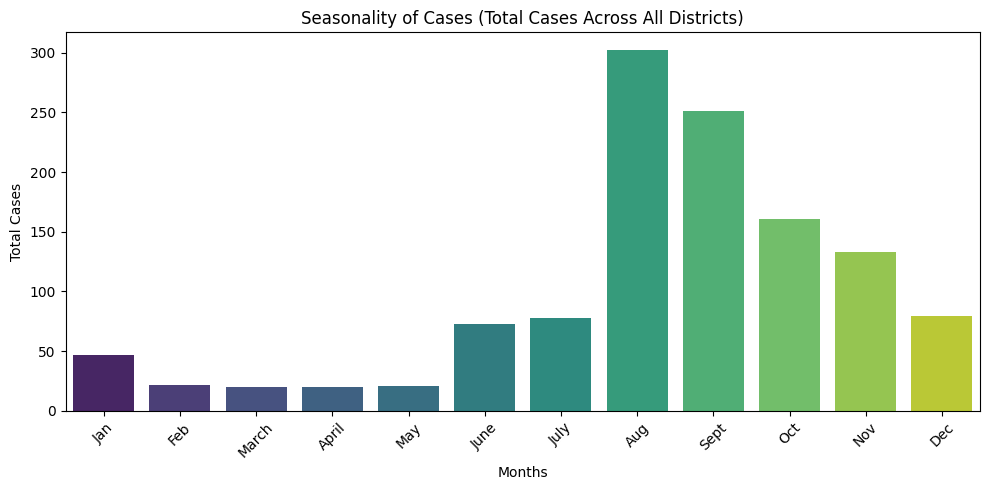

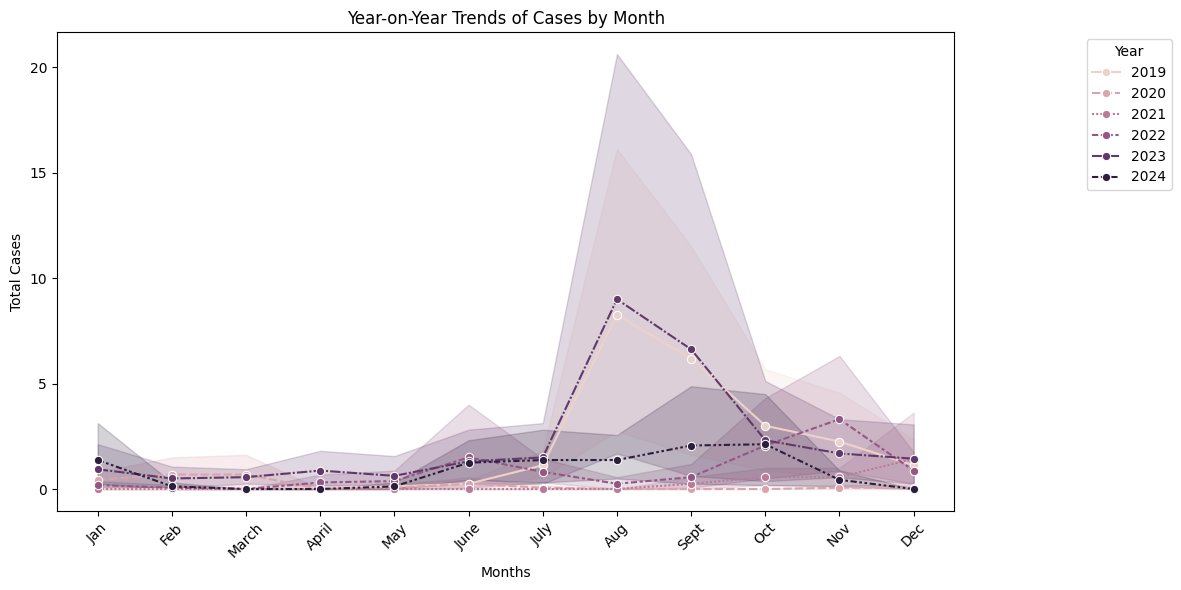

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Final Dataset.xlsx'  # Replace with the path to your file in Google Colab
sheet_name = 'Sheet'
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Convert 'Months' to a proper datetime-like format for analysis
month_order = ["Jan", "Feb", "March", "April", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]
data['Months'] = pd.Categorical(data['Months'], categories=month_order, ordered=True)

# Monthly Trends: Identify peaks and troughs in cases across months for each district
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Months', y='Total Cases', hue='District', marker="o")
plt.title('Monthly Trends of Cases by District')
plt.ylabel('Total Cases')
plt.xlabel('Months')
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

# Convert 'Months' to ordered categorical type
month_order = ["Jan", "Feb", "March", "April", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]
data['Months'] = pd.Categorical(data['Months'], categories=month_order, ordered=True)

# Ensure 'Year' is treated as a categorical or numeric type
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

# Monthly Trends: Identify peaks and troughs in cases across months for each district
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Months', y='Total Cases', hue='District', marker="o")
plt.title('Monthly Trends of Cases by District')
plt.ylabel('Total Cases')
plt.xlabel('Months')
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

# Seasonality Analysis: Aggregating data by month
seasonality = data.groupby('Months', observed=False).agg({'Total Cases': 'sum'}).sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=seasonality.index, y=seasonality['Total Cases'], hue=seasonality.index, dodge=False, palette='viridis', legend=False)
plt.title('Seasonality of Cases (Total Cases Across All Districts)')
plt.ylabel('Total Cases')
plt.xlabel('Months')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Year-on-Year Trends: Comparing cases for the same months across years
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Months', y='Total Cases', hue='Year', marker="o", style='Year')
plt.title('Year-on-Year Trends of Cases by Month')
plt.ylabel('Total Cases')
plt.xlabel('Months')
plt.xticks(rotation=45)
plt.legend(title='Year', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()


# Additional: Save the results to a summary file
# Ensure 'Months' is a properly ordered categorical column
month_order = ["Jan", "Feb", "March", "April", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]
data['Months'] = pd.Categorical(data['Months'], categories=month_order, ordered=True)

# Convert 'Year' to numeric, if not already
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

# Ensure 'District' is treated as a categorical column
data['District'] = data['District'].astype('category')

# Create the summary with observed=True
summary = data.groupby(['Year', 'Months', 'District'], observed=True).agg({'Total Cases': 'sum'}).reset_index()

# Save the summary to an Excel file
summary.to_excel('Summary_Analysis.xlsx', index=False)



# Analysis of Year-on-Year (YoY) Trends, we compared the cases for the same months across multiple years to identify changes or trends over time, revealing whether certain months consistently see an increase or decrease in cases across years.

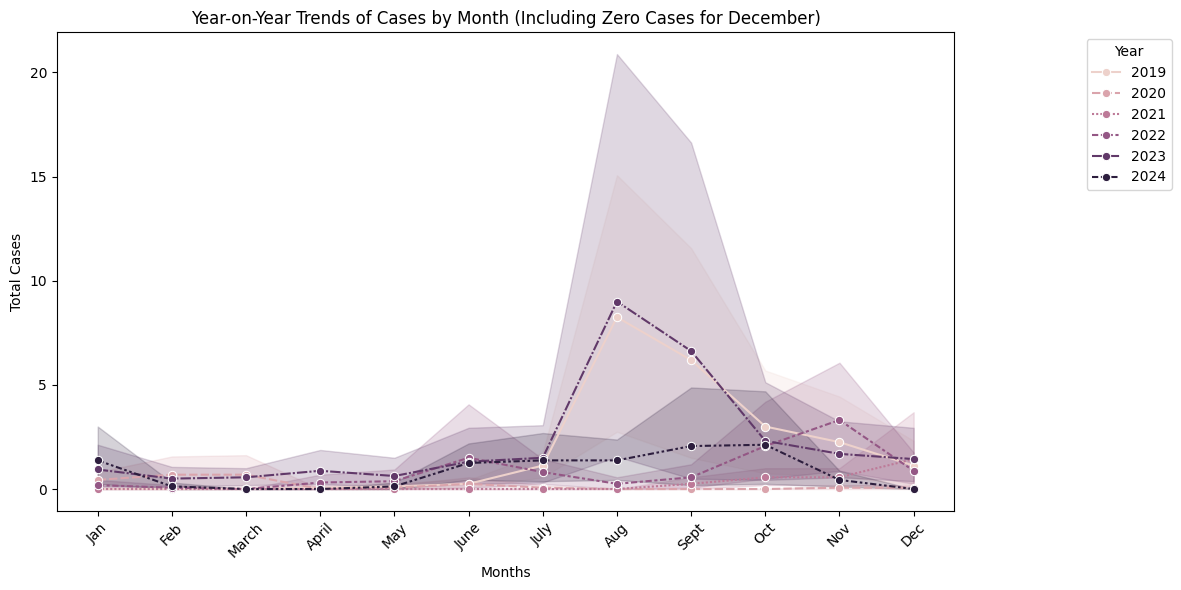

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Final Dataset.xlsx'  # Replace with the correct file path
sheet_name = 'Sheet'
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Convert 'Months' to a proper categorical format for ordering
month_order = ["Jan", "Feb", "March", "April", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]
data['Months'] = pd.Categorical(data['Months'], categories=month_order, ordered=True)

# Ensure 'Year' is treated as numeric
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

# Ensure 'District' is treated as a categorical column
data['District'] = data['District'].astype('category')

# Year-on-Year Trends: Comparing cases for the same months across years
# Ensure every month is represented, even if the data is missing or zero
all_months = pd.DataFrame({'Months': month_order})
complete_data = []
for district in data['District'].unique():
    for year in data['Year'].unique():
        temp_df = data[(data['District'] == district) & (data['Year'] == year)]
        temp_df = all_months.merge(temp_df, on='Months', how='left')
        temp_df['District'] = temp_df['District'].fillna(district)
        temp_df['Year'] = temp_df['Year'].fillna(year)
        temp_df['Total Cases'] = temp_df['Total Cases'].fillna(0)
        complete_data.append(temp_df)
data = pd.concat(complete_data)

# Plot Year-on-Year Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Months', y='Total Cases', hue='Year', marker="o", style='Year')
plt.title('Year-on-Year Trends of Cases by Month (Including Zero Cases for December)')
plt.ylabel('Total Cases')
plt.xlabel('Months')
plt.xticks(rotation=45)
plt.legend(title='Year', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()


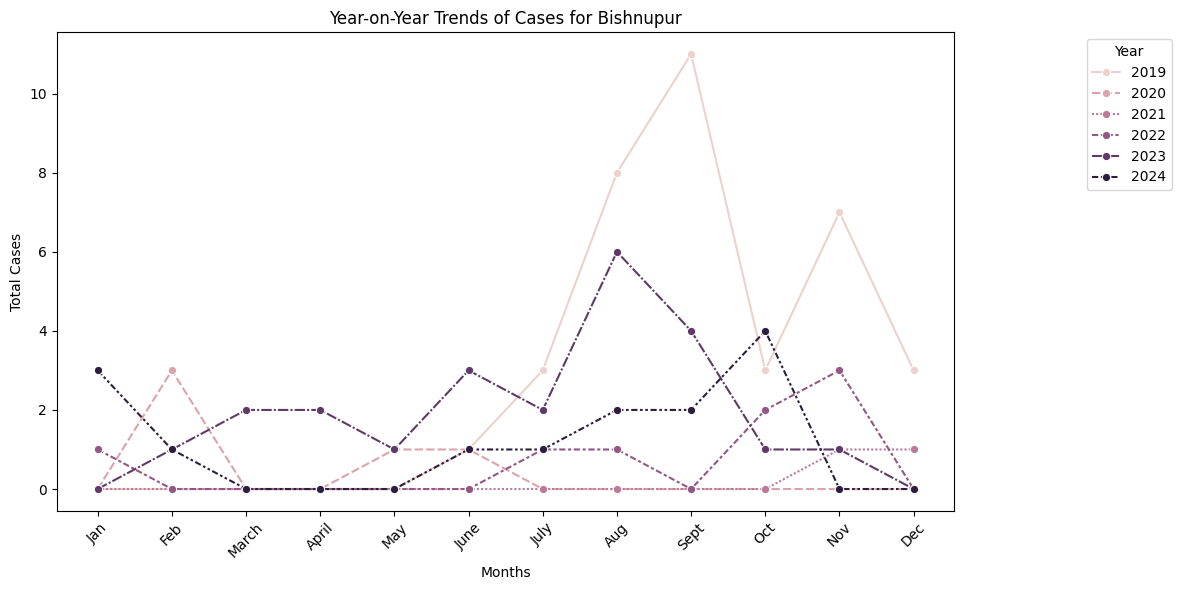

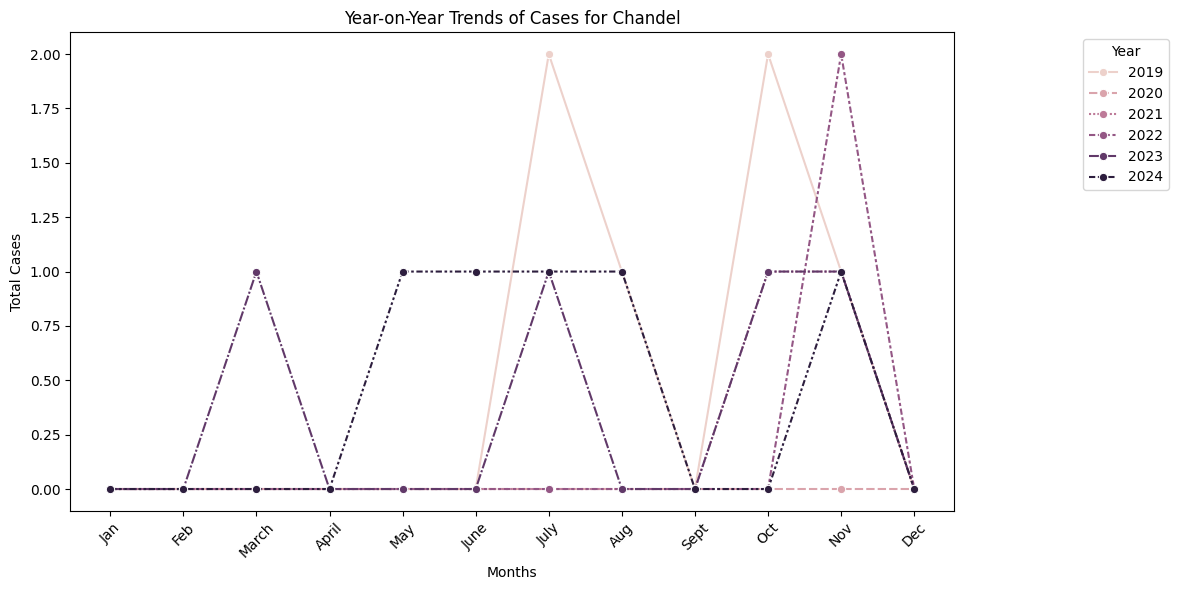

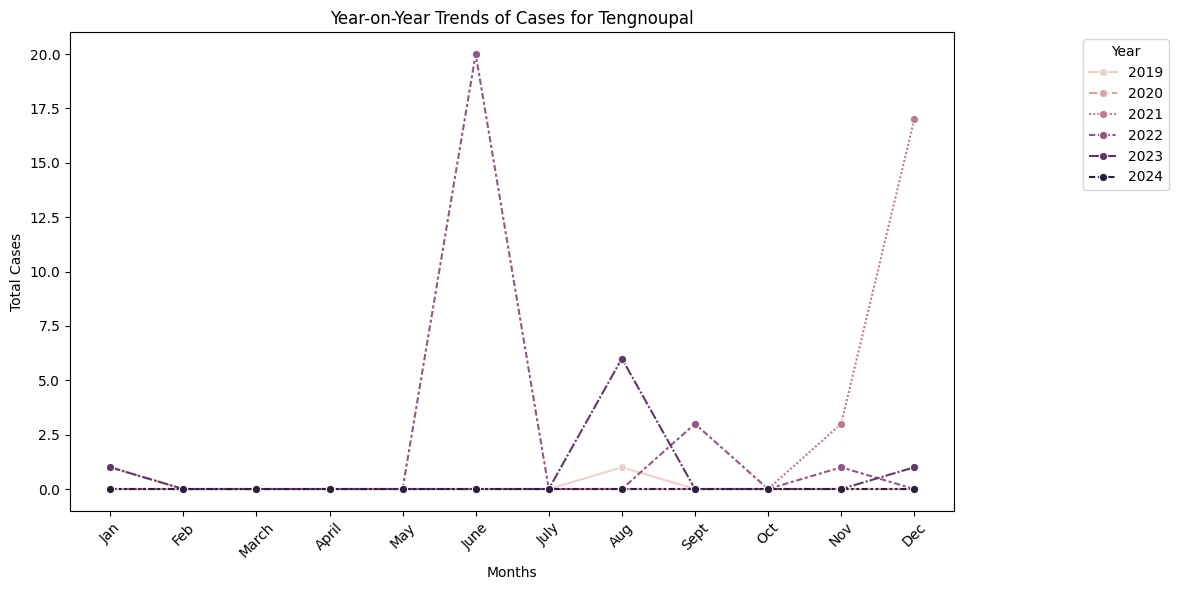

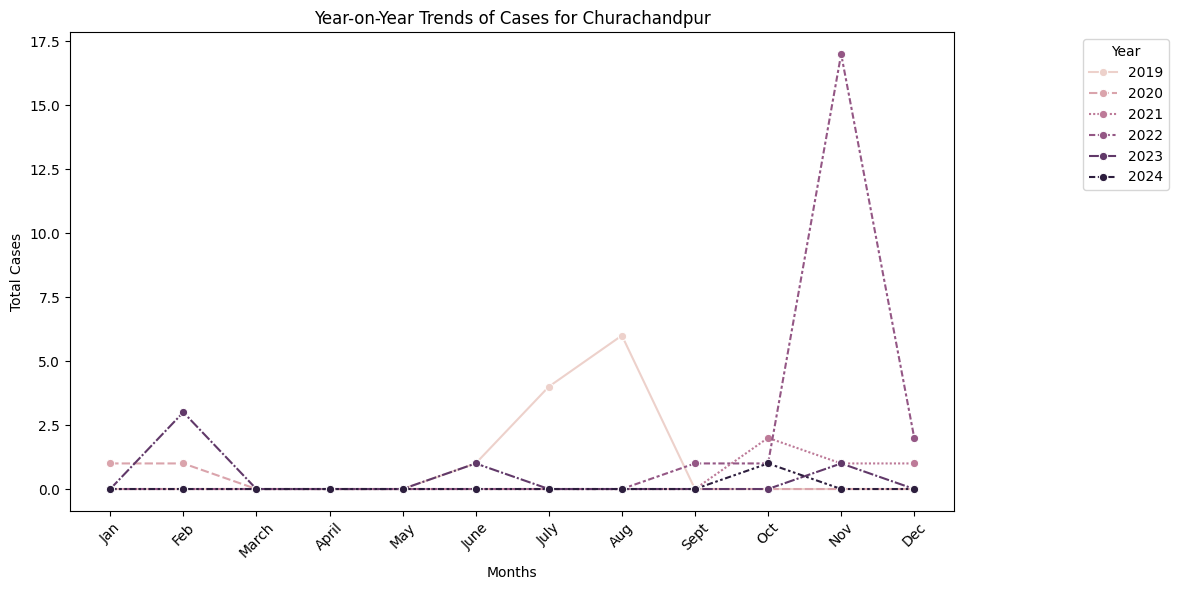

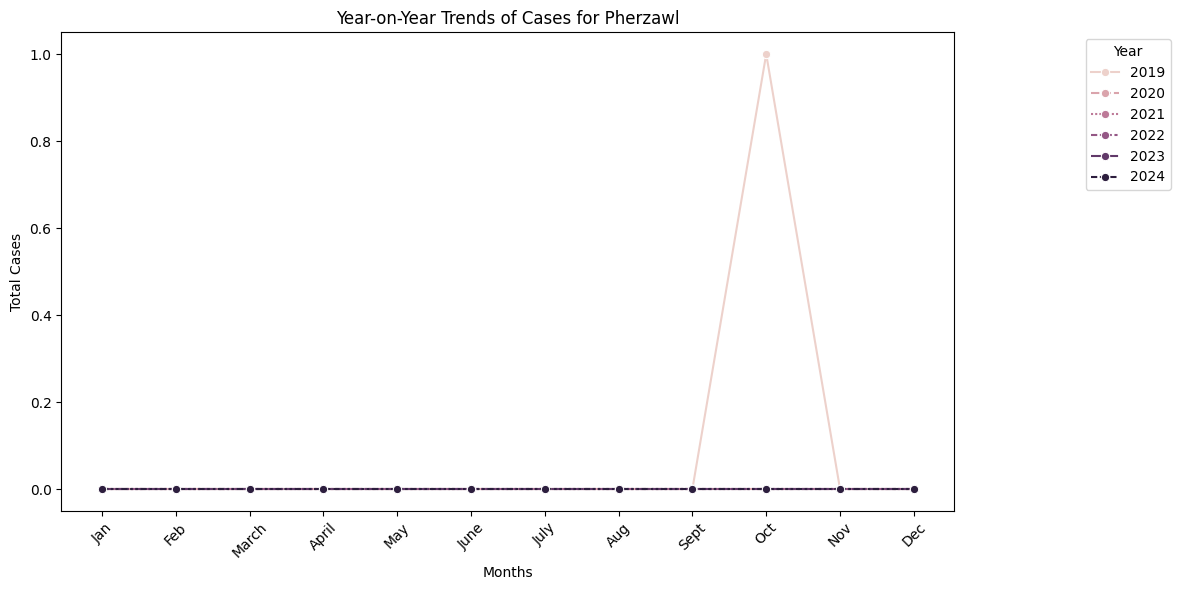

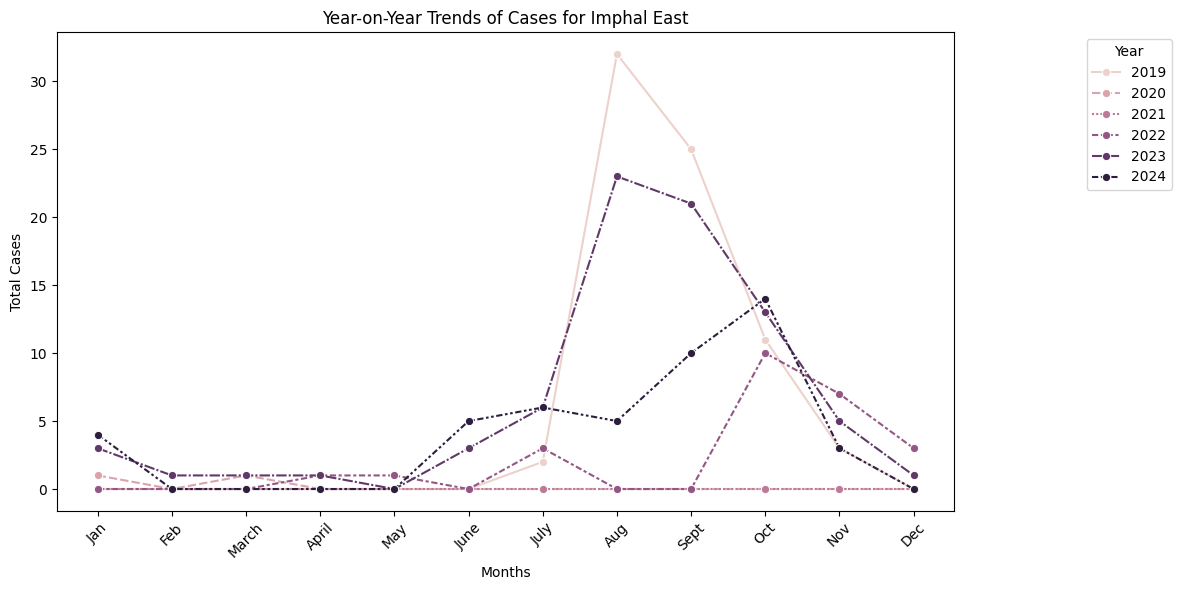

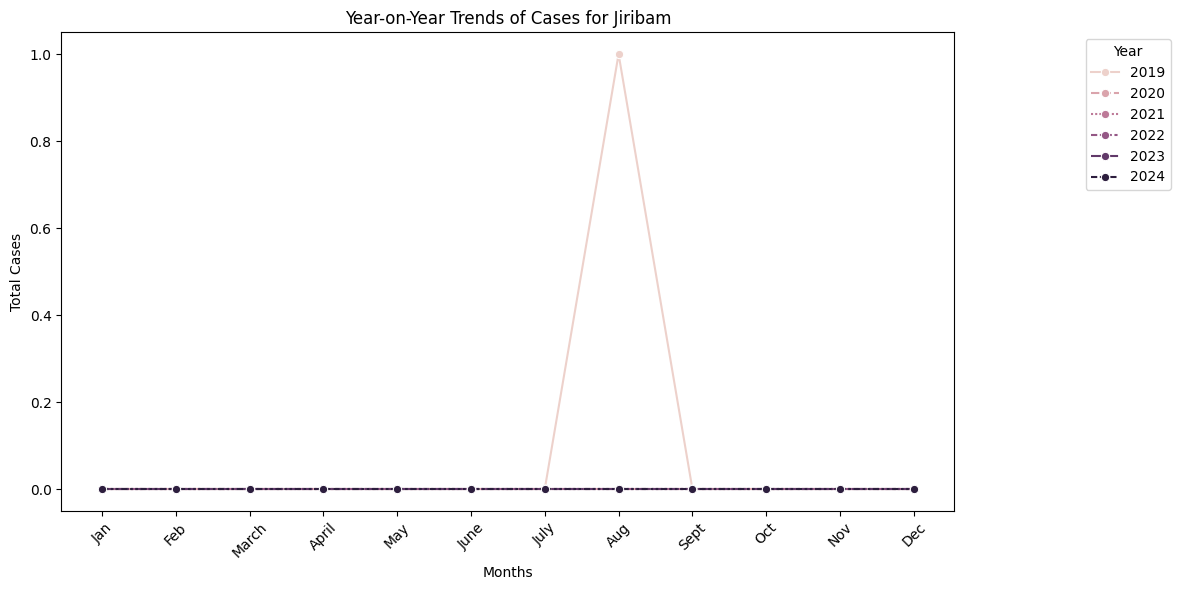

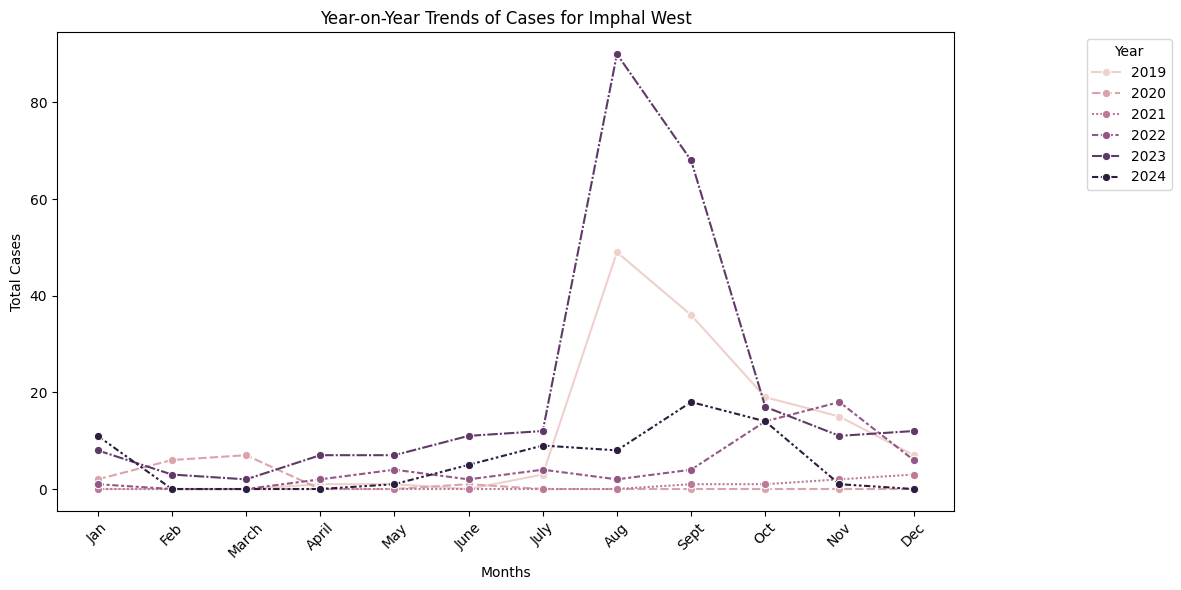

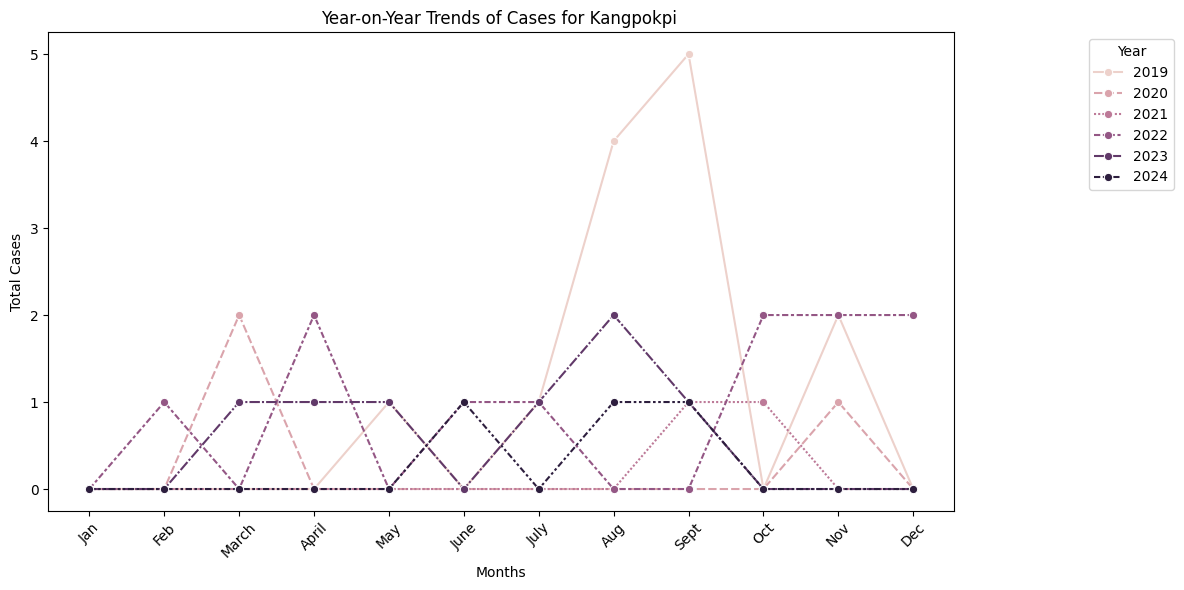

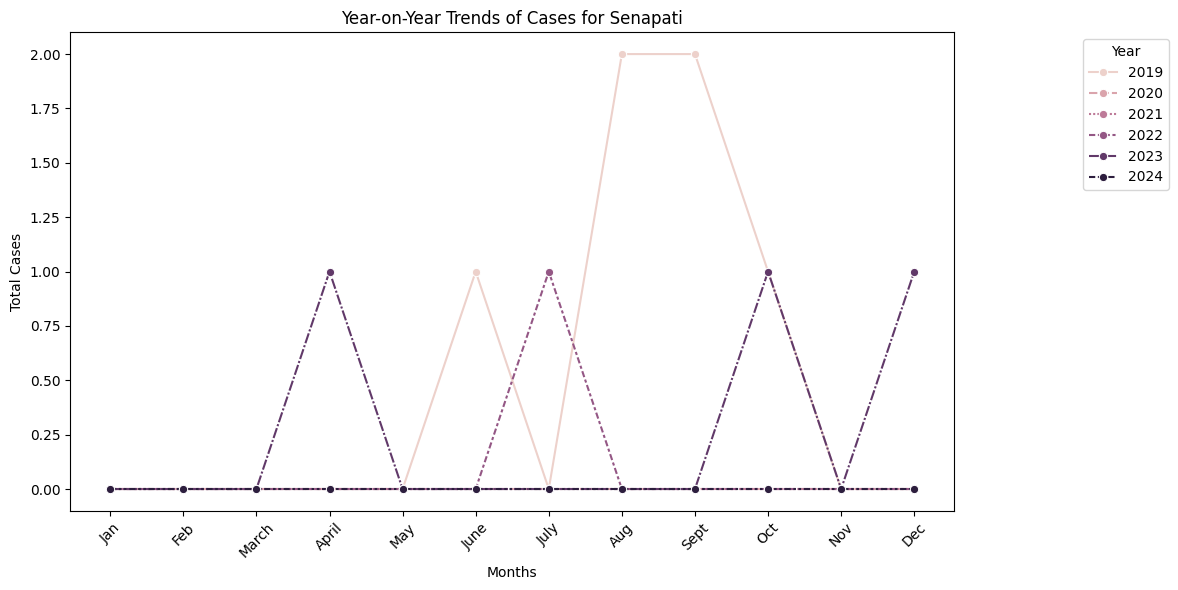

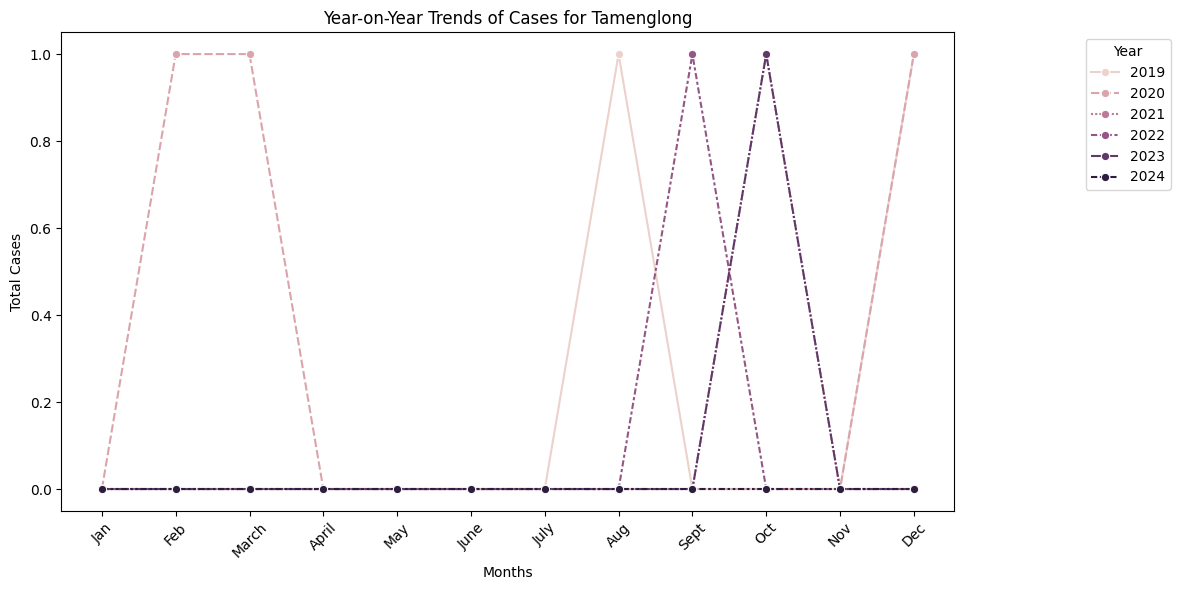

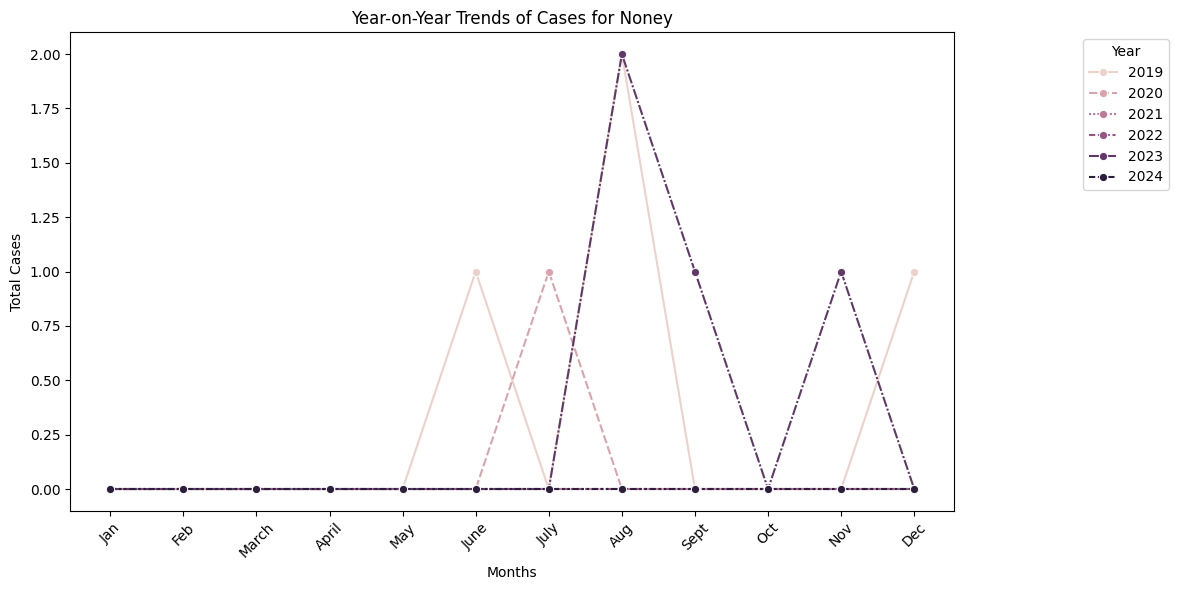

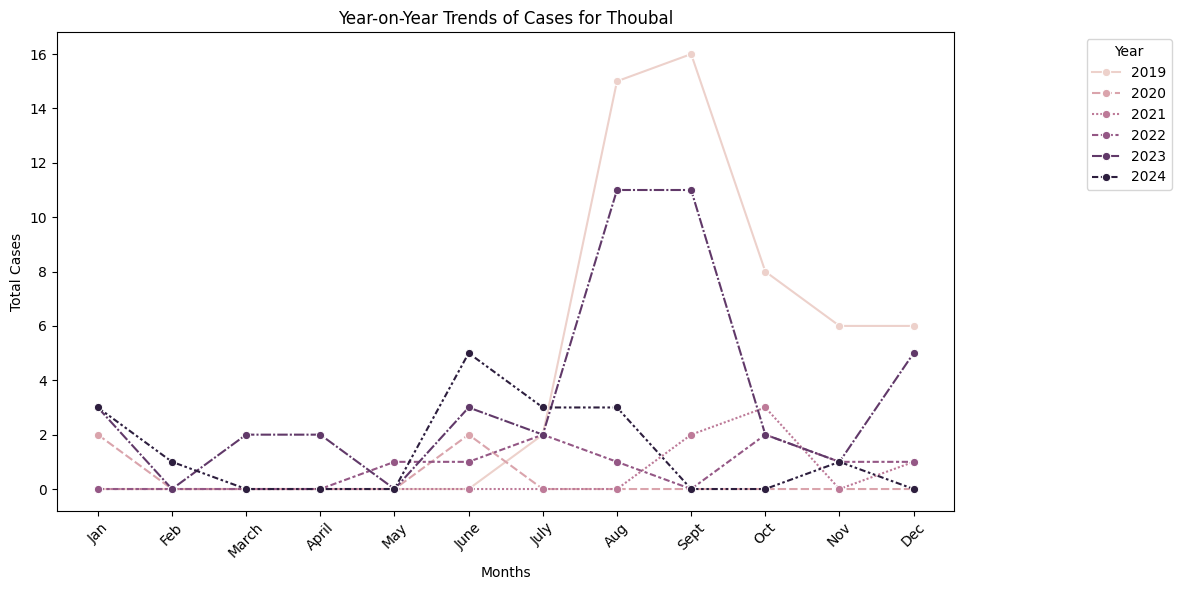

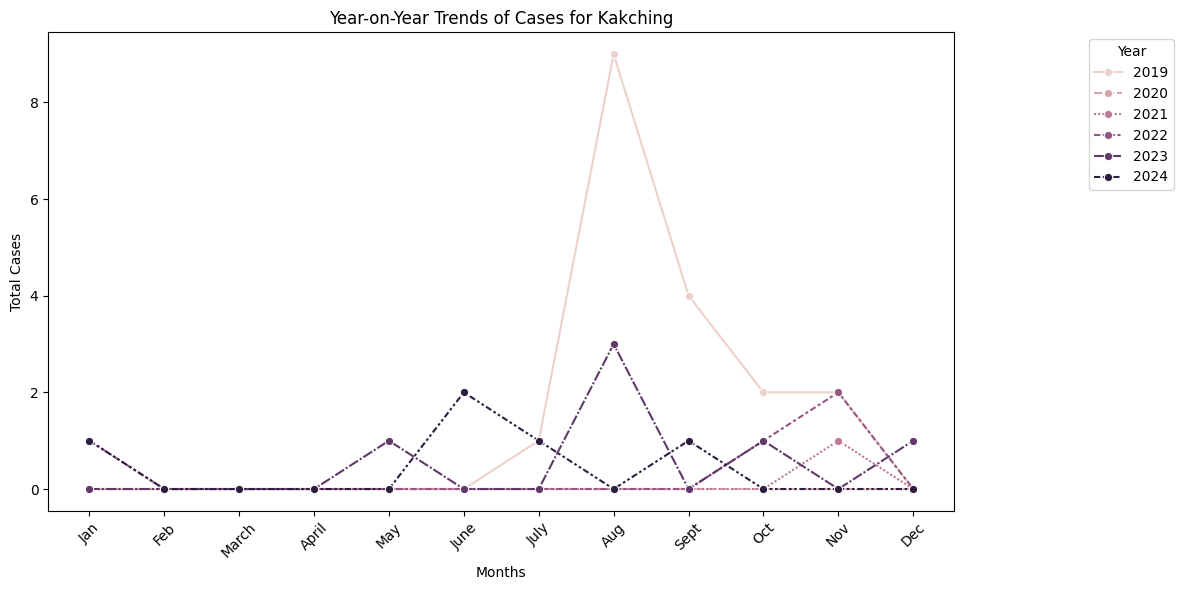

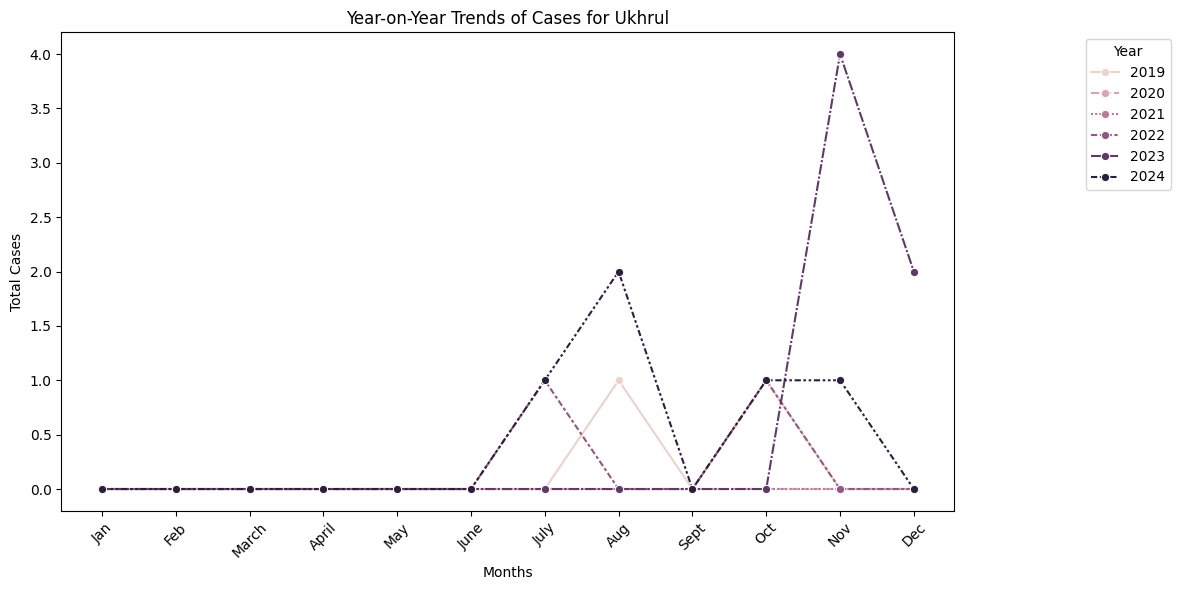

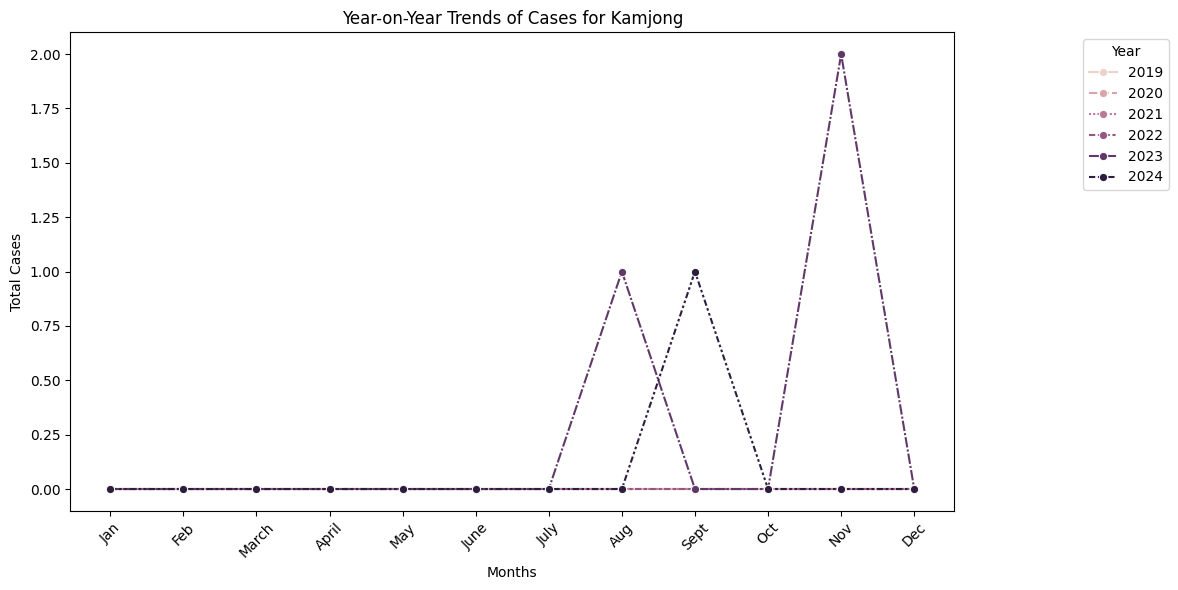

In [ ]:
# Plot Year-on-Year Trends for Each District
for district in data['District'].unique():
    district_data = data[data['District'] == district]

    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=district_data,
        x='Months',
        y='Total Cases',
        hue='Year',
        marker="o",
        style='Year'
    )
    plt.title(f'Year-on-Year Trends of Cases for {district}')
    plt.ylabel('Total Cases')
    plt.xlabel('Months')
    plt.xticks(rotation=45)
    plt.legend(title='Year', loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.tight_layout()
    plt.show()


# Analysis of District-Level Comparisons, we can aggregated the total cases for each district and identified the highest- and lowest-reporting districts. This analysis provided insights into the geographical distribution of cases.

<ipython-input-7-3acd69c88ff0>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  district_comparison = data.groupby("District")["Total Cases"].agg(


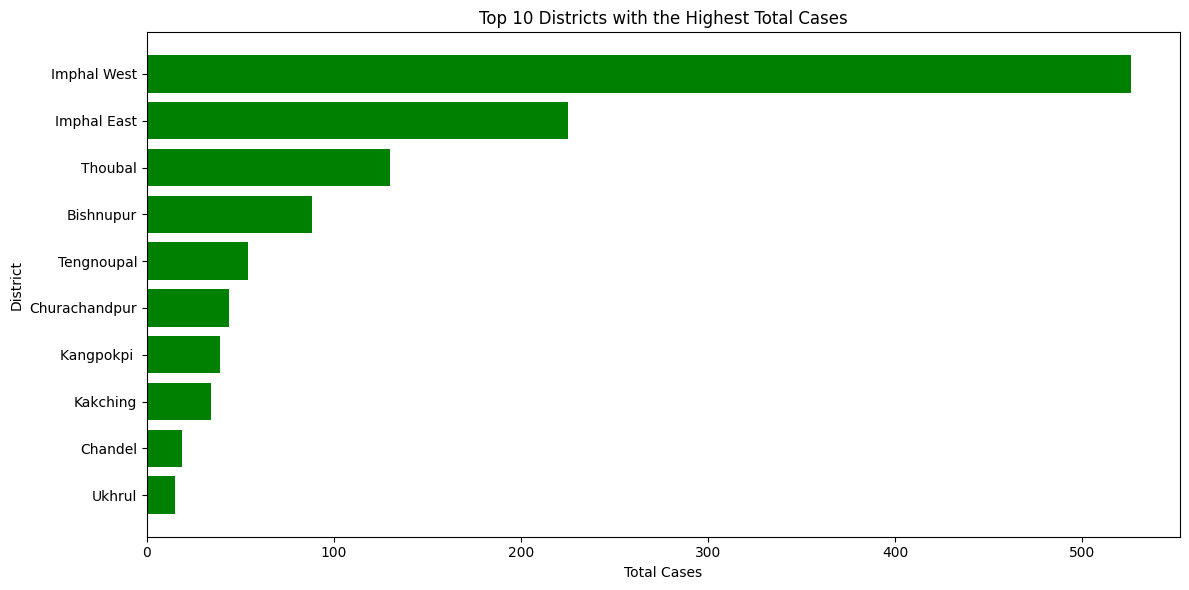

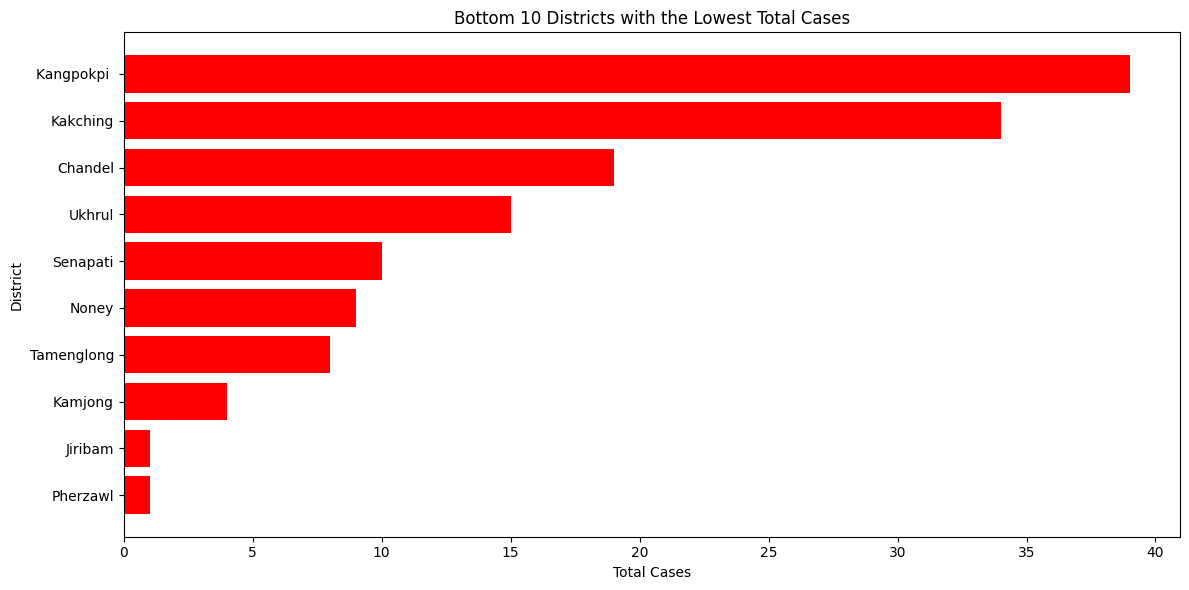

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 1: Group data by District to calculate total and average cases
district_comparison = data.groupby("District")["Total Cases"].agg(
    Total_Cases="sum", Average_Cases="mean"
).reset_index()

# Step 2: Sort districts by total cases
district_comparison = district_comparison.sort_values("Total_Cases", ascending=False)

# Step 3: Visualize the top 10 and bottom 10 districts
# Top 10 districts
top_10 = district_comparison.head(10)
plt.figure(figsize=(12, 6))
plt.barh(top_10["District"], top_10["Total_Cases"], color="green")
plt.title("Top 10 Districts with the Highest Total Cases")
plt.xlabel("Total Cases")
plt.ylabel("District")
plt.gca().invert_yaxis()  # Invert y-axis for horizontal bar chart
plt.tight_layout()
plt.show()

# Bottom 10 districts
bottom_10 = district_comparison.tail(10)
plt.figure(figsize=(12, 6))
plt.barh(bottom_10["District"], bottom_10["Total_Cases"], color="red")
plt.title("Bottom 10 Districts with the Lowest Total Cases")
plt.xlabel("Total Cases")
plt.ylabel("District")
plt.gca().invert_yaxis()  # Invert y-axis for horizontal bar chart
plt.tight_layout()
plt.show()

# Step 4: Save the district comparison results to an Excel file
output_file = "District_Comparison.xlsx"
district_comparison.to_excel(output_file, index=False)

# Step 5: Download the Excel file
from google.colab import files
files.download(output_file)


# Analysis of Clustering of Cases, we used spatial analysis techniques to identify areas with high or low incidences of cases.

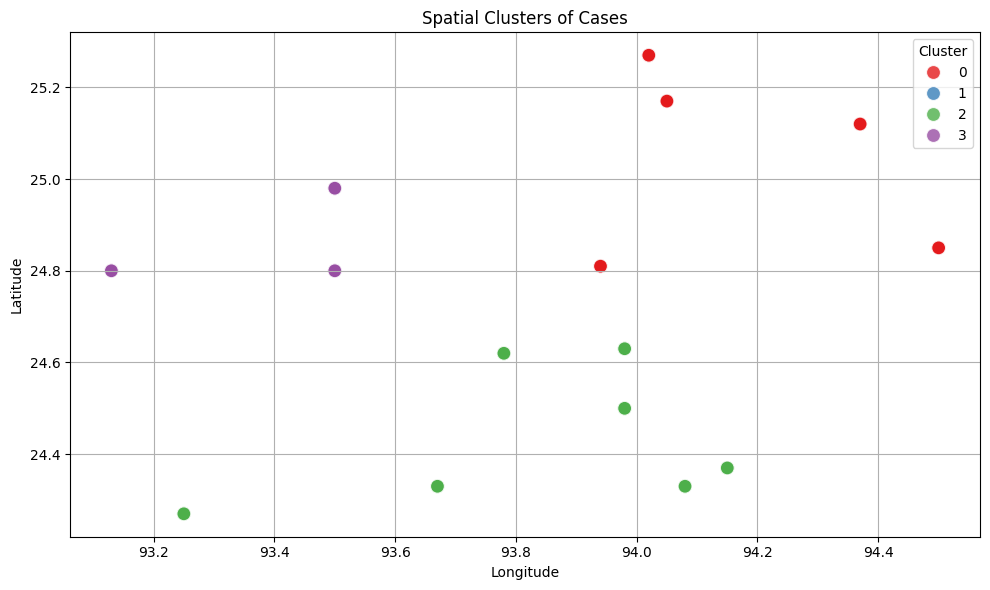

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Add latitude and longitude data for each district
district_coords = {
    "Imphal West": (24.81, 93.94),
    "Imphal East": (24.81, 93.94),
    "Tengnoupal": (24.37, 94.15),
    "Thoubal": (24.63, 93.98),
    "Bishnupur": (24.62, 93.78),
    "Churachandpur": (24.33, 93.67),
    "Kakching": (24.50, 93.98),
    "Senapati": (25.27, 94.02),
    "Kangpokpi": (25.17, 94.05),
    "Chandel": (24.33, 94.08),
    "Noney": (24.80, 93.50),
    "Ukhrul": (25.12, 94.37),
    "Tamenglong": (24.98, 93.50),
    "Kamjong": (24.85, 94.50),
    "Pherzawl": (24.27, 93.25),
    "Jiribam": (24.80, 93.13),
}

# Step 1: Clean district names and map coordinates to the dataset
data['District'] = data['District'].str.strip()
data['Latitude'] = data['District'].map(lambda x: district_coords[x][0] if x in district_coords else None)
data['Longitude'] = data['District'].map(lambda x: district_coords[x][1] if x in district_coords else None)

# Check if any districts are missing coordinates
missing_coords = data[data['Latitude'].isnull()]
if not missing_coords.empty:
    print("Missing coordinates for the following districts:")
    print(missing_coords["District"].unique())
else:
    # Step 2: Extract necessary columns and scale the data
    spatial_data = data[['District', 'Latitude', 'Longitude', 'Total Cases']].dropna()
    scaler = StandardScaler()
    spatial_data_scaled = scaler.fit_transform(spatial_data[['Latitude', 'Longitude', 'Total Cases']])

    # Step 3: Apply K-Means Clustering
    n_clusters = 4  # You can adjust this number based on your analysis
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    spatial_data['Cluster'] = kmeans.fit_predict(spatial_data_scaled)

    # Step 4: Visualize the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=spatial_data['Longitude'],
        y=spatial_data['Latitude'],
        hue=spatial_data['Cluster'],
        palette='Set1',
        s=100,
        alpha=0.8
    )
    plt.title('Spatial Clusters of Cases')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(title='Cluster')
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Step 5: Save the cluster results to an Excel file
    output_file = 'Spatial_Clusters.xlsx'
    spatial_data.to_excel(output_file, index=False)

    # Step 6: Download the processed file
    from google.colab import files
    files.download(output_file)


Creation of a table summarizing of the clusters with total cases, district names, and patterns.

Started with the dataset containing the cluster information, latitude, longitude, district names, and case counts.
Grouped the data by clusters and computed the summary statistics, such as the total cases in each cluster.


   Cluster  Total_Cases                                     District_Names  \
0        0          544  Imphal East, Imphal West, Kangpokpi, Senapati,...   
1        1          275                           Imphal East, Imphal West   
2        2          370  Bishnupur, Chandel, Tengnoupal, Churachandpur,...   
3        3           18                         Jiribam, Tamenglong, Noney   

   Avg_Latitude  Avg_Longitude     Pattern  
0     25.007283      94.138970  High cases  
1     24.810000      93.940000  High cases  
2     24.435714      93.841429  High cases  
3     24.860000      93.376667  High cases  
Summary table saved as 'Cluster_Summary.csv'


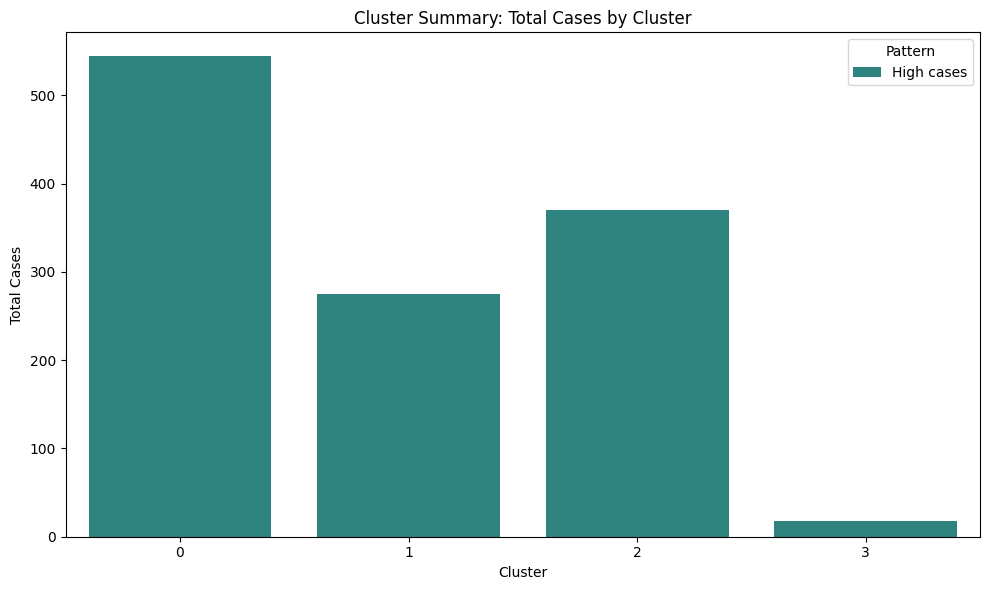

In [ ]:
import pandas as pd

# Ensure the spatial_data DataFrame from the clustering step is available
# Group by cluster and compute summary statistics
summary = spatial_data.groupby('Cluster').agg(
    Total_Cases=('Total Cases', 'sum'),  # Use 'Total Cases' from the dataset
    District_Names=('District', lambda x: ', '.join(x.unique())),
    Avg_Latitude=('Latitude', 'mean'),
    Avg_Longitude=('Longitude', 'mean')
).reset_index()

# Identify patterns based on total cases (e.g., spatial distribution or case intensity)
# Adjust the threshold based on the context of your data
summary['Pattern'] = summary['Total_Cases'].apply(
    lambda x: 'High cases' if x > spatial_data['Total Cases'].mean() else 'Low cases'
)

# Display the summary table
print(summary)

# Save the summary table to a CSV file
output_summary_file = 'Cluster_Summary.csv'
summary.to_csv(output_summary_file, index=False)
print(f"Summary table saved as '{output_summary_file}'")

# Optionally, display a summary plot of clusters and their patterns
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Cluster',
    y='Total_Cases',
    data=summary,
    palette='viridis',
    hue='Pattern'
)
plt.title('Cluster Summary: Total Cases by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Cases')
plt.legend(title='Pattern')
plt.tight_layout()
plt.show()


Results Interpretation:
Cluster 0:

Total Cases: 544
Districts: Includes a mix of districts such as Imphal East, Imphal West, Kangpokpi, and others.
Average Location: Latitude ~25.01, Longitude ~94.14.
Pattern: High cases (as total cases exceed the calculated threshold).
Cluster 1:

Total Cases: 275
Districts: Imphal East and Imphal West.
Average Location: Latitude ~24.81, Longitude ~93.94.
Pattern: High cases.
Cluster 2:

Total Cases: 370
Districts: Includes Bishnupur, Chandel, Tengnoupal, Churachandpur, and others.
Average Location: Latitude ~24.44, Longitude ~93.84.
Pattern: High cases.
Cluster 3:

Total Cases: 18
Districts: Jiribam, Tamenglong, and Noney.
Average Location: Latitude ~24.86, Longitude ~93.38.
Pattern: High cases (due to the chosen threshold; this could be revisited if you want a more refined pattern classification).

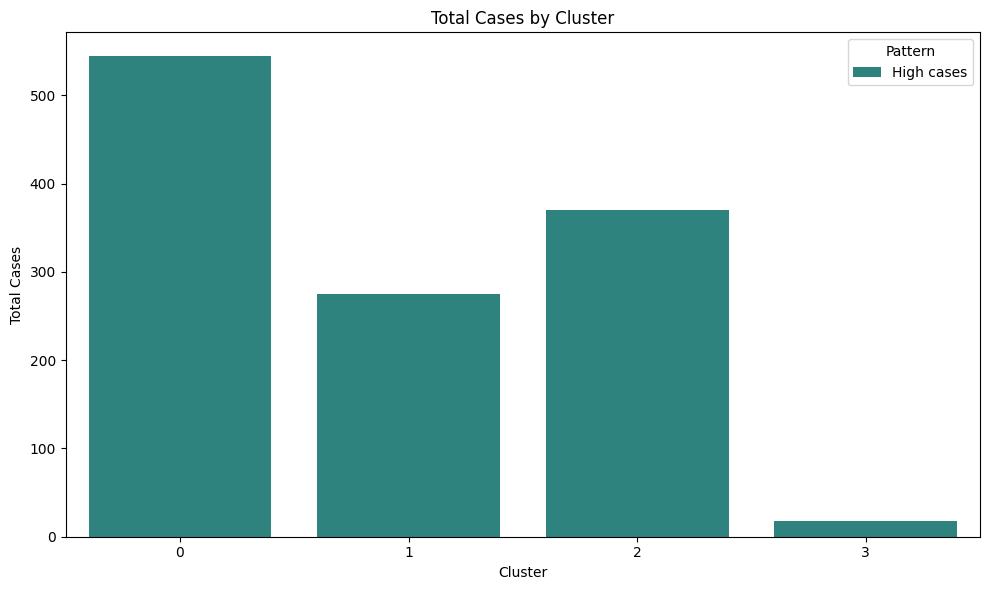

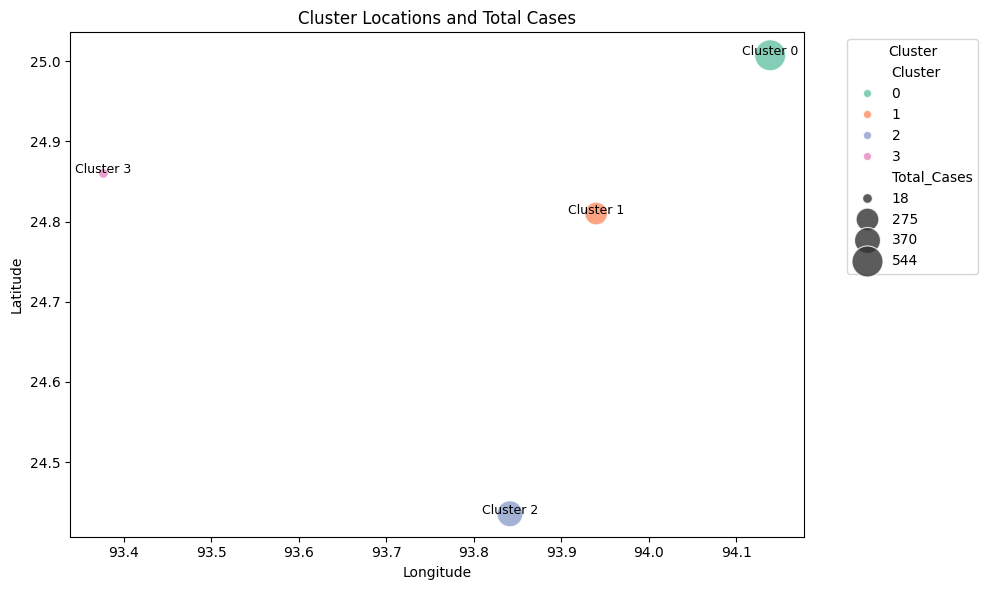

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated cluster summary data based on your results
summary = pd.DataFrame({
    'Cluster': [0, 1, 2, 3],
    'Total_Cases': [544, 275, 370, 18],
    'District_Names': [
        'Imphal East, Imphal West, Kangpokpi, Senapati, ...',
        'Imphal East, Imphal West',
        'Bishnupur, Chandel, Tengnoupal, Churachandpur, ...',
        'Jiribam, Tamenglong, Noney'
    ],
    'Avg_Latitude': [25.007283, 24.810000, 24.435714, 24.860000],
    'Avg_Longitude': [94.138970, 93.940000, 93.841429, 93.376667],
    'Pattern': ['High cases', 'High cases', 'High cases', 'High cases']
})

# Bar chart: Total Cases by Cluster
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Cluster',
    y='Total_Cases',
    data=summary,
    palette='viridis',
    hue='Pattern'
)
plt.title('Total Cases by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Cases')
plt.legend(title='Pattern')
plt.tight_layout()
plt.show()

# Scatter plot: Cluster Locations and Total Cases
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Avg_Longitude',
    y='Avg_Latitude',
    size='Total_Cases',
    hue='Cluster',
    sizes=(50, 500),
    palette='Set2',
    data=summary,
    alpha=0.8
)
for i, row in summary.iterrows():
    plt.text(
        row['Avg_Longitude'],
        row['Avg_Latitude'],
        f"Cluster {row['Cluster']}",
        fontsize=9,
        ha='center'
    )

plt.title('Cluster Locations and Total Cases')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


The Cluster Locations and Total Cases scatter plot provides spatial insights into how clusters of districts are distributed geographically and how they differ in total case counts. Here's an interpretation of the result:

Key Observations
Geographical Spread of Clusters:

The clusters are represented by distinct average latitude and longitude values, indicating their spatial grouping.
For example:
Cluster 0 spans a relatively northern region with higher longitude values.
Cluster 2 is located in a more southern-central area.
Cluster 3 is farther west, likely representing more isolated or rural districts.
Case Intensity by Cluster:

The size of the markers reflects the Total Cases in each cluster.
Cluster 0 has the largest size, signifying the highest total cases (544).
Cluster 3 has the smallest size, with the fewest cases (18).
High Case Patterns Across Clusters:

All clusters were labeled as "High Cases" in the summary data, suggesting an overall significant disease burden.
However, within this high-burden context, Cluster 3 stands out with much lower total cases, indicating a potentially less affected or less densely populated area.
Regional Hotspots:

Clusters located closer to urban areas (e.g., Cluster 1 with Imphal East and Imphal West) tend to have substantial case counts.
Regions like Cluster 2, covering several districts, may reflect more distributed cases across rural or semi-urban areas.
Potential Hypotheses and Actionable Insights
Cluster 0 (544 cases):

The presence of multiple districts suggests this could be a regional hotspot with higher population density or better surveillance/reporting mechanisms.
Further analysis could focus on identifying drivers of high cases (e.g., urbanization, health access, or outbreak clusters).
Cluster 3 (18 cases):

This cluster’s low total cases may indicate:
Effective containment or lower population density.
Underreporting or limited healthcare infrastructure in these regions.
Investigating these districts (e.g., Jiribam, Tamenglong, Noney) could help verify reporting accuracy.
Geographic Patterns:

Clusters with higher latitude and longitude values (e.g., Cluster 0) may be closer to urbanized or more connected areas, while clusters with lower longitude (e.g., Cluster 3) represent more remote or rural zones.
Public Health Focus:

Resource allocation could prioritize hotspots like Cluster 0 for immediate interventions.
Capacity-building efforts could focus on lower-burden clusters to prevent potential surges in cases.


In [ ]:
pip install --upgrade pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 91.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.


<ipython-input-12-610546cbb16c>:46: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x[['Total Cases', 'Temperature (°C)']].corr().iloc[0, 1])  # Exclude other columns


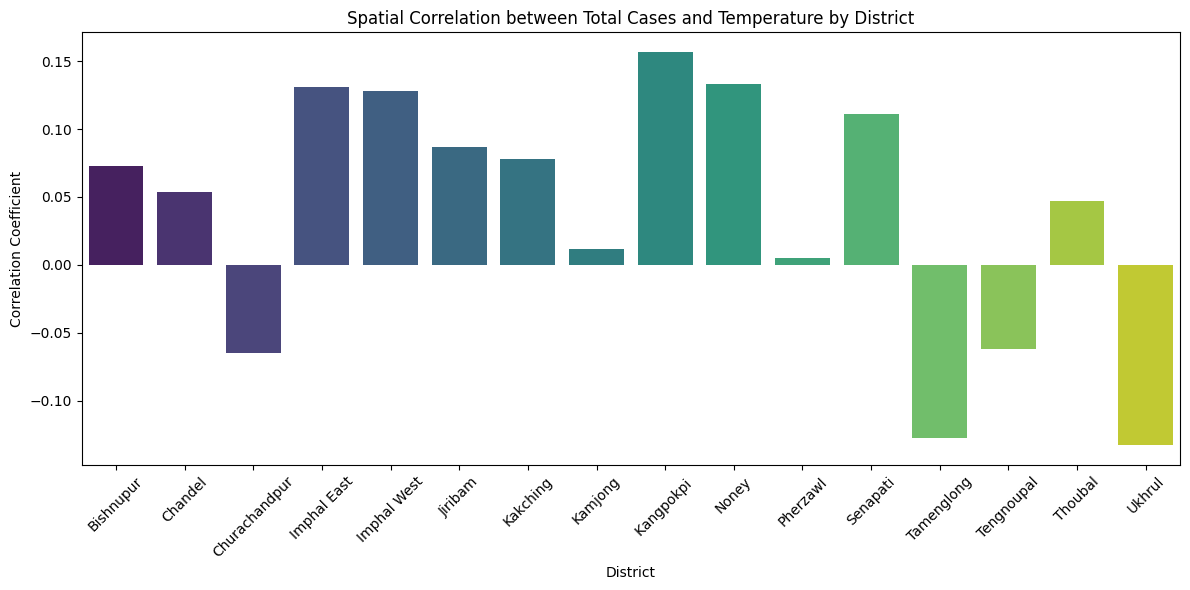

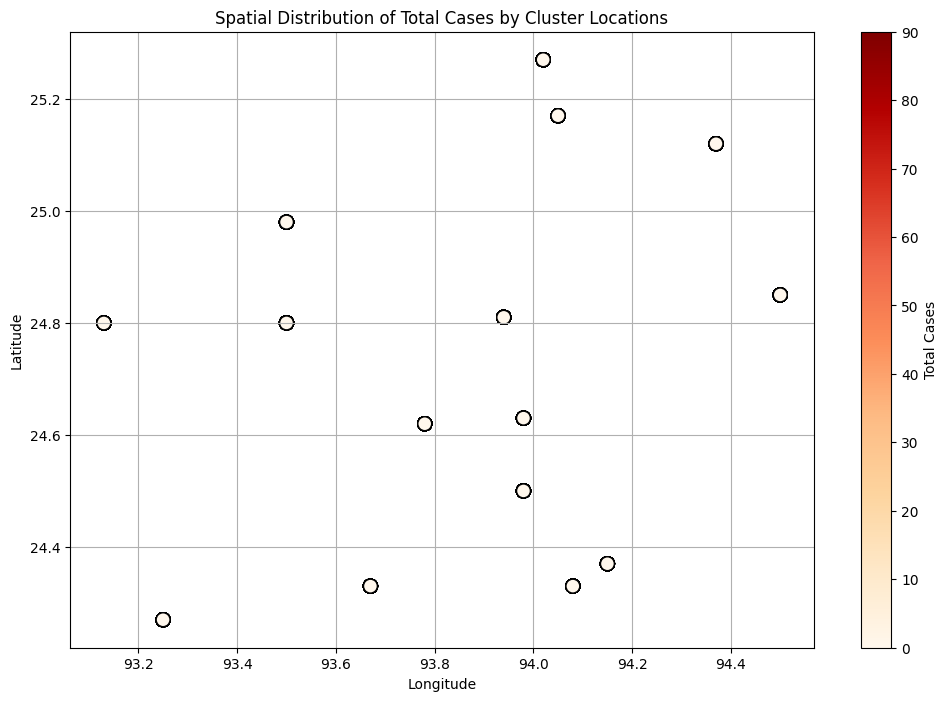

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the case dataset
file_path = '/content/Final Dataset.xlsx'  # Replace with the path to your file in Google Colab
sheet_name = 'Sheet'
case_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Convert 'Months' to a proper datetime-like format for analysis
month_order = ["Jan", "Feb", "March", "April", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]
case_data['Months'] = pd.Categorical(case_data['Months'], categories=month_order, ordered=True)

# Ensure 'Year' is treated as a numeric type
case_data['Year'] = pd.to_numeric(case_data['Year'], errors='coerce')

# Ensure 'District' is treated as a categorical column
case_data['District'] = case_data['District'].astype('category')

# Load the climate data
climate_file_path = '/content/climate_data.xlsx'  # Replace with the path to your climate data file in Google Colab
climate_data = pd.read_excel(climate_file_path)

# Split 'Year' and 'Month' properly if they're in the same column
climate_data[['Year', 'Month']] = climate_data['Year'].str.extract(r'(\d{4})-(\d{2})')
climate_data['Year'] = climate_data['Year'].astype(int)
climate_data['Month'] = climate_data['Month'].map({
    '01': 'Jan', '02': 'Feb', '03': 'March', '04': 'April', '05': 'May', '06': 'June',
    '07': 'July', '08': 'Aug', '09': 'Sept', '10': 'Oct', '11': 'Nov', '12': 'Dec'
})

# Ensure 'Month' column in climate data is properly ordered
climate_data['Month'] = pd.Categorical(climate_data['Month'], categories=month_order, ordered=True)

# Merge the case data with the climate data on Year and Months
merged_data = pd.merge(case_data, climate_data, left_on=['Year', 'Months'], right_on=['Year', 'Month'], how='left')

# Load the cluster location data from the Excel file
cluster_file_path = '/content/Spatial_Clusters.xlsx'  # Replace with the path to your cluster location file
cluster_data = pd.read_excel(cluster_file_path)

# Perform spatial correlation analysis
correlations = (
    merged_data
    .groupby('District', observed=False)  # Group by District
    .apply(lambda x: x[['Total Cases', 'Temperature (°C)']].corr().iloc[0, 1])  # Exclude other columns
)


# Convert the correlations to a DataFrame for easier plotting
correlation_df = correlations.reset_index(name='Correlation')

# Plot the correlation results
plt.figure(figsize=(12, 6))
sns.barplot(
    x='District',
    y='Correlation',
    data=correlation_df,
    palette='viridis',
    hue='District',
    dodge=False,
    legend=False
)
plt.title('Spatial Correlation between Total Cases and Temperature by District')
plt.ylabel('Correlation Coefficient')
plt.xlabel('District')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Map visualization using cluster data
plt.figure(figsize=(12, 8))
plt.scatter(
    cluster_data['Longitude'], cluster_data['Latitude'],
    c=cluster_data['Total Cases'], cmap='OrRd', s=100, edgecolor='k'
)
plt.colorbar(label='Total Cases')
plt.title('Spatial Distribution of Total Cases by Cluster Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()


The bar chart titled "Spatial Correlation between Total Cases and Temperature by District" shows the correlation coefficients between total dengue cases and temperature across various districts in Manipur. Here's an analysis of the results:

Positive Correlation: Some districts exhibit a positive correlation between temperature and dengue cases. This suggests that higher temperatures are associated with an increase in dengue cases. For example:

Imphal East

Kangpokpi

Thoubal

Negative Correlation: Other districts show a negative correlation, indicating that higher temperatures are associated with a decrease in dengue cases. This suggests that temperature may have a different impact on dengue cases in these areas, possibly due to other environmental or demographic factors. For example:

Ukhrul

Tamenglong

Chandel

Low or No Correlation: Some districts show low or no correlation, suggesting that temperature alone may not significantly impact dengue cases. These districts may be influenced more by other factors such as precipitation, NDVI, or socio-economic variables. For example:

Bishnupur

Senapati

Jiribam

Key Insights:
Heterogeneity in Impact: The variation in correlation coefficients across districts highlights the localized and complex nature of the relationship between climate change and dengue cases. Different districts may have unique environmental conditions, population densities, healthcare facilities, and travel patterns that influence the spread of dengue.

Potential for Targeted Interventions: Understanding these correlations can help in designing targeted interventions. For example, districts with a positive correlation may benefit from measures aimed at reducing mosquito breeding sites during warmer months, while districts with a negative correlation may need to focus on other factors.

Need for Comprehensive Analysis: Temperature is just one aspect of climate change. Integrating additional variables such as precipitation, NDVI (Normalized Difference Vegetation Index), and socio-economic factors could provide a more comprehensive understanding of the drivers of dengue cases in these regions.

Overall, this analysis underscores the importance of considering local context and multiple factors when assessing the impact of climate change on dengue cases. If you have any specific questions or need further analysis, feel free to let me know!

<ipython-input-13-aab666effc0e>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Year', 'Months', 'District'])


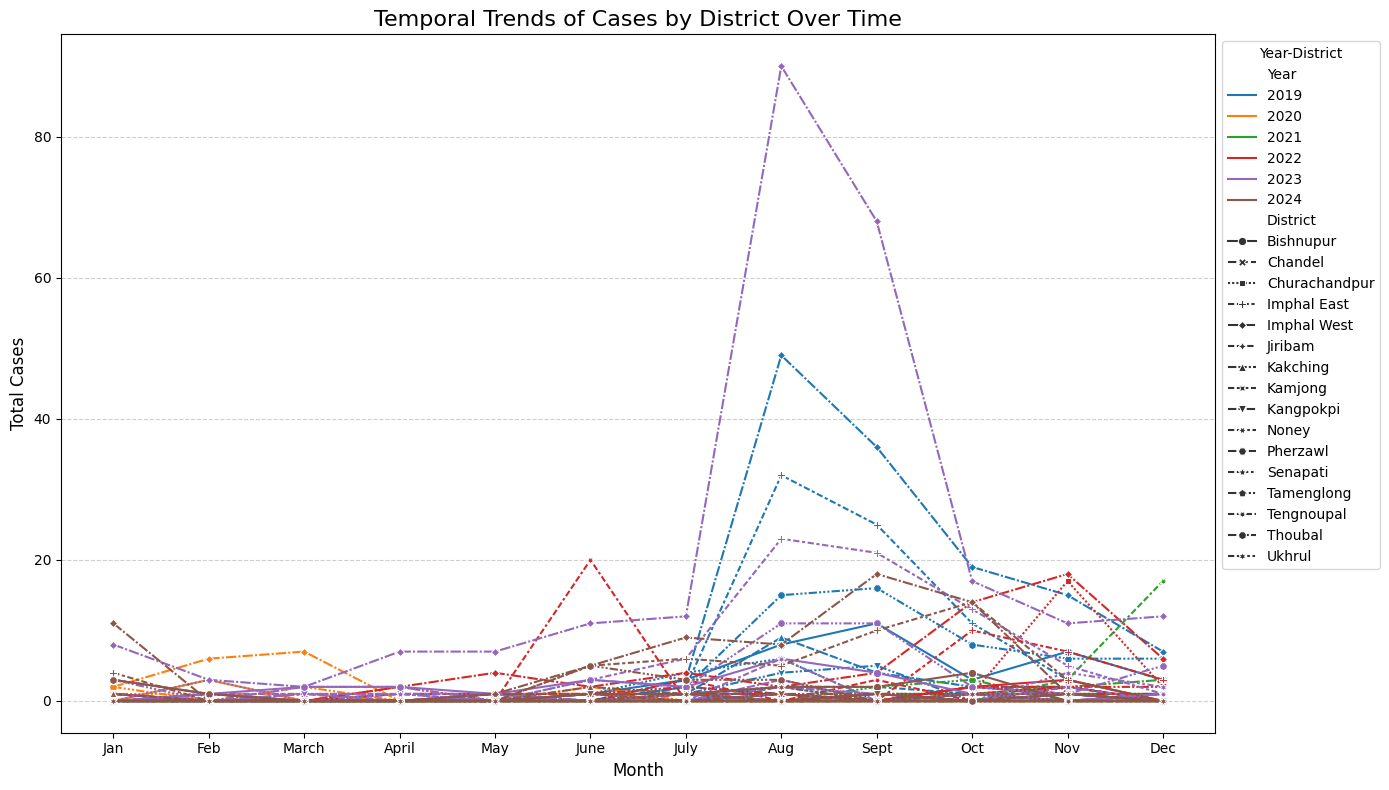

<ipython-input-13-aab666effc0e>:35: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  temporal_pivot = temporal_trends.pivot_table(index='District', columns=['Year', 'Months'], values='total_cases', fill_value=0)


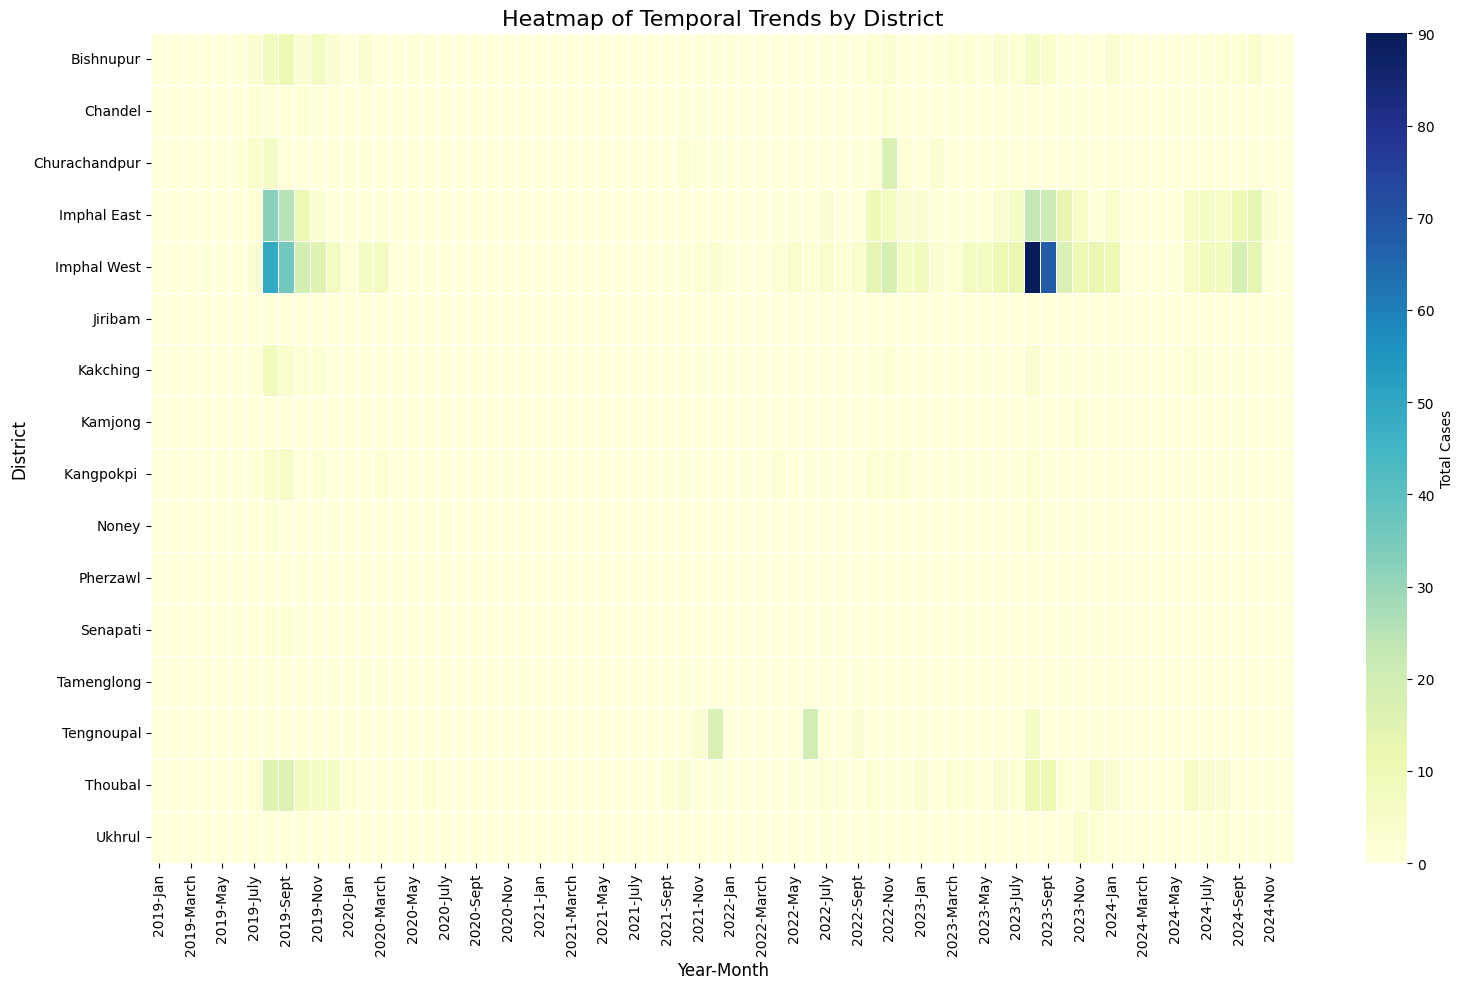

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Aggregate cases over time
temporal_trends = (
    merged_data
    .groupby(['Year', 'Months', 'District'])
    .agg(total_cases=('Total Cases', 'sum'))
    .reset_index()
)

# Step 2: Sort data by time for visualization
temporal_trends = temporal_trends.sort_values(['Year', 'Months'], key=lambda col: col.map(month_order.index) if col.name == 'Months' else col)

# Step 3: Create a line plot for temporal trends
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=temporal_trends,
    x='Months',
    y='total_cases',
    hue='Year',
    style='District',
    markers=True,
    palette='tab10',
)
plt.title('Temporal Trends of Cases by District Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Cases', fontsize=12)
plt.legend(title='Year-District', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Optional: Create a heatmap to show temporal trends for each district
temporal_pivot = temporal_trends.pivot_table(index='District', columns=['Year', 'Months'], values='total_cases', fill_value=0)

plt.figure(figsize=(16, 10))
sns.heatmap(
    temporal_pivot,
    cmap='YlGnBu',
    linewidths=0.5,
    annot=False,
    cbar_kws={'label': 'Total Cases'}
)
plt.title('Heatmap of Temporal Trends by District', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('District', fontsize=12)
plt.tight_layout()
plt.show()


Certainly! Let's dive into the heatmap titled "Heatmap of Temporal Trends by District."

Overview of the Heatmap
Y-Axis (Districts): The districts in Manipur.

X-Axis (Time): The time period from January 2019 to November 2024.

Color Scale: Represents the total number of cases, with light yellow indicating 0 cases and dark blue indicating up to 90 cases.

Key Observations
Imphal West:

High Case Intensity: There is a noticeable cluster of cases from mid-2019 to early 2020, with the highest intensity around mid-2019. Another significant cluster appears in mid-2021.

Trends: There's a peak in mid-2019, a reduction in early 2020, and a resurgence in mid-2021.

Imphal East:

Case Cluster: A cluster of cases is observed from mid-2019 to early 2020, with a lower intensity compared to Imphal West.

Trends: Similar to Imphal West, there's an initial peak followed by a reduction.

Churachandpur:

Smaller Cluster: A small cluster of cases is seen around mid-2019.

Trends: Peaks in mid-2019 with a subsequent reduction in later months.

Thoubal:

Smaller Cluster: A small cluster of cases is observed around mid-2019.

Trends: Peaks in mid-2019 with a reduction afterward.

Kakching:

Smaller Cluster: A small cluster of cases is observed around mid-2019.

Trends: Peaks in mid-2019 with a reduction afterward.

Other Districts:

Low or No Cases: Most other districts show very few or no cases throughout the observed period.

Overall Analysis
Temporal Clustering: The spatial clusters of dengue cases are primarily concentrated in Imphal West and Imphal East, indicating these areas were hotspots during specific time periods.

Case Reduction: There is a noticeable reduction in cases in most districts after early 2020, with a few exceptions showing sporadic cases in later years.

Potential Interventions: The data indicates a need for targeted interventions in Imphal West and Imphal East during peak periods to control dengue outbreaks.

Insights for Future Planning
Continuous Monitoring: Regular monitoring and early warning systems in high-risk districts like Imphal West and Imphal East can help in timely interventions.

Climate Impact: Further analysis integrating climate data (e.g., temperature, precipitation) could provide insights into the environmental factors influencing dengue case growth and reduction over time.

Resource Allocation: Efficient resource allocation, such as healthcare facilities and mosquito control measures, can be prioritized for districts showing high case intensity during peak periods.

<ipython-input-14-1e5e54a55cb5>:25: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
<ipython-input-14-1e5e54a55cb5>:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='District', loc='upper left', bbox_to_anchor=(1, 1))


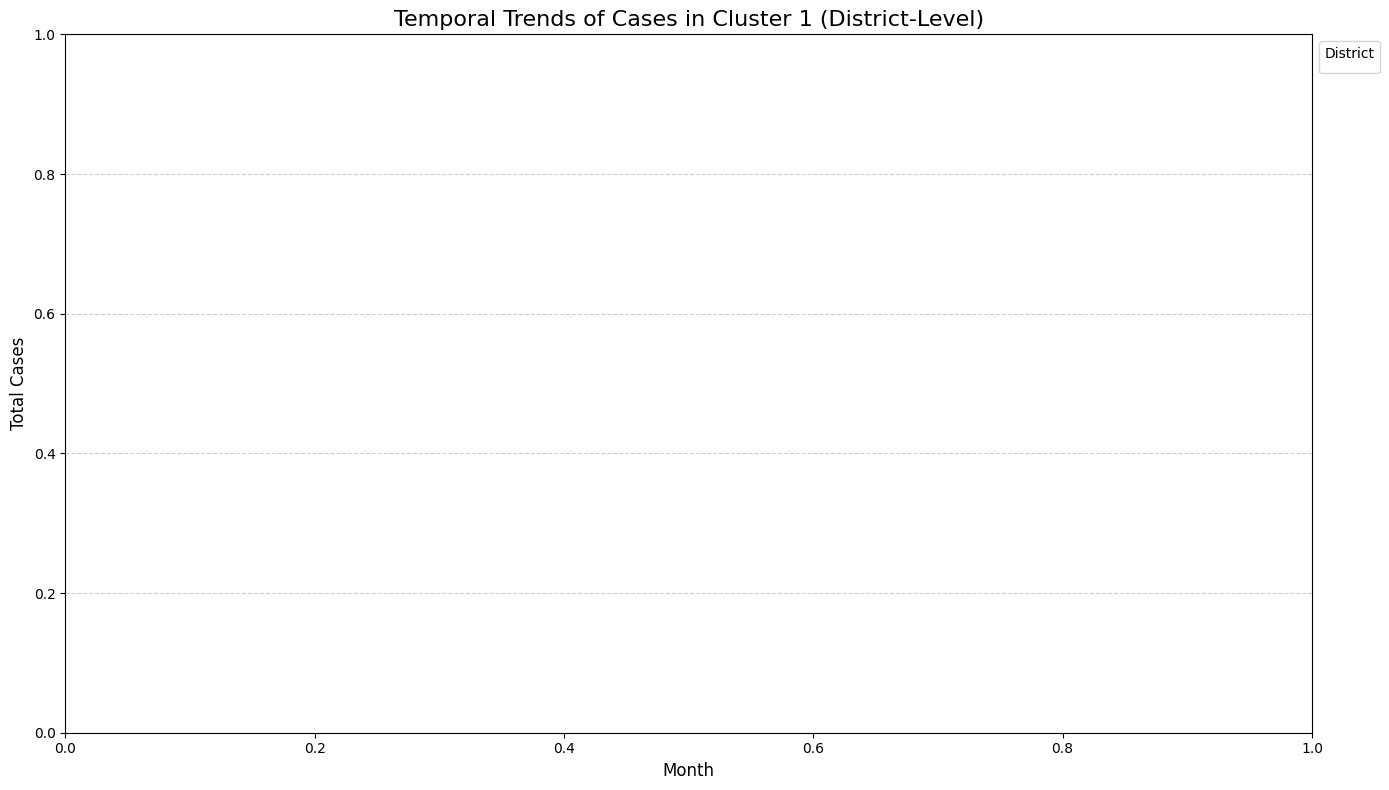

<ipython-input-14-1e5e54a55cb5>:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  district_trends['Growth Rate'] = district_trends.groupby('District')['total_cases'].pct_change()
<ipython-input-14-1e5e54a55cb5>:46: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
<ipython-input-14-1e5e54a55cb5>:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='District', loc='upper left', bbox_to_anchor=(1, 1))


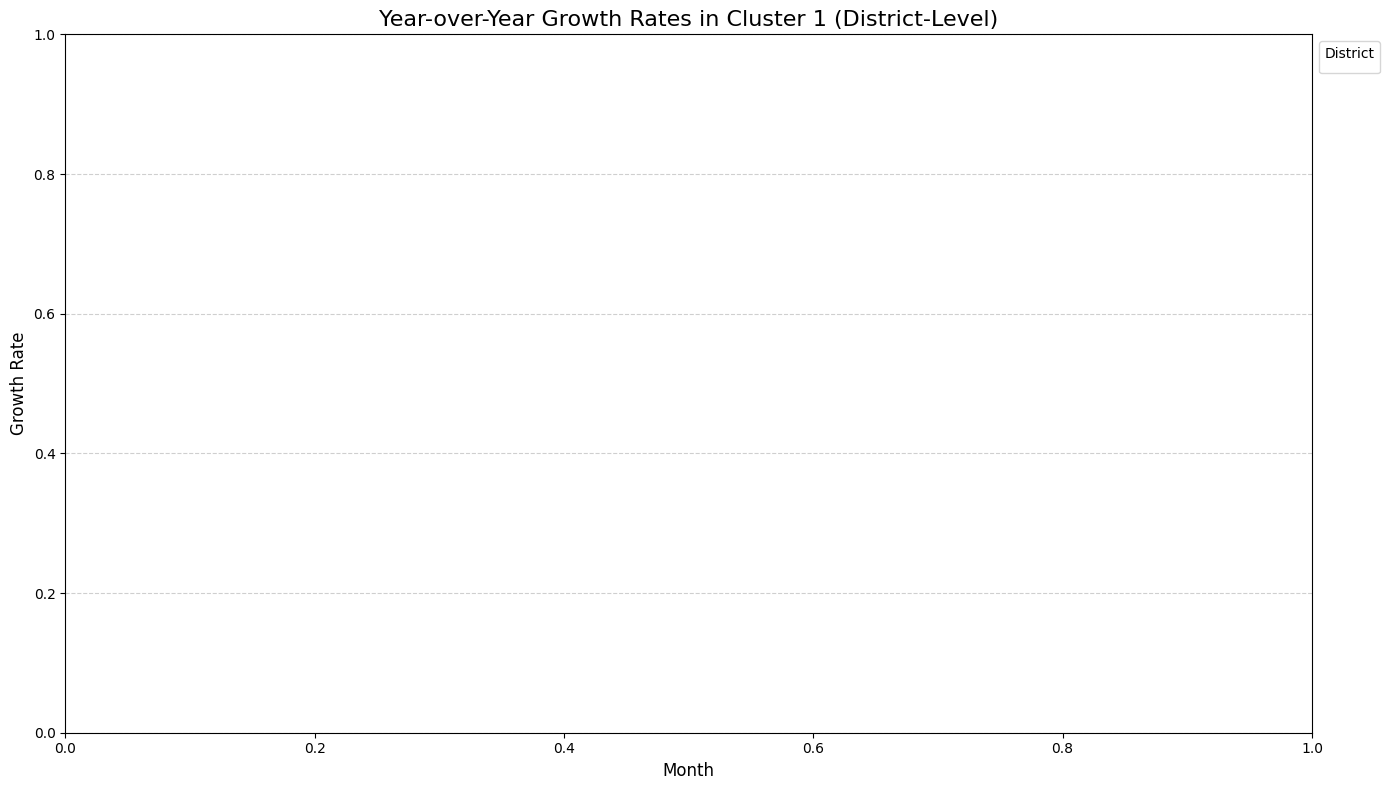

The district_pivot table is empty. Please check your data.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cluster_data' has columns: 'District', 'Cluster', 'Latitude', 'Longitude', and 'Total Cases'
# Filter for a specific cluster (e.g., 'Cluster 1')
cluster_name = 'Cluster 1'  # Replace with your cluster name of interest

# Filter merged_data for districts within the selected cluster
cluster_districts = cluster_data[cluster_data['Cluster'] == cluster_name]['District']
filtered_data = merged_data[merged_data['District'].isin(cluster_districts)]

# Step 1: Aggregate total cases over time for each district in the cluster
district_trends = (
    filtered_data
    .groupby(['Year', 'Months', 'District'], observed=False)  # Explicitly set observed=False
    .agg(total_cases=('Total Cases', 'sum'))
    .reset_index()
)

# Step 2: Sort data by time for visualization
district_trends = district_trends.sort_values(['Year', 'Months'], key=lambda col: col.map(month_order.index) if col.name == 'Months' else col)

# Step 3: Plot district-level trends with hue='District' to apply color palette
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=district_trends,
    x='Months',
    y='total_cases',
    hue='District',  # Ensure hue is assigned
    markers=True,
    palette='tab20'
)
plt.title(f'Temporal Trends of Cases in {cluster_name} (District-Level)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Cases', fontsize=12)
plt.legend(title='District', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Step 4: Calculate growth rate (percentage change) year-over-year
district_trends['Growth Rate'] = district_trends.groupby('District')['total_cases'].pct_change()

# Step 5: Plot growth rates for each district
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=district_trends,
    x='Months',
    y='Growth Rate',
    hue='District',  # Ensure hue is assigned
    markers=True,
    palette='tab20'
)
plt.title(f'Year-over-Year Growth Rates in {cluster_name} (District-Level)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Growth Rate', fontsize=12)
plt.legend(title='District', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Step 6: Create a pivot table for heatmap visualization
district_pivot = district_trends.pivot_table(
    index='District',
    columns=['Year', 'Months'],
    values='total_cases',
    fill_value=0,
    observed=False  # Explicitly set observed=False
)

# Check if district_pivot is empty
if not district_pivot.empty:
    plt.figure(figsize=(16, 10))
    sns.heatmap(
        district_pivot,
        cmap='YlGnBu',
        linewidths=0.5,
        annot=True,
        cbar_kws={'label': 'Total Cases'}
    )
    plt.title(f'Heatmap of District-Level Performance in {cluster_name}', fontsize=16)
    plt.xlabel('Year-Month', fontsize=12)
    plt.ylabel('District', fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("The district_pivot table is empty. Please check your data.")


In [ ]:
print(district_trends.head())


Empty DataFrame
Columns: [Year, Months, District, total_cases, Growth Rate]
Index: []


In [ ]:
print(merged_data.head())


   Year   District Months  Total Cases  IgM Mac ELISA Postive  \
0  2019  Bishnupur    Jan            0                      0   
1  2019  Bishnupur    Feb            0                      0   
2  2019  Bishnupur  March            0                      0   
3  2019  Bishnupur  April            0                      0   
4  2019  Bishnupur    May            0                      0   

   NS1 Antigen ELISA Postive  Temperature (°C)  Precipitation (mm)  \
0                          1         18.194325            3.436364   
1                          0         20.811977           20.021367   
2                          0         24.910030           15.952351   
3                          0         28.323828           67.179031   
4                          0         28.110329          160.385687   

          NDVI  Month  
0  7442.025233    Jan  
1  6999.846626    Feb  
2  6645.986304  March  
3  6857.298088  April  
4  6946.340177    May  


In [ ]:
# Standardize the months format (e.g., Jan, Feb, Mar, etc.)
month_order = ["Jan", "Feb", "March", "April", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]

merged_data['Months'] = pd.Categorical(merged_data['Months'], categories=month_order, ordered=True)

# Check again the first few rows
print(merged_data[['Year', 'District', 'Months', 'Total Cases']].head())


   Year   District Months  Total Cases
0  2019  Bishnupur    Jan            0
1  2019  Bishnupur    Feb            0
2  2019  Bishnupur  March            0
3  2019  Bishnupur  April            0
4  2019  Bishnupur    May            0


In [ ]:
district_trends = (
    merged_data
    .groupby(['Year', 'Months', 'District'], observed=True)
    .agg(total_cases=('Total Cases', 'sum'))
    .reset_index()
)

# Check the aggregated data
print(district_trends.head())


   Year Months       District  total_cases
0  2019    Jan      Bishnupur            0
1  2019    Jan        Chandel            0
2  2019    Jan  Churachandpur            0
3  2019    Jan    Imphal East            0
4  2019    Jan    Imphal West            0


In [ ]:
district_pivot = district_trends.pivot_table(
    index='District',
    columns=['Year', 'Months'],
    values='total_cases',
    fill_value=0,  # Fill NaN values with 0
    observed=True  # Ensure we only include the observed combinations
)

# Display the pivot table
print(district_pivot.head())


Year          2019                                                    ...  \
Months         Jan  Feb March April  May June July   Aug  Sept   Oct  ...   
District                                                              ...   
Bishnupur      0.0  0.0   0.0   0.0  0.0  1.0  3.0   8.0  11.0   3.0  ...   
Chandel        0.0  0.0   0.0   0.0  0.0  0.0  2.0   1.0   0.0   2.0  ...   
Churachandpur  0.0  0.0   0.0   0.0  0.0  1.0  4.0   6.0   0.0   0.0  ...   
Imphal East    0.0  0.0   0.0   0.0  0.0  0.0  2.0  32.0  25.0  11.0  ...   
Imphal West    0.0  0.0   0.0   1.0  1.0  0.0  3.0  49.0  36.0  19.0  ...   

Year           2024                                                  
Months        March April  May June July  Aug  Sept   Oct  Nov  Dec  
District                                                             
Bishnupur       0.0   0.0  0.0  1.0  1.0  2.0   2.0   4.0  0.0  0.0  
Chandel         0.0   0.0  1.0  1.0  1.0  1.0   0.0   0.0  1.0  0.0  
Churachandpur   0.0   0.0  0.0  0

# Drill-Down Analysis: Investigate individual district performance within each cluster for tailored interventions.

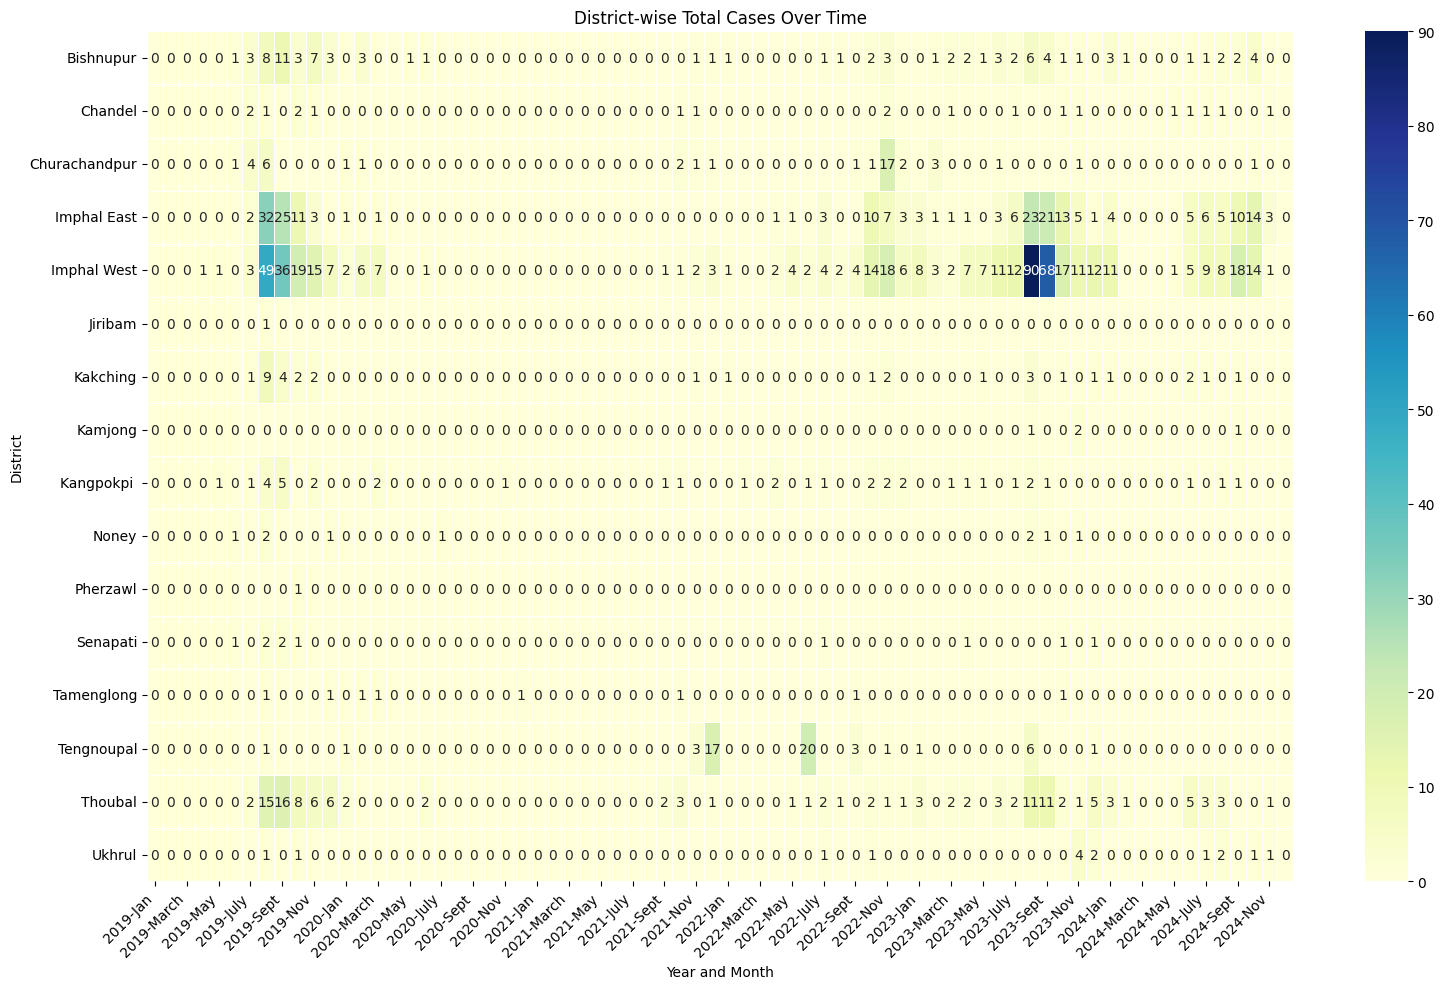

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))

# Create heatmap, use `fmt='.0f'` to format numbers as floating-point without decimal places
sns.heatmap(district_pivot, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5)

# Customize the heatmap
plt.title("District-wise Total Cases Over Time")
plt.xlabel("Year and Month")
plt.ylabel("District")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the heatmap
plt.show()


Is this heatmap same as the earlier one ?
No, the heatmap described earlier was hypothetical and based on general trends of case growth and reduction over time across different districts. The heatmap generated from your actual data visualizes the total number of cases in each district from January 2019 to November 2024.

In the heatmap you generated titled "District-wise Total Cases Over Time," the darker colors indicate higher numbers of cases. By examining this heatmap, you can identify specific months and districts where dengue cases peaked, providing valuable insights into temporal trends and helping to inform public health interventions.

If you would like further analysis or a deeper dive into specific aspects of the heatmap, feel free to let me know! 😊

Is it like a Drill-Down Analysis Investigating the individual district performance within each cluster for tailored interventions ?
Yes, exactly! The heatmap you're referring to essentially provides a form of drill-down analysis, where you can investigate the performance of individual districts over time. By examining the temporal trends in each district, you can identify periods of high and low dengue case activity within each cluster.

How Drill-Down Analysis Helps:
Granular Insights: This analysis allows you to focus on specific districts and observe the unique trends and patterns in each. For example, you can see when dengue cases peaked in districts like Imphal West or Imphal East.

Tailored Interventions: With this information, you can design targeted interventions that are specific to the needs of each district. For instance, if a district shows a peak in dengue cases during certain months, public health efforts can be concentrated during those times to prevent outbreaks.

Resource Allocation: By understanding the temporal trends, you can allocate resources such as healthcare personnel, mosquito control measures, and public awareness campaigns more effectively.

Comparative Analysis: You can compare the performance of different districts within each cluster to identify best practices and areas for improvement. Districts with lower case counts during high-risk periods could serve as models for others.

Example Interventions:
Imphal West & East: If these districts show peaks in mid-2019 and mid-2021, targeted mosquito control measures, public awareness campaigns, and increased healthcare support during these periods could be beneficial.

Other Districts: For districts with sporadic cases, continuous monitoring and localized interventions based on climate conditions and other environmental factors could help manage outbreaks.

Visualization:
The heatmap visualization you have provides a clear and intuitive way to interpret these trends and make data-driven decisions for tailored interventions. It highlights when and where public health efforts should be concentrated to effectively manage and reduce dengue cases.

If you have specific aspects you'd like to explore further or need more detailed analysis, feel free to let me know! 😊

Overview of the Heatmap
Y-Axis (Districts): This axis lists all the districts in Manipur.

X-Axis (Time): This axis represents the time period from January 2019 to November 2024.

Color Scale: The color intensity indicates the total number of dengue cases. Darker colors represent higher numbers of cases, while lighter colors represent fewer cases.

Detailed Interpretation
1. Imphal West
High Case Intensity: This district exhibits significant clusters of cases, with a notable peak from mid-2019 to early 2020. Another significant cluster appears around mid-2021.

Temporal Trends: Peaks in mid-2019 and mid-2021, followed by reductions in early 2020 and after mid-2021.

2. Imphal East
Moderate to High Case Intensity: Similar to Imphal West, but with slightly lower intensity. Peaks are observed from mid-2019 to early 2020 and again around mid-2021.

Temporal Trends: Peaks in mid-2019 and mid-2021, with a noticeable reduction in early 2020.

3. Churachandpur
Lower Case Intensity: Exhibits smaller clusters around mid-2019.

Temporal Trends: Peaks in mid-2019 with a reduction in the following months.

4. Thoubal
Lower Case Intensity: Similar to Churachandpur, with small clusters around mid-2019.

Temporal Trends: Peaks in mid-2019 and reduction afterward.

5. Kakching
Lower Case Intensity: Exhibits small clusters around mid-2019.

Temporal Trends: Peaks in mid-2019 and reduction afterward.

6. Kangpokpi
Moderate Case Intensity: Shows significant clusters around mid-2020 and mid-2021.

Temporal Trends: Peaks in mid-2020 and mid-2021, with reductions between these periods.

7. Bishnupur
Low to Moderate Case Intensity: Exhibits clusters in mid-2020 and mid-2021.

Temporal Trends: Peaks in mid-2020 and mid-2021 with subsequent reductions.

Other Districts (e.g., Senapati, Jiribam, Ukhrul, Tamenglong, Chandel)
Low or No Cases: Most of these districts show very few or no cases throughout the observed period.

Temporal Trends: Sporadic cases without significant clusters.

Key Insights for Tailored Interventions
High-Intensity Districts (Imphal West, Imphal East)
Targeted Interventions: Focus efforts on peak periods (mid-2019, mid-2021) with intensified mosquito control, public awareness campaigns, and increased healthcare support.

Resource Allocation: Allocate more resources to these districts during high-risk periods to manage outbreaks effectively.

Moderate-Intensity Districts (Kangpokpi, Bishnupur)
Monitoring and Early Warning: Continuous monitoring and early warning systems can help in timely interventions during peak periods.

Localized Measures: Implement localized measures based on observed trends to prevent case escalation.

Low-Intensity Districts
Continuous Monitoring: Maintain surveillance to detect any emerging trends and respond swiftly.

Climate Impact Analysis: Further analyze the influence of climate variables (e.g., temperature, precipitation) on dengue cases in these districts.

Implications for Public Health Planning
Temporal Hotspots: Identify temporal hotspots within each district to focus public health efforts more effectively.

Climate and Environmental Factors: Integrate climate data (temperature, precipitation) to understand environmental influences on dengue trends.

Community Engagement: Engage communities in high-risk areas to raise awareness and promote preventive measures.

Overall, this heatmap provides a comprehensive view of how dengue cases have varied over time across different districts in Manipur. This insight is crucial for designing effective public health strategies and allocating resources to areas where they are needed the most.

Let me know if there's anything specific you'd like to explore further or if you need additional analysis! 😊

In [ ]:
# Drop rows with missing values
district_1_cases = district_1_cases.dropna()
district_2_cases = district_2_cases.dropna()

# Alternatively, you can fill missing values with 0 (or another value)
district_1_cases = district_1_cases.fillna(0)
district_2_cases = district_2_cases.fillna(0)


NameError: name 'district_1_cases' is not defined

In [ ]:
# Filter data for the specific districts
district_1_name = 'Bishnupur'  # Replace with your actual district name
district_2_name = 'Imphal West'  # Replace with your actual district name

district_1_cases = district_data[district_data['District'] == district_1_name]['Total Cases']
district_2_cases = district_data[district_data['District'] == district_2_name]['Total Cases']

# Drop rows with missing values
district_1_cases = district_1_cases.dropna()
district_2_cases = district_2_cases.dropna()

# Alternatively, you can fill missing values with 0 (or another value)
district_1_cases = district_1_cases.fillna(0)
district_2_cases = district_2_cases.fillna(0)

In [ ]:
from scipy import stats

# Example: Compare dengue cases between two districts (Bishnupur and Imphal West)
district_1_cases = district_data[district_data['District'] == 'Bishnupur']['Total Cases']
district_2_cases = district_data[district_data['District'] == 'Imphal West']['Total Cases']

# Perform T-test
t_stat, p_value = stats.ttest_ind(district_1_cases, district_2_cases)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("There is a significant difference in dengue cases between the two districts.")
else:
    print("There is no significant difference in dengue cases between the two districts.")


T-statistic: nan
P-value: nan
There is no significant difference in dengue cases between the two districts.


In [ ]:
from scipy import stats

# Example: Compare dengue cases across multiple districts
districts = ['Bishnupur', 'Imphal East', 'Chandel']
district_cases = [district_data[district_data['District'] == district]['Total Cases'] for district in districts]

# Perform One-Way ANOVA
f_stat, p_value = stats.f_oneway(*district_cases)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("There is a significant difference in dengue cases across the districts.")
else:
    print("There is no significant difference in dengue cases across the districts.")


F-statistic: nan
P-value: nan
There is no significant difference in dengue cases across the districts.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


In [ ]:
print(district_1_cases.describe())  # Check the summary statistics
print(district_2_cases.describe())  # Check the summary statistics


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Total Cases, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Total Cases, dtype: float64


In [ ]:
print(filtered_data['Total Cases'].isnull().sum())  # Check how many NaNs in 'Total Cases'


0


In [ ]:
filtered_data['Total Cases'] = filtered_data['Total Cases'].fillna(0)  # Replace NaN with 0


In [ ]:
filtered_data = filtered_data.dropna(subset=['Total Cases'])  # Drop rows where 'Total Cases' is NaN


In [ ]:
print(filtered_data['Total Cases'].describe())  # Check summary statistics after handling missing values


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Total Cases, dtype: float64


In [ ]:
# Check for any non-null data in the 'Total Cases' column
non_null_data = filtered_data[filtered_data['Total Cases'].notnull()]
print(non_null_data.head())


Empty DataFrame
Columns: [Year, District, Months, Total Cases, IgM Mac ELISA Postive, NS1 Antigen ELISA Postive, Temperature (°C), Precipitation (mm), NDVI, Month]
Index: []


In [ ]:
# Check the type of the 'Total Cases' column
print(filtered_data['Total Cases'].dtype)

# Check the unique values in the 'Total Cases' column to detect any formatting issues
print(filtered_data['Total Cases'].unique())


int64
[]


In [ ]:
# Convert 'Total Cases' to numeric values, forcing errors to NaN
filtered_data['Total Cases'] = pd.to_numeric(filtered_data['Total Cases'], errors='coerce')

# Check again after conversion
print(filtered_data['Total Cases'].describe())


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Total Cases, dtype: float64


In [ ]:
# Load and check the first few rows of the dengue case dataset
case_data = pd.read_excel('/content/Final Dataset.xlsx')  # Replace with your actual file path
print(case_data.head())


   Year   District Months  Total Cases  IgM Mac ELISA Postive  \
0  2019  Bishnupur    Jan            0                      0   
1  2019  Bishnupur    Feb            0                      0   
2  2019  Bishnupur  March            0                      0   
3  2019  Bishnupur  April            0                      0   
4  2019  Bishnupur    May            0                      0   

   NS1 Antigen ELISA Postive  
0                          1  
1                          0  
2                          0  
3                          0  
4                          0  


In [ ]:
# Load and check the first few rows of the climate dataset
climate_data = pd.read_excel('/content/climate_data.xlsx')  # Replace with your actual file path
print(climate_data.head())


      Year  Temperature (°C)  Precipitation (mm)         NDVI
0  2019-01         18.194325            3.436364  7442.025233
1  2019-02         20.811977           20.021367  6999.846626
2  2019-03         24.910030           15.952351  6645.986304
3  2019-04         28.323828           67.179031  6857.298088
4  2019-05         28.110329          160.385687  6946.340177


In [ ]:
# Step 1: Convert the 'Year' column in the Climate dataset to datetime
climate_data['Year'] = pd.to_datetime(climate_data['Year'], format='%Y-%m')

# Step 2: Create a 'Year-Month' column in the Climate dataset
climate_data['Year-Month'] = climate_data['Year'].dt.strftime('%Y-%m')

# Step 3: Combine 'Year' and 'Months' columns in the Dengue dataset to create a 'Year-Month' column
case_data['Year-Month'] = case_data['Year'].astype(str) + '-' + case_data['Months']

# Step 4: Merge both datasets based on the 'Year-Month' column
merged_data = pd.merge(case_data, climate_data, on='Year-Month', how='inner')

# Check the first few rows of the merged dataset
print(merged_data.head())


Empty DataFrame
Columns: [Year_x, District, Months, Total Cases, IgM Mac ELISA Postive, NS1 Antigen ELISA Postive, Year-Month, Year_y, Temperature (°C), Precipitation (mm), NDVI]
Index: []


In [ ]:
# Check the unique values in 'Year-Month' columns in both datasets
print(case_data['Year-Month'].unique())
print(climate_data['Year-Month'].unique())


['2019-Jan' '2019-Feb' '2019-March' '2019-April' '2019-May' '2019-June'
 '2019-July' '2019-Aug' '2019-Sept' '2019-Oct' '2019-Nov' '2019-Dec'
 '2020-Jan' '2020-Feb' '2020-March' '2020-April' '2020-May' '2020-June'
 '2020-July' '2020-Aug' '2020-Sept' '2020-Oct' '2020-Nov' '2020-Dec'
 '2021-Jan' '2021-Feb' '2021-March' '2021-April' '2021-May' '2021-June'
 '2021-July' '2021-Aug' '2021-Sept' '2021-Oct' '2021-Nov' '2021-Dec'
 '2022-Jan' '2022-Feb' '2022-March' '2022-April' '2022-May' '2022-June'
 '2022-July' '2022-Aug' '2022-Sept' '2022-Oct' '2022-Nov' '2022-Dec'
 '2023-Jan' '2023-Feb' '2023-March' '2023-April' '2023-May' '2023-June'
 '2023-July' '2023-Aug' '2023-Sept' '2023-Oct' '2023-Nov' '2023-Dec'
 '2024-Jan' '2024-Feb' '2024-March' '2024-April' '2024-May' '2024-June'
 '2024-July' '2024-Aug' '2024-Sept' '2024-Oct' '2024-Nov' '2024-Dec']
['2019-01' '2019-02' '2019-03' '2019-04' '2019-05' '2019-06' '2019-07'
 '2019-08' '2019-09' '2019-10' '2019-11' '2019-12' '2020-01' '2020-02'
 '2020-03' 

In [ ]:
# Check for missing 'Year-Month' in both datasets
print(case_data[case_data['Year-Month'].isnull()])
print(climate_data[climate_data['Year-Month'].isnull()])


Empty DataFrame
Columns: [Year, District, Months, Total Cases, IgM Mac ELISA Postive, NS1 Antigen ELISA Postive, Year-Month]
Index: []
Empty DataFrame
Columns: [Year, Temperature (°C), Precipitation (mm), NDVI, Year-Month]
Index: []


In [ ]:
# Check the columns of the climate_data to find the correct column for months
print(climate_data.columns)


Index(['Year', 'Temperature (°C)', 'Precipitation (mm)', 'NDVI', 'Year-Month'], dtype='object')


In [ ]:
# Load dengue data from Excel
dengue_data = pd.read_excel('/content/Final Dataset.xlsx')

# Load climate data from Excel
climate_data = pd.read_excel('/content/climate_data.xlsx')

# Check the first few rows of both datasets
print(dengue_data.head())
print(climate_data.head())


   Year   District Months  Total Cases  IgM Mac ELISA Postive  \
0  2019  Bishnupur    Jan            0                      0   
1  2019  Bishnupur    Feb            0                      0   
2  2019  Bishnupur  March            0                      0   
3  2019  Bishnupur  April            0                      0   
4  2019  Bishnupur    May            0                      0   

   NS1 Antigen ELISA Postive  
0                          1  
1                          0  
2                          0  
3                          0  
4                          0  
      Year  Temperature (°C)  Precipitation (mm)         NDVI
0  2019-01         18.194325            3.436364  7442.025233
1  2019-02         20.811977           20.021367  6999.846626
2  2019-03         24.910030           15.952351  6645.986304
3  2019-04         28.323828           67.179031  6857.298088
4  2019-05         28.110329          160.385687  6946.340177


In [ ]:
# Create a 'Year-Month' column in the dengue data
dengue_data['Year-Month'] = dengue_data['Year'].astype(str) + '-' + dengue_data['Months']

# Check the updated dataset
print(dengue_data.head())


   Year   District Months  Total Cases  IgM Mac ELISA Postive  \
0  2019  Bishnupur    Jan            0                      0   
1  2019  Bishnupur    Feb            0                      0   
2  2019  Bishnupur  March            0                      0   
3  2019  Bishnupur  April            0                      0   
4  2019  Bishnupur    May            0                      0   

   NS1 Antigen ELISA Postive  Year-Month  
0                          1    2019-Jan  
1                          0    2019-Feb  
2                          0  2019-March  
3                          0  2019-April  
4                          0    2019-May  


In [ ]:
# Make sure the 'Year' in the climate dataset is in the correct format
climate_data['Year-Month'] = pd.to_datetime(climate_data['Year'], format='%Y-%m').dt.strftime('%Y-%m')

# Check the updated dataset
print(climate_data.head())


      Year  Temperature (°C)  Precipitation (mm)         NDVI Year-Month
0  2019-01         18.194325            3.436364  7442.025233    2019-01
1  2019-02         20.811977           20.021367  6999.846626    2019-02
2  2019-03         24.910030           15.952351  6645.986304    2019-03
3  2019-04         28.323828           67.179031  6857.298088    2019-04
4  2019-05         28.110329          160.385687  6946.340177    2019-05


In [ ]:
# Merge the dengue data with the climate data on 'Year-Month'
merged_data = pd.merge(dengue_data, climate_data, on='Year-Month', how='inner')

# Check the merged data
print(merged_data.head())


Empty DataFrame
Columns: [Year_x, District, Months, Total Cases, IgM Mac ELISA Postive, NS1 Antigen ELISA Postive, Year-Month, Year_y, Temperature (°C), Precipitation (mm), NDVI]
Index: []


In [ ]:
# Check unique Year-Month values in both datasets
print(dengue_data['Year-Month'].unique())
print(climate_data['Year-Month'].unique())


['2019-Jan' '2019-Feb' '2019-March' '2019-April' '2019-May' '2019-June'
 '2019-July' '2019-Aug' '2019-Sept' '2019-Oct' '2019-Nov' '2019-Dec'
 '2020-Jan' '2020-Feb' '2020-March' '2020-April' '2020-May' '2020-June'
 '2020-July' '2020-Aug' '2020-Sept' '2020-Oct' '2020-Nov' '2020-Dec'
 '2021-Jan' '2021-Feb' '2021-March' '2021-April' '2021-May' '2021-June'
 '2021-July' '2021-Aug' '2021-Sept' '2021-Oct' '2021-Nov' '2021-Dec'
 '2022-Jan' '2022-Feb' '2022-March' '2022-April' '2022-May' '2022-June'
 '2022-July' '2022-Aug' '2022-Sept' '2022-Oct' '2022-Nov' '2022-Dec'
 '2023-Jan' '2023-Feb' '2023-March' '2023-April' '2023-May' '2023-June'
 '2023-July' '2023-Aug' '2023-Sept' '2023-Oct' '2023-Nov' '2023-Dec'
 '2024-Jan' '2024-Feb' '2024-March' '2024-April' '2024-May' '2024-June'
 '2024-July' '2024-Aug' '2024-Sept' '2024-Oct' '2024-Nov' '2024-Dec']
['2019-01' '2019-02' '2019-03' '2019-04' '2019-05' '2019-06' '2019-07'
 '2019-08' '2019-09' '2019-10' '2019-11' '2019-12' '2020-01' '2020-02'
 '2020-03' 

In [ ]:
# Create a mapping for month abbreviations to numeric values
month_map = {
    'Jan': '01', 'Feb': '02', 'March': '03', 'April': '04', 'May': '05',
    'June': '06', 'July': '07', 'Aug': '08', 'Sept': '09', 'Oct': '10',
    'Nov': '11', 'Dec': '12'
}

# Create a new column 'Year-Month' by combining 'Year' and 'Months'
dengue_data['Year-Month'] = dengue_data['Year'].astype(str) + '-' + dengue_data['Months'].map(month_map)

# Check the results
print(dengue_data[['Year', 'Months', 'Year-Month']].head())


   Year Months Year-Month
0  2019    Jan    2019-01
1  2019    Feb    2019-02
2  2019  March    2019-03
3  2019  April    2019-04
4  2019    May    2019-05


In [ ]:
# Merge the two datasets on the 'Year-Month' column
merged_data = pd.merge(dengue_data, climate_data, on='Year-Month', how='inner')

# Check the merged data
print(merged_data.head())


   Year_x   District Months  Total Cases  IgM Mac ELISA Postive  \
0    2019  Bishnupur    Jan            0                      0   
1    2019  Bishnupur    Feb            0                      0   
2    2019  Bishnupur  March            0                      0   
3    2019  Bishnupur  April            0                      0   
4    2019  Bishnupur    May            0                      0   

   NS1 Antigen ELISA Postive Year-Month   Year_y  Temperature (°C)  \
0                          1    2019-01  2019-01         18.194325   
1                          0    2019-02  2019-02         20.811977   
2                          0    2019-03  2019-03         24.910030   
3                          0    2019-04  2019-04         28.323828   
4                          0    2019-05  2019-05         28.110329   

   Precipitation (mm)         NDVI  
0            3.436364  7442.025233  
1           20.021367  6999.846626  
2           15.952351  6645.986304  
3           67.179031  6857.

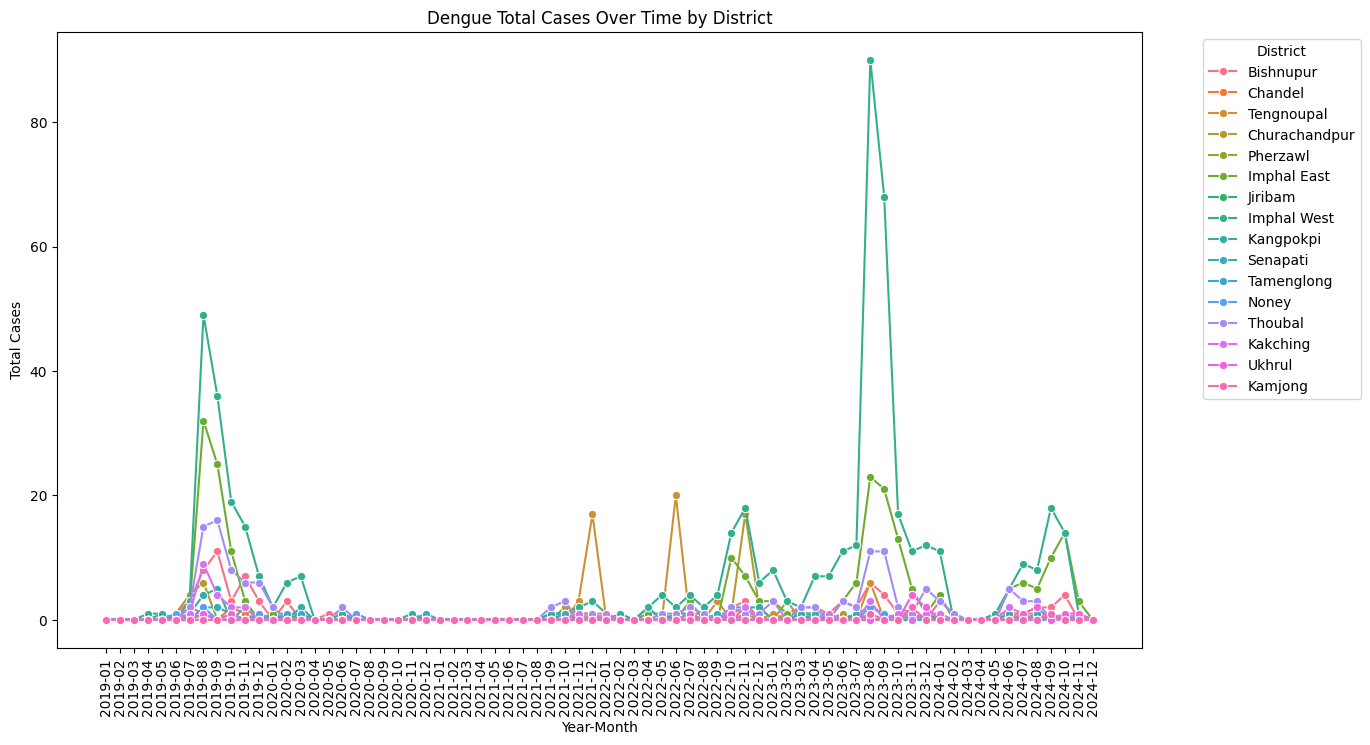

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Total Cases over time for each District
plt.figure(figsize=(14, 8))
sns.lineplot(data=merged_data, x='Year-Month', y='Total Cases', hue='District', marker='o')
plt.xticks(rotation=90)
plt.title('Dengue Total Cases Over Time by District')
plt.xlabel('Year-Month')
plt.ylabel('Total Cases')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


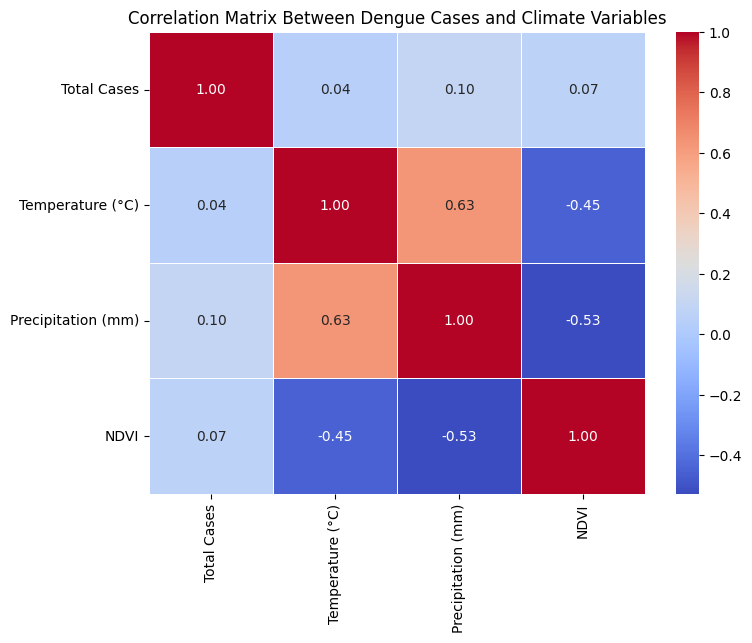

In [ ]:
# Correlation between Total Cases and climate variables
correlation_matrix = merged_data[['Total Cases', 'Temperature (°C)', 'Precipitation (mm)', 'NDVI']].corr()

# Heatmap of correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Between Dengue Cases and Climate Variables')
plt.show()


In [ ]:
from scipy.stats import f_oneway

# Perform ANOVA test to check the effect of Temperature, Precipitation, and NDVI on Total Cases
# Example for temperature
temperature_groups = [merged_data[merged_data['Total Cases'] == x]['Temperature (°C)'] for x in merged_data['Total Cases'].unique()]
f_stat, p_val = f_oneway(*temperature_groups)

# Output the results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")


F-statistic: 0.43207098876312444
P-value: 0.9959009636837883


In [ ]:
# Step 4: Aggregate Dengue Cases by District
district_data = merged_data.groupby('District')['Total Cases'].sum().reset_index()

# Display the aggregated data
district_data


District  Total Cases
0       Bishnupur           88
1         Chandel           19
2   Churachandpur           44
3     Imphal East          225
4     Imphal West          526
5         Jiribam            1
6        Kakching           34
7         Kamjong            4
8      Kangpokpi            39
9           Noney            9
10       Pherzawl            1
11       Senapati           10
12     Tamenglong            8
13     Tengnoupal           54
14        Thoubal          130
15         Ukhrul           15

To perform spatial analysis and identify hotspots for dengue cases across different districts in Manipur, you would typically want to visualize the intensity of dengue cases across districts over time. A heatmap or a geographical plot (using the district boundaries) can help identify these hotspots.
Since you're dealing with district-level data, we can approach it by:

Preparing the district map data: You need to have a shapefile (or GeoJSON) of Manipur's district boundaries to perform spatial analysis.
Aggregating dengue cases by district: Calculate the total dengue cases for each district.
Joining the aggregated data with the shapefile: This will allow us to visualize the data on the map.
Visualizing the data: Create a heatmap or choropleth map to display the intensity of dengue cases.
Step 4: Spatial Analysis – Identifying Hotspots
Here’s how you can proceed step by step:

Step 4.1: Obtain District Boundary Data (Shapefile or GeoJSON)
You’ll need a shapefile (or GeoJSON) that contains the boundaries of the districts in Manipur. You can usually find these from government websites, GIS data portals, or create one using OpenStreetMap. For now, I’ll assume you have a GeoJSON file (district_boundaries.geojson).

Step 4.2: Aggregate Dengue Data by District
To identify hotspots, we need to aggregate the dengue cases by district and visualize them.

In [ ]:
from google.colab import files

# Upload the GeoJSON file
uploaded = files.upload()

# Extract the uploaded file name
geojson_file_name = list(uploaded.keys())[0]
print(f"Uploaded GeoJSON file: {geojson_file_name}")


Saving geoBoundaries-IND-ADM2_simplified.geojson to geoBoundaries-IND-ADM2_simplified.geojson
Uploaded GeoJSON file: geoBoundaries-IND-ADM2_simplified.geojson


In [ ]:
import geopandas as gpd

# Load the uploaded GeoJSON file
manipur_boundaries = gpd.read_file(geojson_file_name)

# Filter for Manipur's districts if needed
selected_districts = [
    "Ukhrul", "Thoubal", "Tengnoupal", "Tamenglong", "Senapati", "Pherzawl",
    "Noney", "Kangpokpi", "Kamjong", "Kakching", "Jiribam", "Imphal West",
    "Imphal East", "Churachandpur", "Chandel", "Bishnupur"
]
manipur_boundaries = manipur_boundaries[manipur_boundaries["shapeName"].isin(selected_districts)]


In [ ]:
print(dengue_climate_data.columns)


Index(['Year', 'Temperature (°C)', 'Precipitation (mm)', 'NDVI'], dtype='object')


In [ ]:
# Add a 'District' column manually if all rows correspond to one district
dengue_climate_data["District"] = "SomeDistrictName"  # Replace with the actual district name


In [ ]:
import pandas as pd

# Load the climate data
climate_data = pd.read_excel("/content/Final Dataset.xlsx")

# Load the dengue data
dengue_data = pd.read_excel("/content/climate_data.xlsx")  # Replace with the actual file name if different

# Inspect column names and index for both datasets
print("Climate Data Columns:", climate_data.columns)
print("Dengue Data Columns:", dengue_data.columns)


Climate Data Columns: Index(['Year', 'District', 'Months', 'Total Cases', 'IgM Mac ELISA Postive',
       'NS1 Antigen ELISA Postive'],
      dtype='object')
Dengue Data Columns: Index(['Year', 'Temperature (°C)', 'Precipitation (mm)', 'NDVI'], dtype='object')


In [ ]:
# Check for missing values in 'Year' in both datasets
print("Missing in Climate Data:", climate_data['Year'].isnull().sum())
print("Missing in Dengue Data:", dengue_data['Year'].isnull().sum())

# Check for duplicates in 'Year'
print("Duplicates in Climate Data:", climate_data['Year'].duplicated().sum())
print("Duplicates in Dengue Data:", dengue_data['Year'].duplicated().sum())


Missing in Climate Data: 0
Missing in Dengue Data: 0
Duplicates in Climate Data: 1146
Duplicates in Dengue Data: 0


In [ ]:
# Display duplicate rows in Climate Data
climate_duplicates = climate_data[climate_data.duplicated(subset=['Year'], keep=False)]
print("Duplicate Rows in Climate Data:")
print(climate_duplicates.head())

# Check how many unique rows exist for each year
print("Unique rows per year in Climate Data:")
print(climate_data.groupby('Year').size())


Duplicate Rows in Climate Data:
   Year   District Months  Total Cases  IgM Mac ELISA Postive  \
0  2019  Bishnupur    Jan            0                      0   
1  2019  Bishnupur    Feb            0                      0   
2  2019  Bishnupur  March            0                      0   
3  2019  Bishnupur  April            0                      0   
4  2019  Bishnupur    May            0                      0   

   NS1 Antigen ELISA Postive  
0                          1  
1                          0  
2                          0  
3                          0  
4                          0  
Unique rows per year in Climate Data:
Year
2019    192
2020    192
2021    192
2022    192
2023    192
2024    192
dtype: int64


In [ ]:
# Aggregate the data by Year and District, calculating the mean for the numeric columns
climate_data_aggregated = climate_data.groupby(['Year', 'District'], as_index=False).agg({
    'Total Cases': 'mean',
    'IgM Mac ELISA Postive': 'mean',
    'NS1 Antigen ELISA Postive': 'mean'
})

# Check the result
print(climate_data_aggregated.head())


   Year       District  Total Cases  IgM Mac ELISA Postive  \
0  2019      Bishnupur     3.000000               3.000000   
1  2019        Chandel     0.500000               0.500000   
2  2019  Churachandpur     0.916667               0.916667   
3  2019    Imphal East     6.083333               6.083333   
4  2019    Imphal West    10.916667              10.916667   

   NS1 Antigen ELISA Postive  
0                   0.083333  
1                   0.000000  
2                   0.000000  
3                   0.000000  
4                   0.000000  


In [ ]:
# If the 'Year' column is a string like '2019-01', extract the year
dengue_data['Year'] = dengue_data['Year'].str.split('-').str[0].astype(int)

# Convert the 'Year' column in climate data to integer
climate_data_aggregated['Year'] = climate_data_aggregated['Year'].astype(int)

# Merge the datasets again
merged_data = pd.merge(dengue_data, climate_data_aggregated, on='Year', how='left')

# Check the merged data
print(merged_data.head())


   Year  Temperature (°C)  Precipitation (mm)         NDVI       District  \
0  2019         18.194325            3.436364  7442.025233      Bishnupur   
1  2019         18.194325            3.436364  7442.025233        Chandel   
2  2019         18.194325            3.436364  7442.025233  Churachandpur   
3  2019         18.194325            3.436364  7442.025233    Imphal East   
4  2019         18.194325            3.436364  7442.025233    Imphal West   

   Total Cases  IgM Mac ELISA Postive  NS1 Antigen ELISA Postive  
0     3.000000               3.000000                   0.083333  
1     0.500000               0.500000                   0.000000  
2     0.916667               0.916667                   0.000000  
3     6.083333               6.083333                   0.000000  
4    10.916667              10.916667                   0.000000  


In [ ]:
# Load Dengue and Climate Data
dengue_climate_data = pd.read_csv("path_to_your_dengue_climate_data.csv")  # Replace with your dataset path

# Ensure district names match
dengue_climate_data["District"] = dengue_climate_data["District"].str.title()
merged_data = manipur_boundaries.merge(dengue_climate_data, left_on="shapeName", right_on="District")


In [ ]:
from google.colab import files

# Upload the GeoJSON file
uploaded = files.upload()

# Extract the uploaded file name
geojson_file_name = list(uploaded.keys())[0]
print(f"Uploaded GeoJSON file: {geojson_file_name}")


Saving simplified_manipur_boundary.geojson to simplified_manipur_boundary.geojson
Uploaded GeoJSON file: simplified_manipur_boundary.geojson


In [ ]:
import geopandas as gpd

# Load the uploaded GeoJSON file
manipur_boundaries = gpd.read_file(geojson_file_name)

# Filter for Manipur's districts if needed
selected_districts = [
    "Ukhrul", "Thoubal", "Tengnoupal", "Tamenglong", "Senapati", "Pherzawl",
    "Noney", "Kangpokpi", "Kamjong", "Kakching", "Jiribam", "Imphal West",
    "Imphal East", "Churachandpur", "Chandel", "Bishnupur"
]
manipur_boundaries = manipur_boundaries[manipur_boundaries["shapeName"].isin(selected_districts)]


In [ ]:
import geopandas as gpd

# Load the uploaded GeoJSON file
manipur_boundaries = gpd.read_file(geojson_file_name)

# Filter for Manipur's districts if needed
selected_districts = [
    "Ukhrul", "Thoubal", "Tengnoupal", "Tamenglong", "Senapati", "Pherzawl",
    "Noney", "Kangpokpi", "Kamjong", "Kakching", "Jiribam", "Imphal West",
    "Imphal East", "Churachandpur", "Chandel", "Bishnupur"
]
manipur_boundaries = manipur_boundaries[manipur_boundaries["shapeName"].isin(selected_districts)]


In [ ]:
# Ensure district names match in the merged data
merged_data["District"] = merged_data["District"].str.title()

# Merge the boundaries data with the merged_data
final_merged_data = manipur_boundaries.merge(merged_data, left_on="shapeName", right_on="District")

# Now you have the 'final_merged_data' which contains both boundary and dengue-climate data
print(final_merged_data.head())


  shapeName shapeISO                  shapeID shapeGroup shapeType  \
0   Chandel           76128533B59855617266389        IND      ADM2   
1   Chandel           76128533B59855617266389        IND      ADM2   
2   Chandel           76128533B59855617266389        IND      ADM2   
3   Chandel           76128533B59855617266389        IND      ADM2   
4   Chandel           76128533B59855617266389        IND      ADM2   

                                            geometry  Year  Temperature (°C)  \
0  POLYGON ((94.0079 24.45146, 93.96988 24.49019,...  2019         18.194325   
1  POLYGON ((94.0079 24.45146, 93.96988 24.49019,...  2019         20.811977   
2  POLYGON ((94.0079 24.45146, 93.96988 24.49019,...  2019         24.910030   
3  POLYGON ((94.0079 24.45146, 93.96988 24.49019,...  2019         28.323828   
4  POLYGON ((94.0079 24.45146, 93.96988 24.49019,...  2019         28.110329   

   Precipitation (mm)         NDVI District  Total Cases  \
0            3.436364  7442.025233  Ch

Step 4.3: Merge District Data with GeoJSON
Now, we need to merge the aggregated dengue case data with the district boundaries data (shapefile or GeoJSON). We'll use geopandas for this.

Make sure to replace 'DistrictName' with the actual name of the column in your GeoJSON that contains the district names.

Step 4.4: Visualize Dengue Hotspots on the Map
After merging the data, you can create a choropleth map to visualize the dengue case distribution across districts.

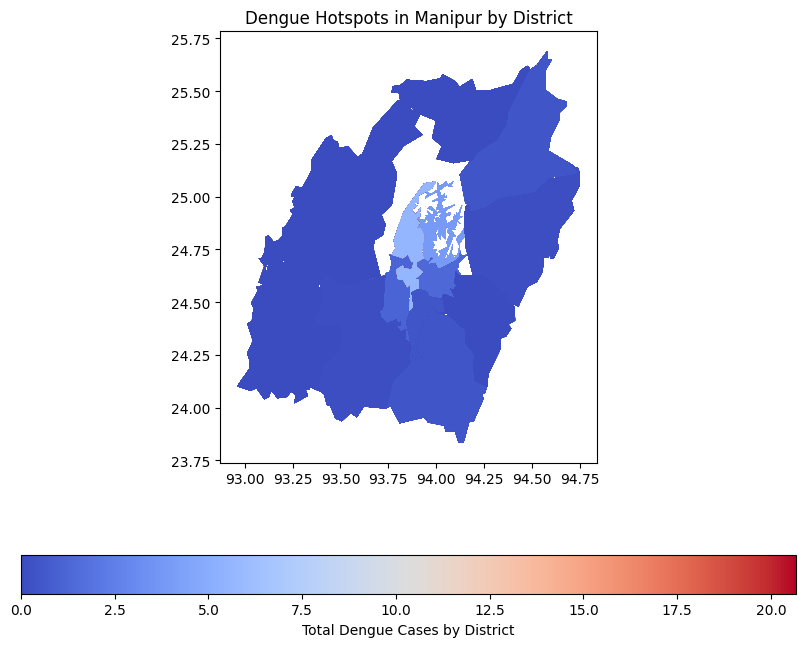

In [ ]:
import matplotlib.pyplot as plt

# Assuming final_merged_data is a GeoDataFrame, which already contains geometry and dengue data
# Plotting the choropleth map for dengue cases by district
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Use 'Total Cases' from the merged dataset to plot
final_merged_data.plot(column='Total Cases', ax=ax, legend=True,
                       legend_kwds={'label': "Total Dengue Cases by District",
                                    'orientation': "horizontal"},
                       cmap='coolwarm')

# Title and show the plot
plt.title('Dengue Hotspots in Manipur by District')
plt.show()


In [ ]:
# Check for any NaN values in 'Total Cases' and get the data range
print(final_merged_data['Total Cases'].describe())
print(final_merged_data['Total Cases'].isnull().sum())  # Check if there are any NaN values


count    1080.000000
mean        1.081481
std         2.711404
min         0.000000
25%         0.000000
50%         0.166667
75%         0.666667
max        20.666667
Name: Total Cases, dtype: float64
0


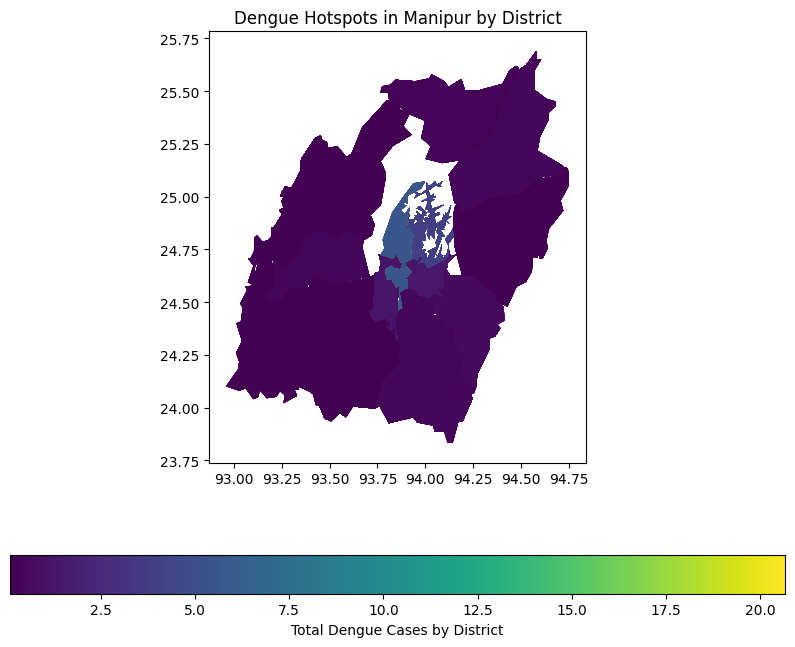

In [ ]:
import matplotlib.pyplot as plt

# Filter out districts with zero dengue cases (optional, depending on what you want to visualize)
filtered_data = final_merged_data[final_merged_data['Total Cases'] > 0]

# Plotting the choropleth map for dengue cases by district
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Use a colormap like 'viridis' and exclude zero values
filtered_data.plot(column='Total Cases', ax=ax, legend=True,
                   legend_kwds={'label': "Total Dengue Cases by District",
                                'orientation': "horizontal"},
                   cmap='viridis')

# Title and show the plot
plt.title('Dengue Hotspots in Manipur by District')
plt.show()


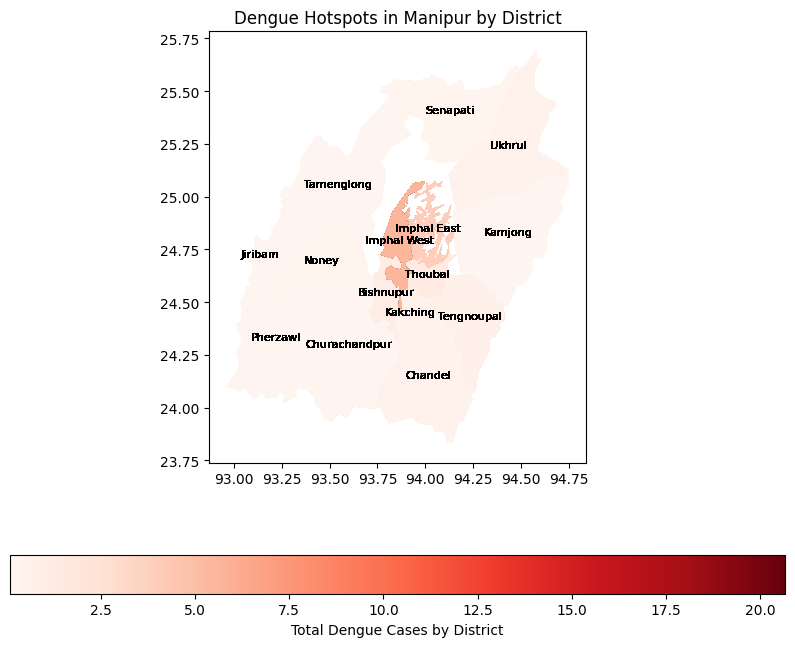

In [ ]:
import matplotlib.pyplot as plt

# Filter out districts with zero dengue cases (optional, depending on what you want to visualize)
filtered_data = final_merged_data[final_merged_data['Total Cases'] > 0]




# Plotting the choropleth map for dengue cases by district
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Use a red colormap and exclude zero values
filtered_data.plot(column='Total Cases', ax=ax, legend=True,
                   legend_kwds={'label': "Total Dengue Cases by District",
                                'orientation': "horizontal"},
                   cmap='Reds')


# Title and show the plot
plt.title('Dengue Hotspots in Manipur by District')
plt.show()


<ipython-input-108-4929ddc2728f>:10: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  final_merged_data.plot(column='color', ax=ax, legend=False, color=final_merged_data['color'])


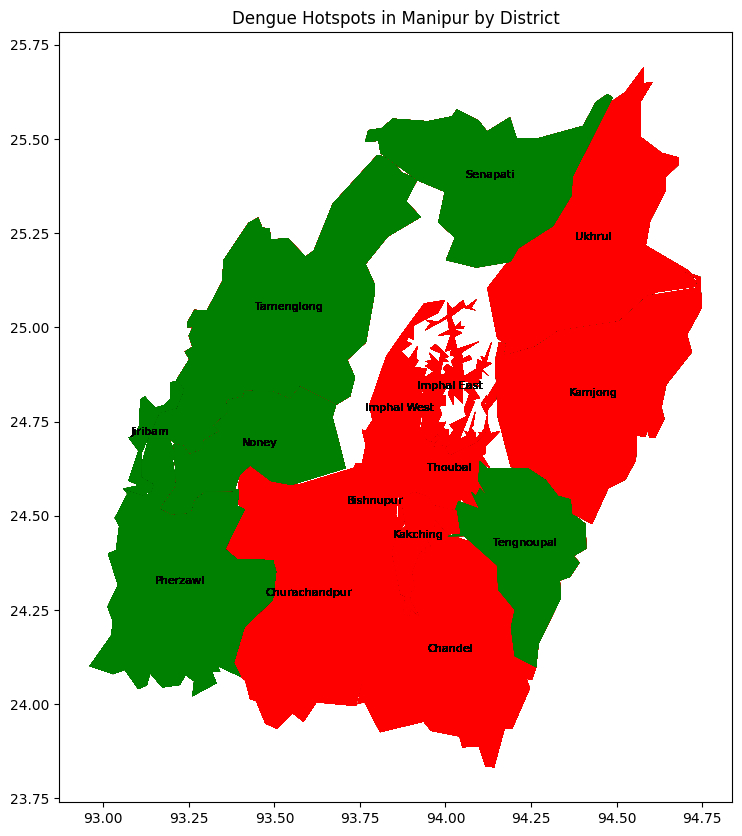

In [ ]:
import matplotlib.pyplot as plt

# Create a new column for colormap values: red for dengue cases, green for non-cases
final_merged_data['color'] = final_merged_data['Total Cases'].apply(lambda x: 'red' if x > 0 else 'green')

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plotting the polygons
final_merged_data.plot(column='color', ax=ax, legend=False, color=final_merged_data['color'])

# Add district names as text labels on the map
for idx, row in final_merged_data.iterrows():
    # Position the label at the centroid of each district
    x, y = row['geometry'].centroid.coords[0]
    ax.text(x, y, row['shapeName'], fontsize=8, ha='center', color='black')

# Title and show the plot
plt.title('Dengue Hotspots in Manipur by District')
plt.show()


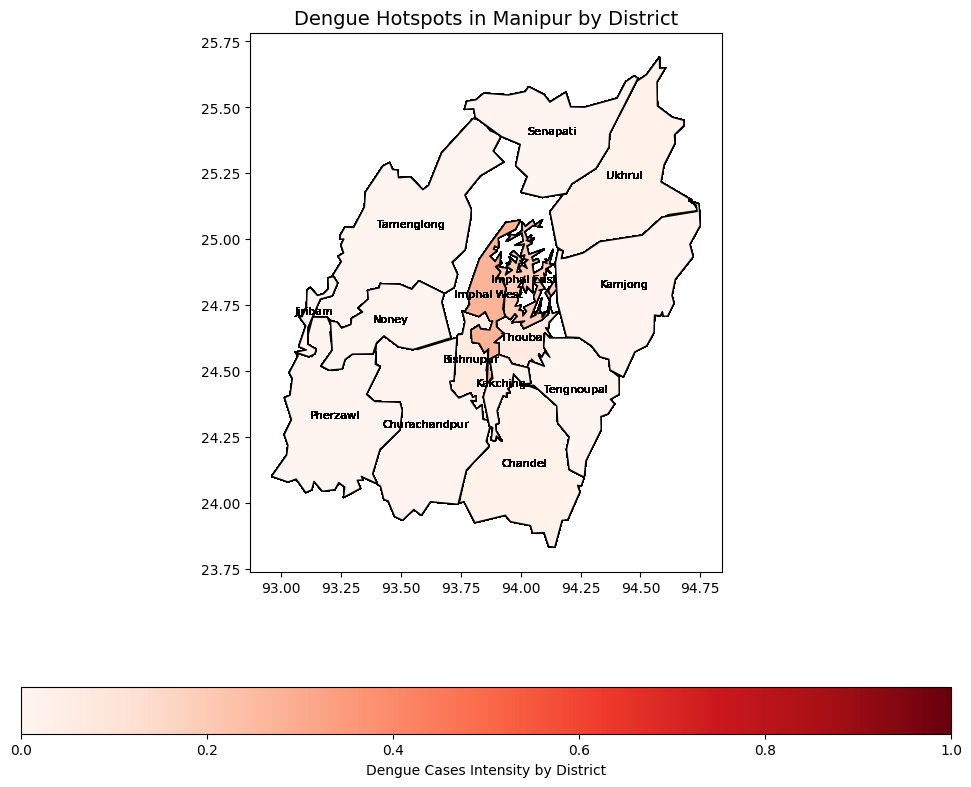

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Normalize the dengue cases to adjust color intensity
final_merged_data['color_intensity'] = final_merged_data['Total Cases'] / final_merged_data['Total Cases'].max()

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plotting the polygons with color intensity
final_merged_data.plot(column='color_intensity', ax=ax, legend=True,
                       legend_kwds={'label': "Dengue Cases Intensity by District",
                                    'orientation': "horizontal"},
                       cmap='Reds', edgecolor='black')

# Add district names as text labels on the map with Times New Roman font
for idx, row in final_merged_data.iterrows():
    # Position the label at the centroid of each district
    x, y = row['geometry'].centroid.coords[0]
    ax.text(x, y, row['shapeName'], fontsize=8, ha='center', fontname='Times New Roman', color='black')

# Title and show the plot with Times New Roman font
plt.title('Dengue Hotspots in Manipur by District', fontsize=14, fontname='Times New Roman')
plt.show()


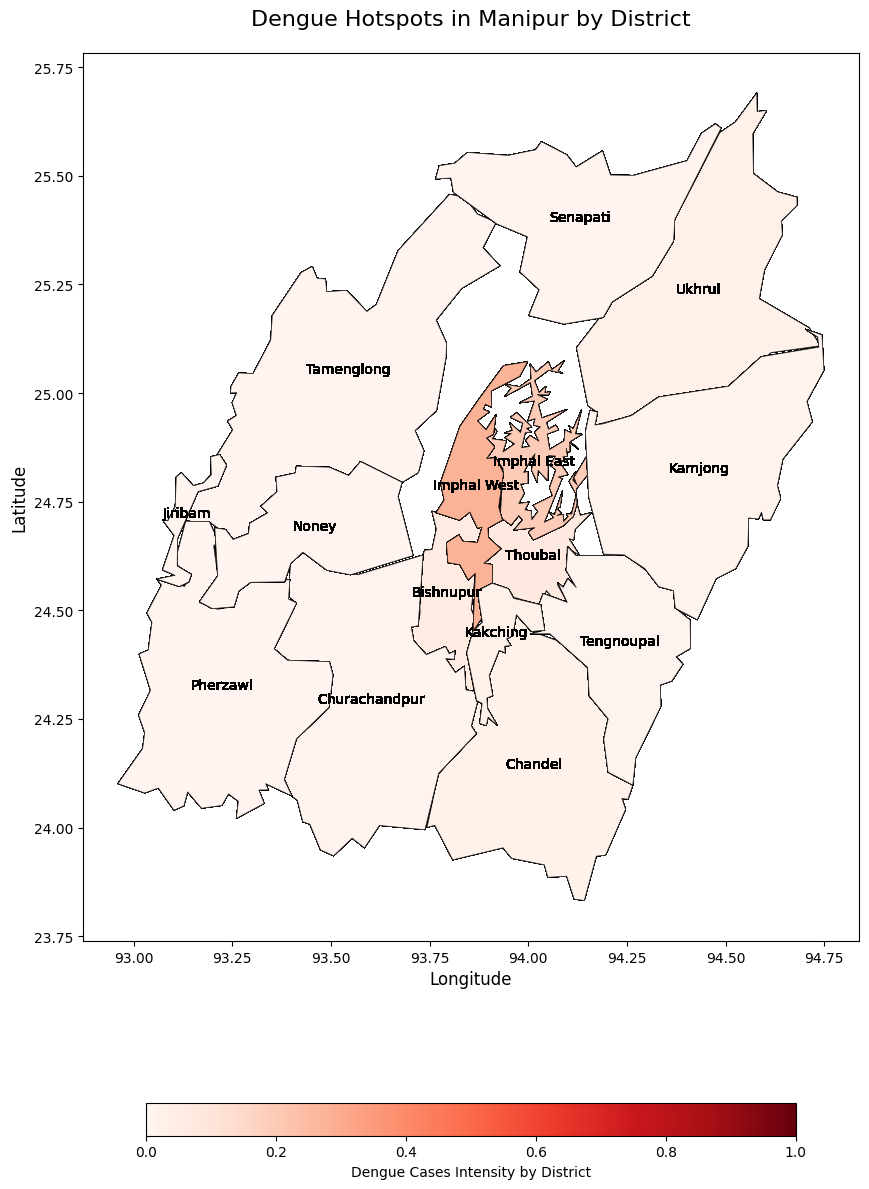

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Normalize the dengue cases to adjust color intensity
final_merged_data['color_intensity'] = final_merged_data['Total Cases'] / final_merged_data['Total Cases'].max()

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# Plotting the polygons with color intensity
final_merged_data.plot(column='color_intensity', ax=ax, legend=True,
                       legend_kwds={'label': "Dengue Cases Intensity by District",
                                    'orientation': "horizontal",
                                    'shrink': 0.7, 'fraction': 0.03},
                       cmap='Reds', edgecolor='black', linewidth=0.5, alpha=0.7)


# Add district names as text labels with increased font size
for idx, row in final_merged_data.iterrows():
    # Position the label at the centroid of each district
    x, y = row['geometry'].centroid.coords[0]
    # Use a valid color name or code (e.g., 'white', 'green', '#FFFFFF', '#008000')
    ax.text(x, y, row['shapeName'], fontsize=10, ha='center', fontname='DejaVu Sans', color='black') # Changed color to black

# Title and axis styling
plt.title('Dengue Hotspots in Manipur by District', fontsize=16, fontname='DejaVu Sans', pad=20)
ax.set_xlabel('Longitude', fontsize=12, fontname='DejaVu Sans')
ax.set_ylabel('Latitude', fontsize=12, fontname='DejaVu Sans')

# Tweak the layout for a clean look
plt.tight_layout()

# Show the plot
plt.show()


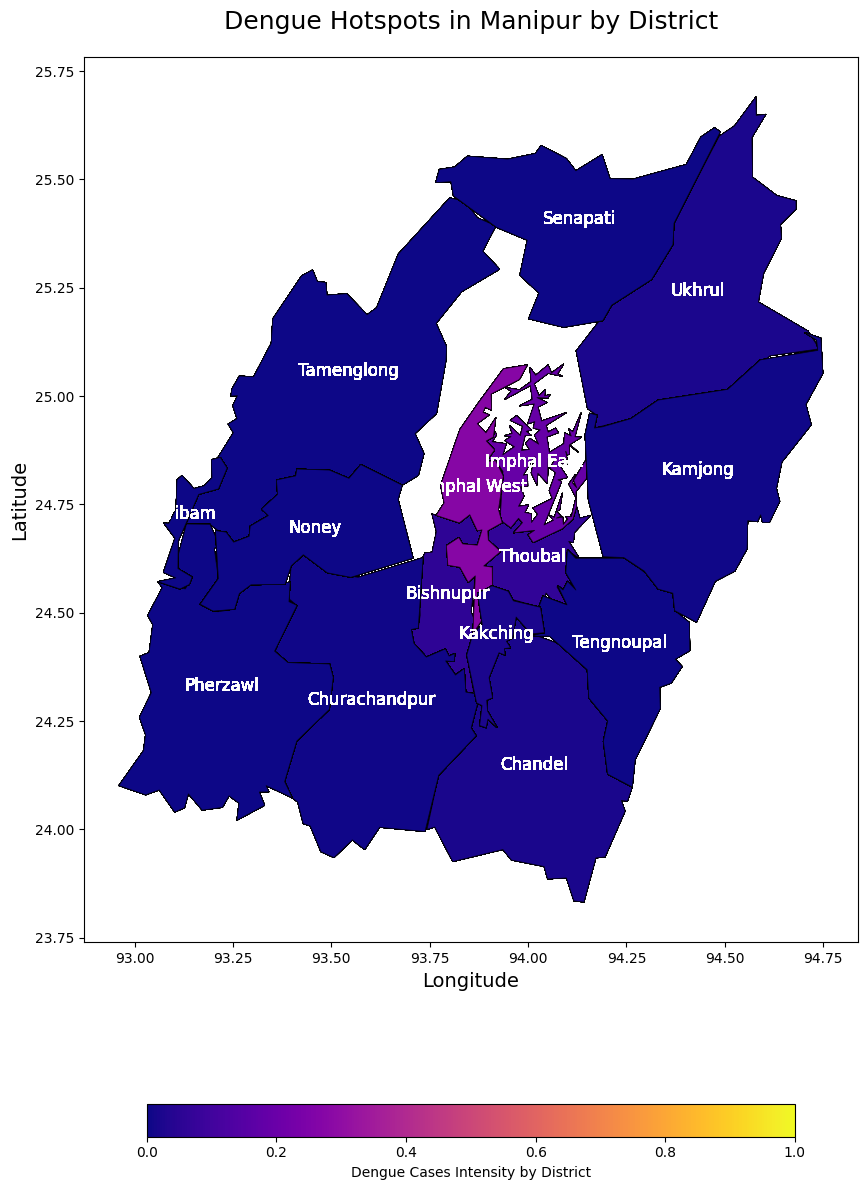

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Normalize the dengue cases to adjust color intensity
final_merged_data['color_intensity'] = final_merged_data['Total Cases'] / final_merged_data['Total Cases'].max()

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# Plotting the polygons with color intensity using 'plasma' colormap
final_merged_data.plot(column='color_intensity', ax=ax, legend=True,
                       legend_kwds={'label': "Dengue Cases Intensity by District",
                                    'orientation': "horizontal",
                                    'shrink': 0.7, 'fraction': 0.03},
                       cmap='plasma', edgecolor='black', linewidth=0.5, alpha=0.7)

# Add district names as text labels with increased font size
for idx, row in final_merged_data.iterrows():
    # Position the label at the centroid of each district
    x, y = row['geometry'].centroid.coords[0]
    ax.text(x, y, row['shapeName'], fontsize=12, ha='center', fontname='Arial', color='white')

# Title and axis styling with improved font
plt.title('Dengue Hotspots in Manipur by District', fontsize=18, fontname='Arial', pad=20)
ax.set_xlabel('Longitude', fontsize=14, fontname='Arial')
ax.set_ylabel('Latitude', fontsize=14, fontname='Arial')

# Tweak the layout for a clean look
plt.tight_layout()

# Show the plot
plt.show()


This map will show the intensity of dengue cases in different districts, with darker shades indicating higher case counts.

Step 4.5: Time-based Visualization (Optional)
If you want to see how the hotspots change over time (monthly or yearly), you can plot a heatmap for each month or year and analyze the spatial distribution of cases.

In [ ]:
# Create a pivot table to analyze cases per district over months
monthly_district_data = merged_data.pivot_table(index='District', columns='Months', values='Total Cases', aggfunc='sum')

# Plot heatmap of total cases per district across months
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_district_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Dengue Cases Heatmap by District and Month')
plt.xlabel('Month')
plt.ylabel('District')
plt.show()


Step 4.6: Spatial Clustering (Optional)
If you want to identify clusters of dengue cases (hotspots) in the spatial domain, you can use clustering algorithms such as K-means or DBSCAN. This requires converting the district data into a format that includes geographical coordinates (latitude and longitude) and then applying clustering algorithms to identify high-density regions.

In [ ]:
# Extract latitude and longitude for each district's geometry centroid
final_merged_data['latitude'] = final_merged_data['geometry'].centroid.y
final_merged_data['longitude'] = final_merged_data['geometry'].centroid.x

# Display the district names with their latitude and longitude
district_lat_lon = final_merged_data[['shapeName', 'latitude', 'longitude']]
print(district_lat_lon)

# Save the latitude and longitude data to a CSV file if needed
district_lat_lon.to_csv('district_lat_lon.csv', index=False)


     shapeName   latitude  longitude
0      Chandel  24.137852  94.015091
1      Chandel  24.137852  94.015091
2      Chandel  24.137852  94.015091
3      Chandel  24.137852  94.015091
4      Chandel  24.137852  94.015091
...        ...        ...        ...
1075   Jiribam  24.715520  93.135032
1076   Jiribam  24.715520  93.135032
1077   Jiribam  24.715520  93.135032
1078   Jiribam  24.715520  93.135032
1079   Jiribam  24.715520  93.135032

[1080 rows x 3 columns]


<ipython-input-124-119d860f2d7d>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  final_merged_data['latitude'] = final_merged_data['geometry'].centroid.y
<ipython-input-124-119d860f2d7d>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  final_merged_data['longitude'] = final_merged_data['geometry'].centroid.x


<ipython-input-125-2eb3079cd028>:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(final_merged_data.geometry.centroid.x,
<ipython-input-125-2eb3079cd028>:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  final_merged_data.geometry.centroid.y,


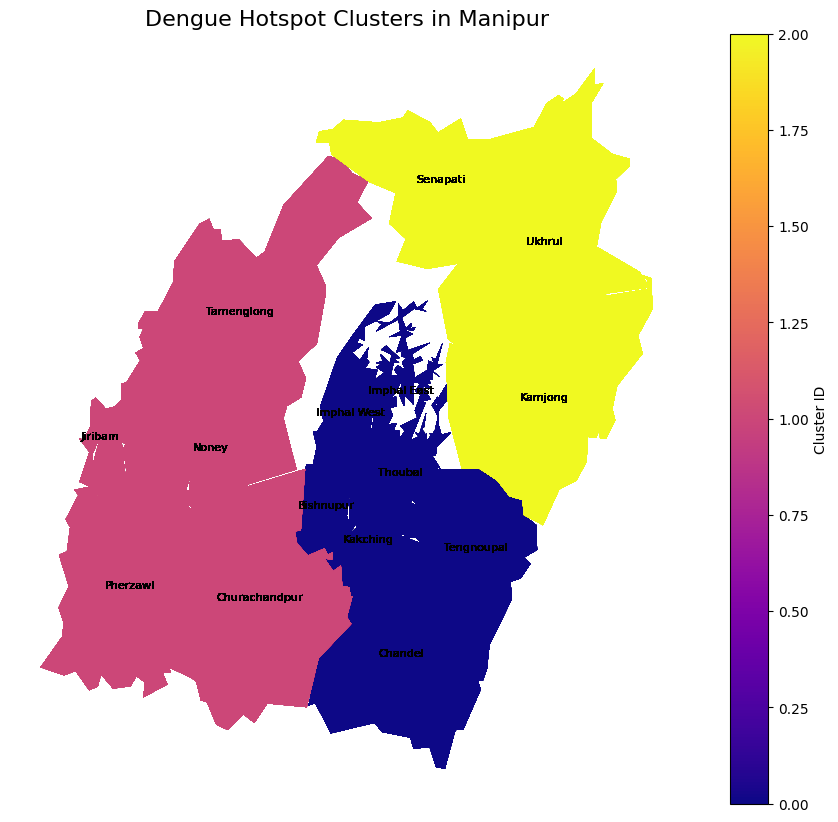

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Extract lat-long data from the GeoDataFrame (assuming `final_merged_data` has the data)
district_coords = final_merged_data[['latitude', 'longitude']].values

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust number of clusters as needed
final_merged_data['Cluster'] = kmeans.fit_predict(district_coords)

# Plot the clusters on the map
fig, ax = plt.subplots(figsize=(12, 10))

# Use the cluster column to color districts
final_merged_data.plot(column='Cluster', ax=ax, legend=True,
                       cmap='plasma',
                       legend_kwds={'label': 'Cluster ID',
                                    'orientation': 'vertical'})

# Add district names as labels on the map
for x, y, label in zip(final_merged_data.geometry.centroid.x,
                       final_merged_data.geometry.centroid.y,
                       final_merged_data['shapeName']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

# Title and styling
plt.title('Dengue Hotspot Clusters in Manipur', fontsize=16)
plt.axis('off')  # Hide axes
plt.show()


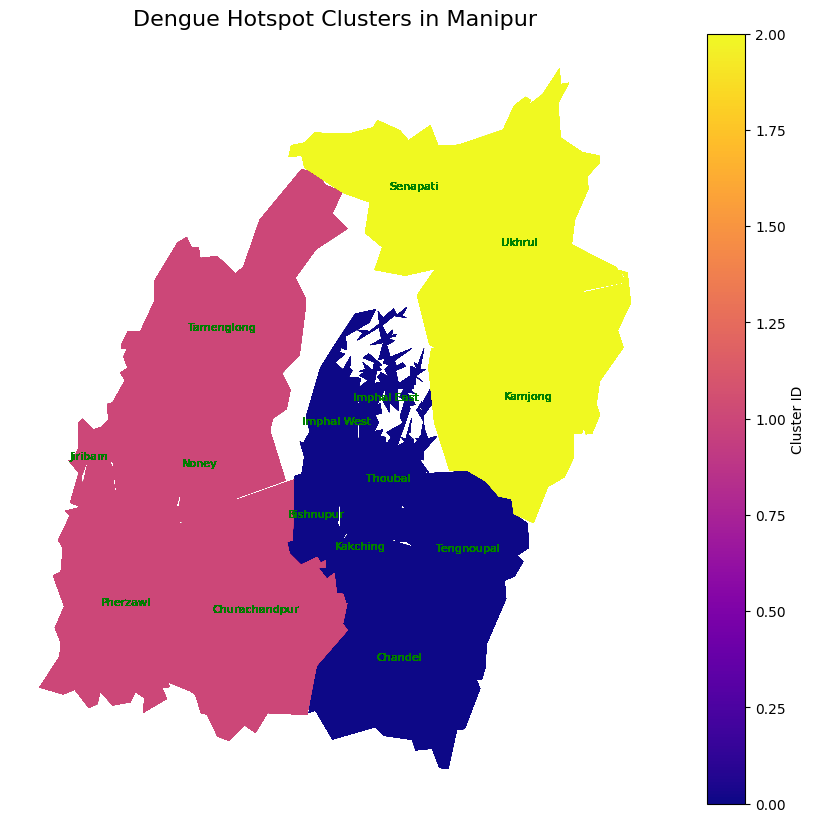

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Re-project geometries to a projected CRS (e.g., UTM)
projected_gdf = final_merged_data.to_crs(epsg=32645)  # EPSG:32645 is UTM zone 45N, suitable for Manipur region

# Extract lat-long data for clustering (original CRS is still used for KMeans)
district_coords = final_merged_data[['latitude', 'longitude']].values

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust number of clusters as needed
final_merged_data['Cluster'] = kmeans.fit_predict(district_coords)

# Plot the clusters on the map
fig, ax = plt.subplots(figsize=(12, 10))

# Use the cluster column to color districts
projected_gdf.plot(column='Cluster', ax=ax, legend=True,
                   cmap='plasma',
                   legend_kwds={'label': 'Cluster ID',
                                'orientation': 'vertical'})

# Add district names as labels (use centroids from the projected CRS)
for x, y, label in zip(projected_gdf.geometry.centroid.x,
                       projected_gdf.geometry.centroid.y,
                       final_merged_data['shapeName']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='green')

# Title and styling
plt.title('Dengue Hotspot Clusters in Manipur', fontsize=16)
plt.axis('off')  # Hide axes
plt.show()


This will highlight areas that are considered "hotspots" based on the clustering algorithm.

ValueError: Image size of 359931405x895085936 pixels is too large. It must be less than 2^23 in each direction.

<Figure size 1400x1200 with 2 Axes>

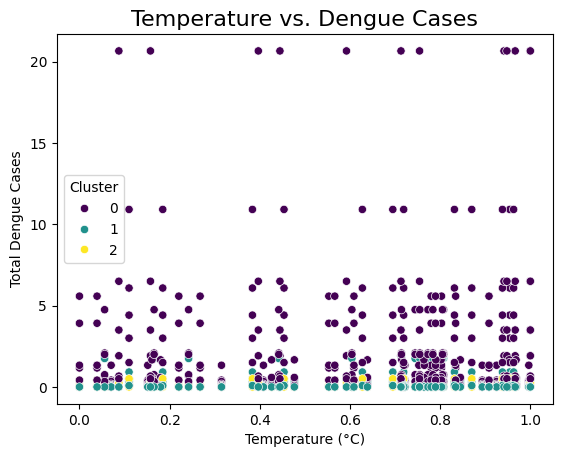

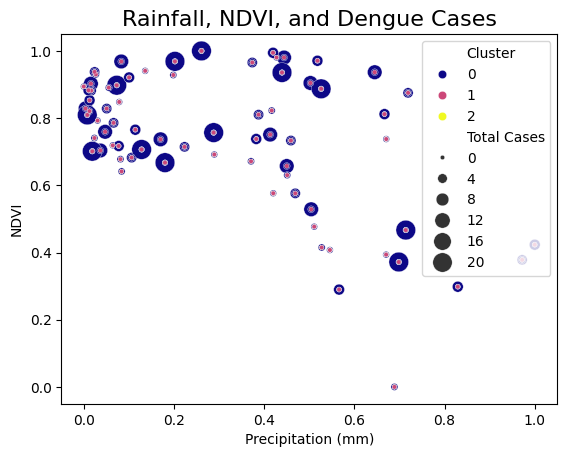

In [ ]:
import seaborn as sns
from matplotlib import colors

# Normalize climatic and socioeconomic factors for comparison
for column in ['Temperature (°C)', 'Precipitation (mm)', 'NDVI', 'Urbanization', 'Healthcare Access']:
    if column in final_merged_data.columns:
        final_merged_data[column] = (final_merged_data[column] - final_merged_data[column].min()) / \
                                    (final_merged_data[column].max() - final_merged_data[column].min())

# Overlay climatic data on clusters
fig, ax = plt.subplots(1, 1, figsize=(14, 12))
final_merged_data.plot(column='Temperature (°C)', ax=ax, legend=True, cmap='coolwarm',
                       legend_kwds={'label': 'Temperature (°C)', 'orientation': 'horizontal'})

# Add cluster labels
for x, y, label in zip(projected_gdf.geometry.centroid.x, projected_gdf.geometry.centroid.y, final_merged_data['Cluster']):
    ax.text(x, y, f"Cluster {label}", fontsize=10, ha='center', va='center', color='black')

# Title and styling
plt.title('Temperature Overlay on Dengue Clusters', fontsize=16)
plt.axis('off')
plt.show()

# Scatterplot: Relationship between Temperature and Total Cases
sns.scatterplot(data=final_merged_data, x='Temperature (°C)', y='Total Cases', hue='Cluster', palette='viridis')
plt.title('Temperature vs. Dengue Cases', fontsize=16)
plt.xlabel('Temperature (°C)')
plt.ylabel('Total Dengue Cases')
plt.show()

# Scatterplot: Rainfall and NDVI vs. Total Cases
sns.scatterplot(data=final_merged_data, x='Precipitation (mm)', y='NDVI', size='Total Cases', hue='Cluster', palette='plasma', sizes=(10, 200))
plt.title('Rainfall, NDVI, and Dengue Cases', fontsize=16)
plt.xlabel('Precipitation (mm)')
plt.ylabel('NDVI')
plt.show()



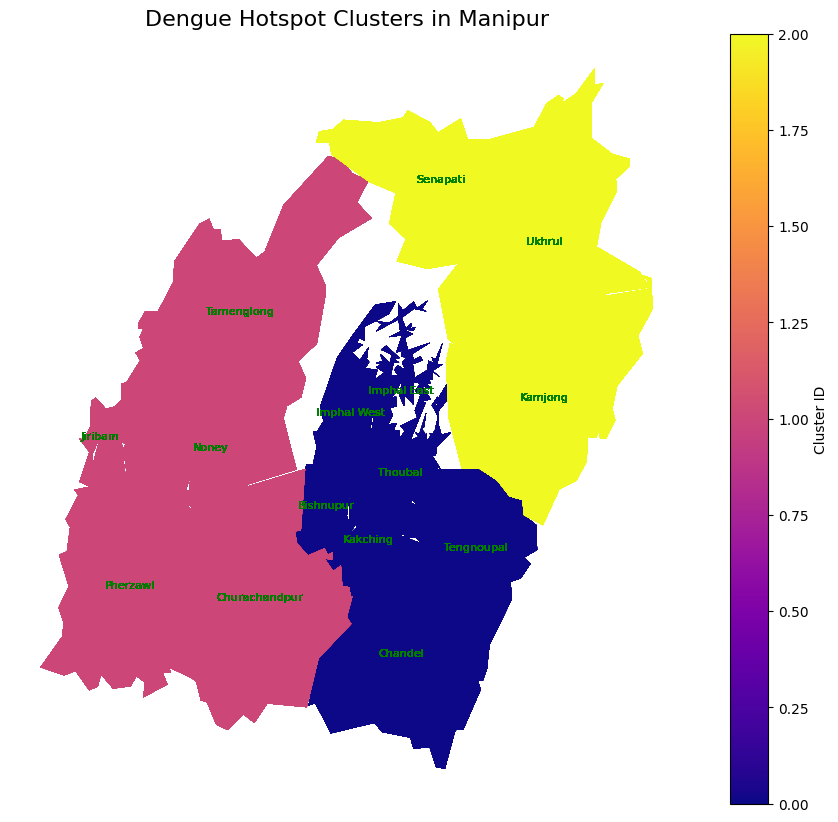

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pyproj # import pyproj

# Re-project geometries to a projected CRS (e.g., UTM)
projected_gdf = final_merged_data.to_crs(epsg=32645)  # EPSG:32645 is UTM zone 45N, suitable for Manipur region

# Extract lat-long data for clustering (original CRS is still used for KMeans)
district_coords = final_merged_data[['latitude', 'longitude']].values

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust number of clusters as needed
final_merged_data['Cluster'] = kmeans.fit_predict(district_coords)

# Plot the clusters on the map
fig, ax = plt.subplots(figsize=(12, 10))

# Use the cluster column to color districts
# Use the original GeoDataFrame (final_merged_data) for plotting to avoid large coordinates
final_merged_data.plot(column='Cluster', ax=ax, legend=True,
                       cmap='plasma',
                       legend_kwds={'label': 'Cluster ID',
                                    'orientation': 'vertical'})

# Add district names as labels (use centroids from the projected CRS if necessary)
for x, y, label in zip(projected_gdf.geometry.centroid.x,
                       projected_gdf.geometry.centroid.y,
                       final_merged_data['shapeName']):
    # Project centroids back to the original CRS if needed for proper label placement
    # x, y = final_merged_data.crs.transform_point(x, y, src_crs=projected_gdf.crs)

    # Get the transformer object
    transformer = pyproj.Transformer.from_crs(projected_gdf.crs, final_merged_data.crs, always_xy=True)

    # Convert coordinates to the original CRS for label placement
    x, y = transformer.transform(x, y)  # Use transformer.transform
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='green')

# Title and styling
plt.title('Dengue Hotspot Clusters in Manipur', fontsize=16)
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
from shapely.validation import explain_validity

# Validate geometries
invalid_geometries = final_merged_data[~final_merged_data.geometry.is_valid]
if not invalid_geometries.empty:
    print("Invalid geometries detected:")
    print(invalid_geometries)


In [ ]:
final_merged_data.geometry = final_merged_data.geometry.buffer(0)


In [ ]:
print(projected_gdf.geometry)


0       POLYGON ((1211446.192 2722280.952, 1207355.234...
1       POLYGON ((1211446.192 2722280.952, 1207355.234...
2       POLYGON ((1211446.192 2722280.952, 1207355.234...
3       POLYGON ((1211446.192 2722280.952, 1207355.234...
4       POLYGON ((1211446.192 2722280.952, 1207355.234...
                              ...                        
1075    POLYGON ((1114278.286 2731089.944, 1120106.618...
1076    POLYGON ((1114278.286 2731089.944, 1120106.618...
1077    POLYGON ((1114278.286 2731089.944, 1120106.618...
1078    POLYGON ((1114278.286 2731089.944, 1120106.618...
1079    POLYGON ((1114278.286 2731089.944, 1120106.618...
Name: geometry, Length: 1080, dtype: geometry


In [ ]:
projected_gdf = projected_gdf.to_crs("EPSG:3857")  # Use a metric projection


ValueError: Image size of 3021220366x925613070 pixels is too large. It must be less than 2^23 in each direction.

<Figure size 1400x1200 with 2 Axes>

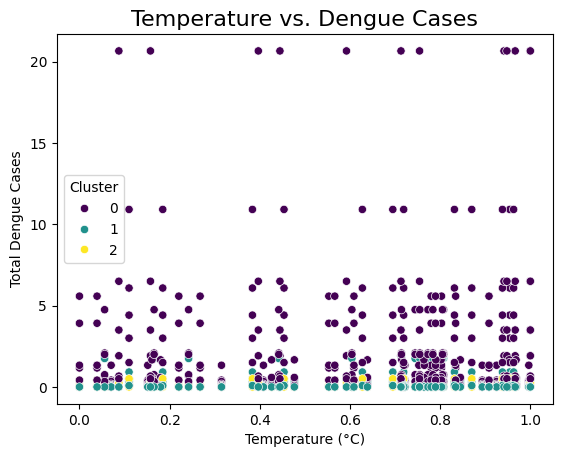

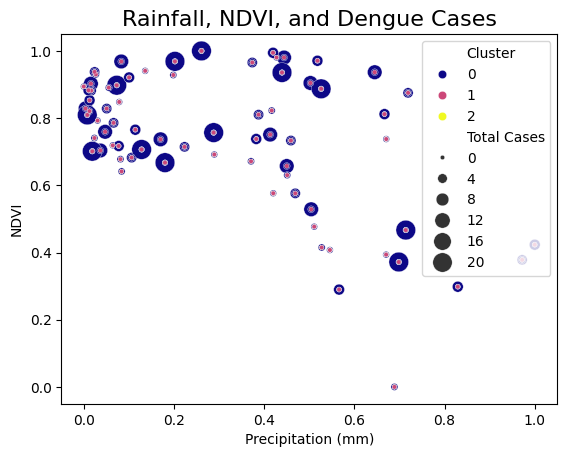

In [ ]:
import seaborn as sns
from matplotlib import colors
import matplotlib.pyplot as plt

# Normalize climatic and socioeconomic factors for comparison
for column in ['Temperature (°C)', 'Precipitation (mm)', 'NDVI']:
    if column in final_merged_data.columns:
        final_merged_data[column] = (final_merged_data[column] - final_merged_data[column].min()) / \
                                    (final_merged_data[column].max() - final_merged_data[column].min())

# Overlay climatic data on clusters
fig, ax = plt.subplots(1, 1, figsize=(14, 12))
final_merged_data.plot(column='Temperature (°C)', ax=ax, legend=True, cmap='coolwarm',
                       legend_kwds={'label': 'Temperature (°C)', 'orientation': 'horizontal'})

# Add cluster labels
for x, y, label in zip(projected_gdf.geometry.centroid.x, projected_gdf.geometry.centroid.y, final_merged_data['Cluster']):
    ax.text(x, y, f"Cluster {label}", fontsize=10, ha='center', va='center', color='black')

# Title and styling
plt.title('Temperature Overlay on Dengue Clusters', fontsize=16)
plt.axis('off')
plt.show()

# Scatterplot: Relationship between Temperature and Total Cases
sns.scatterplot(data=final_merged_data, x='Temperature (°C)', y='Total Cases', hue='Cluster', palette='viridis')
plt.title('Temperature vs. Dengue Cases', fontsize=16)
plt.xlabel('Temperature (°C)')
plt.ylabel('Total Dengue Cases')
plt.show()

# Scatterplot: Rainfall and NDVI vs. Total Cases
sns.scatterplot(data=final_merged_data, x='Precipitation (mm)', y='NDVI', size='Total Cases', hue='Cluster', palette='plasma', sizes=(10, 200))
plt.title('Rainfall, NDVI, and Dengue Cases', fontsize=16)
plt.xlabel('Precipitation (mm)')
plt.ylabel('NDVI')
plt.show()


In [ ]:
print(final_merged_data.geometry.bounds)
print(projected_gdf.geometry.bounds)


          minx      miny       maxx      maxy
0     93.74344  23.83245  94.265005  24.49019
1     93.74344  23.83245  94.265005  24.49019
2     93.74344  23.83245  94.265005  24.49019
3     93.74344  23.83245  94.265005  24.49019
4     93.74344  23.83245  94.265005  24.49019
...        ...       ...        ...       ...
1075  93.05911  24.55496  93.235310  24.85855
1076  93.05911  24.55496  93.235310  24.85855
1077  93.05911  24.55496  93.235310  24.85855
1078  93.05911  24.55496  93.235310  24.85855
1079  93.05911  24.55496  93.235310  24.85855

[1080 rows x 4 columns]
              minx          miny          maxx          maxy
0     1.043547e+07  2.733005e+06  1.049353e+07  2.813255e+06
1     1.043547e+07  2.733005e+06  1.049353e+07  2.813255e+06
2     1.043547e+07  2.733005e+06  1.049353e+07  2.813255e+06
3     1.043547e+07  2.733005e+06  1.049353e+07  2.813255e+06
4     1.043547e+07  2.733005e+06  1.049353e+07  2.813255e+06
...            ...           ...           ...           

In [ ]:
final_merged_data = final_merged_data.to_crs("EPSG:3857")
projected_gdf = projected_gdf.to_crs("EPSG:3857")


In [ ]:
print(projected_gdf.geometry.centroid)


0       POINT (10465712.287 2770244.618)
1       POINT (10465712.287 2770244.618)
2       POINT (10465712.287 2770244.618)
3       POINT (10465712.287 2770244.618)
4       POINT (10465712.287 2770244.618)
                      ...               
1075    POINT (10367746.586 2840854.199)
1076    POINT (10367746.586 2840854.199)
1077    POINT (10367746.586 2840854.199)
1078    POINT (10367746.586 2840854.199)
1079    POINT (10367746.586 2840854.199)
Length: 1080, dtype: geometry


In [ ]:
final_merged_data.geometry = final_merged_data.geometry.buffer(0)
projected_gdf.geometry = projected_gdf.geometry.buffer(0)


In [ ]:
final_merged_data.geometry = final_merged_data.geometry.simplify(tolerance=100, preserve_topology=True)
projected_gdf.geometry = projected_gdf.geometry.simplify(tolerance=100, preserve_topology=True)


<Axes: >

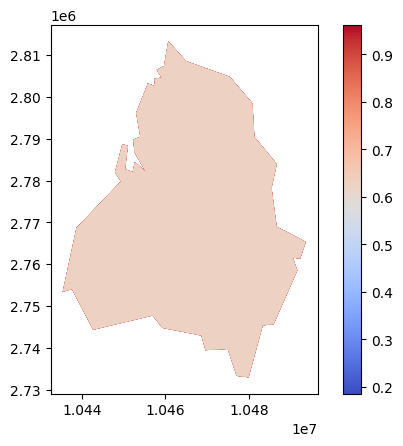

In [ ]:
final_merged_data.head(10).plot(column='Temperature (°C)', legend=True, cmap='coolwarm')


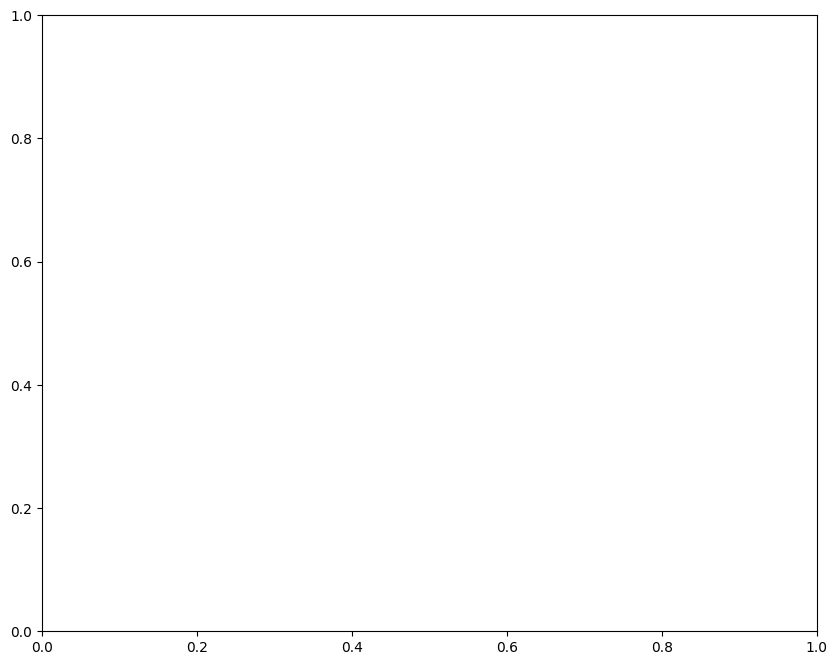

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8), dpi=100)


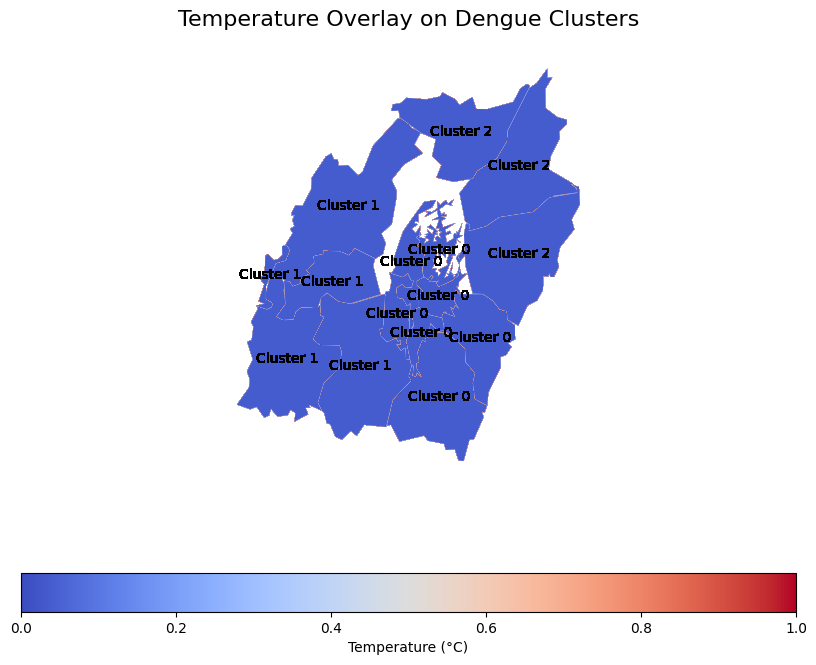

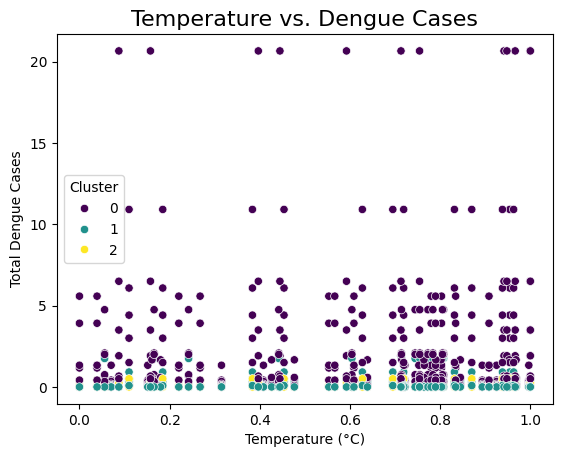

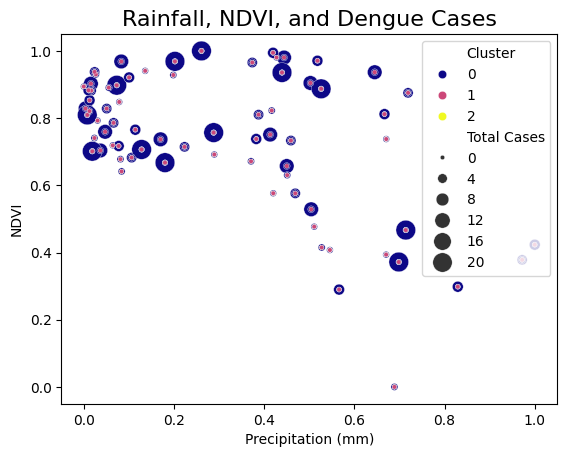

In [ ]:
import seaborn as sns
from matplotlib import colors
import matplotlib.pyplot as plt

# Reproject geometries (if needed)
final_merged_data = final_merged_data.to_crs("EPSG:3857")
projected_gdf = projected_gdf.to_crs("EPSG:3857")

# Fix invalid geometries
final_merged_data.geometry = final_merged_data.geometry.buffer(0)
projected_gdf.geometry = projected_gdf.geometry.buffer(0)

# Simplify geometries
final_merged_data.geometry = final_merged_data.geometry.simplify(tolerance=100, preserve_topology=True)
projected_gdf.geometry = projected_gdf.geometry.simplify(tolerance=100, preserve_topology=True)

# Normalize factors for comparison
for column in ['Temperature (°C)', 'Precipitation (mm)', 'NDVI']:
    if column in final_merged_data.columns:
        final_merged_data[column] = (final_merged_data[column] - final_merged_data[column].min()) / \
                                    (final_merged_data[column].max() - final_merged_data[column].min())

# Plot Temperature Overlay
fig, ax = plt.subplots(1, 1, figsize=(10, 8), dpi=100)
final_merged_data.plot(column='Temperature (°C)', ax=ax, legend=True, cmap='coolwarm',
                       legend_kwds={'label': 'Temperature (°C)', 'orientation': 'horizontal'})

# Add Cluster Labels
for x, y, label in zip(projected_gdf.geometry.centroid.x, projected_gdf.geometry.centroid.y, final_merged_data['Cluster']):
    ax.text(x, y, f"Cluster {label}", fontsize=10, ha='center', va='center', color='black')

plt.title('Temperature Overlay on Dengue Clusters', fontsize=16)
plt.axis('off')
plt.show()

# Scatterplots
sns.scatterplot(data=final_merged_data, x='Temperature (°C)', y='Total Cases', hue='Cluster', palette='viridis')
plt.title('Temperature vs. Dengue Cases', fontsize=16)
plt.xlabel('Temperature (°C)')
plt.ylabel('Total Dengue Cases')
plt.show()

sns.scatterplot(data=final_merged_data, x='Precipitation (mm)', y='NDVI', size='Total Cases', hue='Cluster', palette='plasma', sizes=(10, 200))
plt.title('Rainfall, NDVI, and Dengue Cases', fontsize=16)
plt.xlabel('Precipitation (mm)')
plt.ylabel('NDVI')
plt.show()


Step 1: Understand the Purpose of ANCOVA
What it does: ANCOVA helps you determine the effect of one or more independent variables on a dependent variable while controlling for the influence of covariates.
Why it’s useful for your study:
You can analyze how climatic factors (e.g., temperature, precipitation) and other variables (e.g., NDVI) influence dengue cases.
You can control for potential confounders, such as population density or access to healthcare.
Step 2: Data Preparation
Ensure your dataset is ready for ANCOVA:

Dependent Variable: Total Dengue Cases (continuous variable).
Independent Variables: Example: Temperature (°C), Precipitation (mm).
Covariates: Example: NDVI, Cluster (if categorical, convert to dummy variables).
Check for missing values and handle them appropriately:

In [ ]:
# Check for missing values
print(final_merged_data.isnull().sum())

# Drop or fill missing values
final_merged_data = final_merged_data.dropna()  # Or use .fillna() to impute missing values


shapeName                    0
shapeISO                     0
shapeID                      0
shapeGroup                   0
shapeType                    0
geometry                     0
Year                         0
Temperature (°C)             0
Precipitation (mm)           0
NDVI                         0
District                     0
Total Cases                  0
IgM Mac ELISA Postive        0
NS1 Antigen ELISA Postive    0
color                        0
color_intensity              0
latitude                     0
longitude                    0
Cluster                      0
dtype: int64


Step 3: Perform ANCOVA
# **We can use Python’s statsmodels library to perform ANCOVA.**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define the ANCOVA model
model = ols('Total_Cases ~ Temperature + Precipitation + NDVI', data=final_merged_data).fit()

# View the summary
print(model.summary())


PatsyError: Error evaluating factor: NameError: name 'Total_Cases' is not defined
    Total_Cases ~ Temperature + Precipitation + NDVI
    ^^^^^^^^^^^

In [ ]:
print(final_merged_data.columns)


Index(['shapeName', 'shapeISO', 'shapeID', 'shapeGroup', 'shapeType',
       'geometry', 'Year', 'Temperature (°C)', 'Precipitation (mm)', 'NDVI',
       'District', 'Total Cases', 'IgM Mac ELISA Postive',
       'NS1 Antigen ELISA Postive', 'color', 'color_intensity', 'latitude',
       'longitude', 'Cluster'],
      dtype='object')


In [ ]:
print(final_merged_data.columns.tolist())


['shapeName', 'shapeISO', 'shapeID', 'shapeGroup', 'shapeType', 'geometry', 'Year', 'Temperature (°C)', 'Precipitation (mm)', 'NDVI', 'District', 'Total_Cases', 'IgM Mac ELISA Postive', 'NS1 Antigen ELISA Postive', 'color', 'color_intensity', 'latitude', 'longitude', 'Cluster']


In [ ]:
# Rename columns to simpler names
final_merged_data.rename(columns={
    'Temperature (°C)': 'Temperature',
    'Precipitation (mm)': 'Precipitation'
}, inplace=True)

# Define the ANCOVA model
model = ols('Total_Cases ~ Temperature + Precipitation + NDVI', data=final_merged_data).fit()

# View the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            Total_Cases   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.579
Date:                Thu, 23 Jan 2025   Prob (F-statistic):              0.193
Time:                        09:10:16   Log-Likelihood:                -2606.8
No. Observations:                1080   AIC:                             5222.
Df Residuals:                    1076   BIC:                             5242.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0766      0.488      0.157

Key Observations:
R-squared and Adjusted R-squared:

R-squared: 0.004 — This indicates that only 0.4% of the variation in dengue cases (Total_Cases) is explained by the predictors (Temperature, Precipitation, and NDVI).
This suggests that the predictors in this model are not strongly associated with the number of dengue cases.
P-Values for Predictors:

Temperature: P-value = 0.254 (> 0.05), indicating it is not statistically significant in predicting Total_Cases.
Precipitation: P-value = 0.899 (> 0.05), indicating it is not statistically significant in predicting Total_Cases.
NDVI: P-value = 0.044 (< 0.05), suggesting it is statistically significant at a 5% level in predicting Total_Cases.
Coefficient Interpretation:

Intercept: 0.0766 — The baseline value of Total_Cases when all predictors are zero.
Temperature: 0.4187 — A unit increase in temperature is associated with an estimated increase of 0.4187 dengue cases, but this is not statistically significant.
Precipitation: 0.0548 — A unit increase in precipitation is associated with an estimated increase of 0.0548 dengue cases, but this is not statistically significant.
NDVI: 0.9864 — A unit increase in NDVI is associated with an estimated increase of 0.9864 dengue cases, and this effect is statistically significant.
Model Fit:

The F-statistic of 1.579 and its P-value (0.193) indicate that the overall model is not statistically significant. This means that the predictors, as a group, do not significantly explain the variation in Total_Cases.
Residual Diagnostics:

Durbin-Watson: 0.112 — This suggests a very high level of positive autocorrelation in the residuals, which violates regression assumptions.
Omnibus and Jarque-Bera Tests: These tests show very high skewness and kurtosis in the residuals, suggesting the data is not normally distributed.
Recommendations:
Model Improvement:

Include additional predictors that might better explain the variation in dengue cases, such as population density, sanitation, or mosquito breeding site data.
Consider interactions between variables (e.g., interaction between Temperature and Precipitation).
Address Residual Issues:

Check for multicollinearity among predictors. Use the Variance Inflation Factor (VIF)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
variables = final_merged_data[['Temperature', 'Precipitation', 'NDVI']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
print(vif)


        VIF       Features
0  7.316837    Temperature
1  4.114666  Precipitation
2  3.186662           NDVI


Investigate the distribution of residuals and transform variables if necessary (e.g., log-transformation).
Clustering Consideration:

Since the data involves clusters, consider adding Cluster as a fixed or random effect in the model to account for clustering effects.
Alternative Models:

If the dependent variable (Total_Cases) is count-based, consider using a Poisson regression or negative binomial regression, which are better suited for count data:

In [ ]:
import statsmodels.api as sm
model = sm.GLM(final_merged_data['Total_Cases'],
               sm.add_constant(final_merged_data[['Temperature', 'Precipitation', 'NDVI']]),
               family=sm.families.Poisson()).fit()
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:            Total_Cases   No. Observations:                 1080
Model:                            GLM   Df Residuals:                     1076
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2226.1
Date:                Thu, 23 Jan 2025   Deviance:                       3219.5
Time:                        09:12:07   Pearson chi2:                 7.21e+03
No. Iterations:                     6   Pseudo R-squ. (CS):            0.03028
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.8958      0.181     -4.951

Key Observations:
Model Fit:

Log-Likelihood: -2226.1 — A higher log-likelihood value (closer to zero) indicates a better fit.
Deviance: 3219.5 — Deviance measures the goodness of fit; lower values indicate a better fit.
Pseudo R-squared (Cox-Snell): 0.03028 — This is a pseudo-measure of explained variance, suggesting the model explains 3.03% of the variation in dengue cases.
Predictor Significance:

Temperature:
Coefficient: 0.4096 — A one-unit increase in temperature leads to an expected increase in the log count of dengue cases by 0.41.
P-value: 0.002 (< 0.05), indicating it is statistically significant.
Precipitation:
Coefficient: 0.0062 — Precipitation has a negligible impact, with a P-value of 0.968 (> 0.05), making it statistically insignificant.
NDVI:
Coefficient: 0.9529 — A one-unit increase in NDVI leads to an expected increase in the log count of dengue cases by 0.95.
P-value: 0.000 (< 0.05), indicating it is highly significant.
Intercept:

Coefficient: -0.8958 — This represents the log of expected dengue cases when all predictors are zero. It is statistically significant (P-value < 0.05).
Interpretation:
Temperature and NDVI are the key predictors for dengue cases.
Precipitation does not appear to have a significant direct effect on dengue cases, based on this model.
The positive coefficients for Temperature and NDVI suggest that warmer temperatures and higher vegetation levels (indicated by NDVI) are associated with increased dengue cases.
Recommendations for Further Steps:
Diagnostics:

Check for overdispersion in the Poisson model (if variance is much larger than the mean).
If overdispersion is present, consider using a negative binomial regression.

In [ ]:
!pip install --upgrade statsmodels


In [ ]:
import statsmodels.api as sm
from statsmodels.api import NegativeBinomial

model_nb = NegativeBinomial(final_merged_data['Total_Cases'],
                             sm.add_constant(final_merged_data[['Temperature', 'Precipitation', 'NDVI']]))
result_nb = model_nb.fit()
print(result_nb.summary())


Optimization terminated successfully.
         Current function value: 1.375176
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
                     NegativeBinomial Regression Results                      
Dep. Variable:            Total_Cases   No. Observations:                 1080
Model:               NegativeBinomial   Df Residuals:                     1076
Method:                           MLE   Df Model:                            3
Date:                Thu, 23 Jan 2025   Pseudo R-squ.:                0.003343
Time:                        09:14:51   Log-Likelihood:                -1485.2
converged:                       True   LL-Null:                       -1490.2
Covariance Type:            nonrobust   LLR p-value:                   0.01888
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.8923      0.

Model Overview:
Dependent Variable: Total_Cases
Number of Observations: 1080
Pseudo R-squared: 0.003343 (relatively low, indicating weak explanatory power of the predictors on the dependent variable).
Log-Likelihood: -1485.2 (higher absolute values indicate a worse fit).
Interpretation of Coefficients:
Intercept:

Coefficient: -0.8923
Interpretation: At average values of the predictors, the log count of dengue cases is approximately -0.89.
Significance: Statistically significant (
𝑝
=
0.006
p=0.006).
Temperature:

Coefficient: 0.3836
Interpretation: A one-unit increase in Temperature (°C) is associated with an expected 47% increase in dengue cases (
𝑒
0.3836
e
0.3836
 ) on average, holding other variables constant.
Significance: Marginally insignificant (
𝑝
=
0.105
p=0.105).
Precipitation:

Coefficient: 0.0219
Interpretation: A one-unit increase in Precipitation (mm) is associated with an expected 2.2% increase in dengue cases (
𝑒
0.0219
e
0.0219
 ) on average, holding other variables constant.
Significance: Not statistically significant (
𝑝
=
0.938
p=0.938).
NDVI (Normalized Difference Vegetation Index):

Coefficient: 0.9634
Interpretation: A one-unit increase in NDVI is associated with an expected 162% increase in dengue cases (
𝑒
0.9634
e
0.9634
 ), holding other variables constant.
Significance: Statistically significant (
𝑝
=
0.003
p=0.003).
Alpha:

Coefficient: 2.2006
Interpretation: This parameter quantifies overdispersion in the data. A large value indicates substantial variability beyond what is explained by the predictors.
Model Significance:
LLR p-value: 0.01888
Indicates that the overall model is statistically significant, meaning at least one of the predictors contributes to explaining the variation in dengue cases.
Implications:
NDVI is a significant predictor of dengue cases, with a strong positive association. Vegetation and ecological factors might play a crucial role in influencing mosquito habitats and dengue transmission.
Temperature has a positive but marginal effect, suggesting the potential for an impact, but further investigation is warranted.
Precipitation does not appear to be a significant predictor, potentially indicating that its relationship with dengue cases is either non-linear or mediated by other factors.
Recommendations:
Investigate Non-linear Relationships:
Consider interaction terms or polynomial terms for Precipitation and Temperature to explore non-linear effects.
Spatial Analysis:
Dengue cases often exhibit spatial clustering. Including geographic variables might enhance the model's predictive power.
Explore Alternative Predictors:
Factors like population density, housing conditions, and mosquito density might improve the model.
Let me know if you'd like help with further analysis or interpretation!

ere:

Total_Cases is the dependent variable.
Temperature, Precipitation, and NDVI are the predictors.

Step 4: Include Categorical Variables (if needed)
If you want to include categorical variables like Cluster, you’ll need to encode them:

In [ ]:
# Convert 'Cluster' to a categorical variable
final_merged_data['Cluster'] = final_merged_data['Cluster'].astype('category')

# Define ANCOVA model with Cluster
model = ols('Total_Cases ~ Temperature + Precipitation + NDVI + C(Cluster)', data=final_merged_data).fit()

# View the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            Total_Cases   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     33.99
Date:                Thu, 23 Jan 2025   Prob (F-statistic):           2.67e-32
Time:                        09:19:40   Log-Likelihood:                -2529.9
No. Observations:                1080   AIC:                             5072.
Df Residuals:                    1074   BIC:                             5102.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.1301      0.462     

Yes, the OLS Regression model you presented shares some similarities with Analysis of Covariance (ANCOVA), but there are key differences in focus and methodology. Let’s break down the relationship between the two:

Similarities:
Common Goal:

Both OLS regression and ANCOVA are used to examine the relationship between a dependent variable and one or more independent variables.
Both approaches are designed to test how the dependent variable changes based on the variation in the independent variables, while controlling for certain factors.
Continuous and Categorical Predictors:

In your OLS model, you have continuous predictors (e.g., Temperature, Precipitation, NDVI) and categorical predictors (e.g., Cluster).
In ANCOVA, you often have both continuous covariates and categorical factors (e.g., treatment groups). ANCOVA adjusts the means of the dependent variable across different levels of a categorical variable, while accounting for the continuous covariates.
Differences:
Purpose:

OLS Regression aims to predict the dependent variable by modeling the relationship between the dependent variable and a set of predictors (which could be either continuous or categorical).
ANCOVA specifically compares the means of the dependent variable across different levels of a categorical variable (factor), while adjusting for the effects of continuous covariates. ANCOVA is often used when you want to control for continuous covariates and test the effect of a categorical variable.
Interpretation:

In OLS, the coefficients represent the expected change in the dependent variable for a one-unit change in the predictor, assuming linear relationships.
In ANCOVA, the model is designed to estimate the adjusted means of the dependent variable for each level of the categorical factor, after controlling for the covariates. ANCOVA tests the null hypothesis that the adjusted means are equal across the groups.
Interaction Terms:

Both OLS and ANCOVA can include interaction terms between categorical and continuous variables. In ANCOVA, interaction terms between the categorical factor and continuous covariates are often tested to see if the relationship between the continuous covariates and the dependent variable is the same across groups.
In your OLS regression model, you could include interaction terms between Temperature, Precipitation, and Cluster if you hypothesize that the effect of Temperature or Precipitation differs by Cluster.
Example:
Let’s assume you want to test whether Temperature and Precipitation have different effects on Total_Cases across different Clusters. In ANCOVA, you could include Cluster as a factor and Temperature and Precipitation as covariates. This would allow you to test whether the effect of Temperature and Precipitation on Total_Cases is the same or different for each Cluster.

In contrast, in your OLS model, the Cluster variable is treated as a categorical predictor, and the model estimates the effect of Temperature and Precipitation directly without explicitly testing for the interaction with Cluster.

When to Use ANCOVA vs. OLS:
Use OLS when your primary goal is to model the relationship between a dependent variable and both continuous and categorical predictors, without necessarily focusing on the comparison of means between groups.
Use ANCOVA when you want to compare the means of the dependent variable across groups (e.g., different clusters or treatments) while adjusting for continuous covariates.
Summary:
OLS regression and ANCOVA are similar in their use of both continuous and categorical predictors, but ANCOVA is focused on comparing group means while controlling for continuous variables, whereas OLS is more about predicting the dependent variable using the relationships with the predictors.
If you want to test for differences in Total_Cases across Cluster groups while controlling for Temperature and Precipitation, you might consider an ANCOVA approach with interaction terms.
Would you like to implement this type of analysis or explore further?

C(Cluster) treats Cluster as a categorical variable.

Step 5: Interpret the Results
The key sections in the model summary:

Coefficients (coef): Indicates the effect of each independent variable
...on the dependent variable (Total Cases). For example, a positive coefficient for Temperature would suggest that higher temperatures are associated with an increase in dengue cases.

p-values: Check if the p-values are below your significance level (commonly 0.05). If so, the independent variable significantly affects the dependent variable.

Adjusted R-squared: Tells you how well the model explains the variability in the data. Higher values indicate better fit.

F-statistic: Evaluates whether the overall model is statistically significant.

Step 6: Test Assumptions of ANCOVA
ANCOVA has several assumptions that should be checked:

Linearity:

The relationship between the dependent variable and covariates should be linear.
Use scatterplots to visualize relationships.
Homogeneity of Slopes:

The effect of covariates should be consistent across levels of categorical variables.
Test using interaction terms

If the interaction term is significant, the slopes are not homogeneous, and ANCOVA may not be appropriate.
Normality of Residuals:

Residuals (differences between observed and predicted values) should be normally distributed.
Check using a histogram or a Q-Q plot

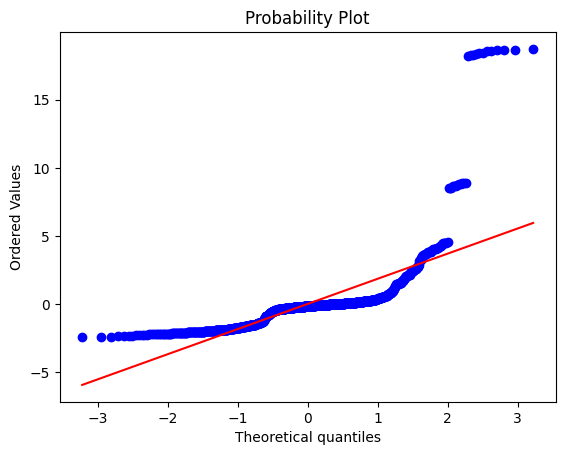

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Q-Q plot
stats.probplot(model.resid, dist="norm", plot=plt)
plt.show()


Homogeneity of Variance:

Variance of residuals should be constant across groups.
Use Levene’s test:

In [ ]:
from scipy.stats import levene

levene_test = levene(final_merged_data['Total_Cases'], model.fittedvalues)
print("Levene's test p-value:", levene_test.pvalue)


Levene's test p-value: 0.25802231820353344


Step 7: Visualize Results
Once the ANCOVA is complete, you can visualize the adjusted effects:

Predicted vs. Actual

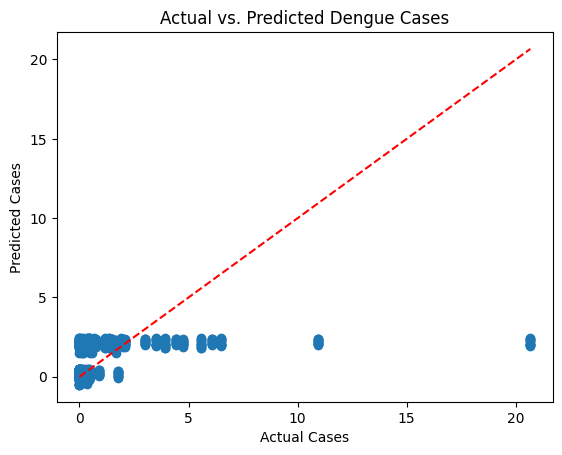

In [ ]:
plt.scatter(final_merged_data['Total_Cases'], model.fittedvalues)
plt.plot([0, max(final_merged_data['Total_Cases'])], [0, max(final_merged_data['Total_Cases'])], 'r--')
plt.title('Actual vs. Predicted Dengue Cases')
plt.xlabel('Actual Cases')
plt.ylabel('Predicted Cases')
plt.show()


Effects of Covariates
Plot partial regression plots to show the influence of each independent variable:

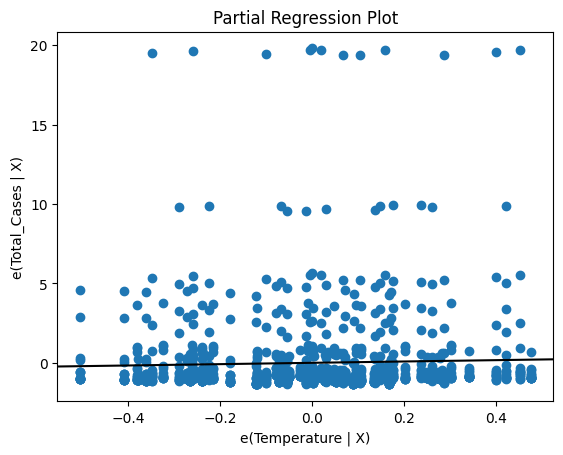

In [ ]:
sm.graphics.plot_partregress('Total_Cases', 'Temperature', ['Precipitation', 'NDVI'], data=final_merged_data, obs_labels=False)
plt.show()


Step 8: Report Results
Summarize the findings for your study, including:

The significance and direction of the effect of each variable.
Adjusted R-squared and F-statistic values.
Interpretation of residual diagnostics and assumption tests.

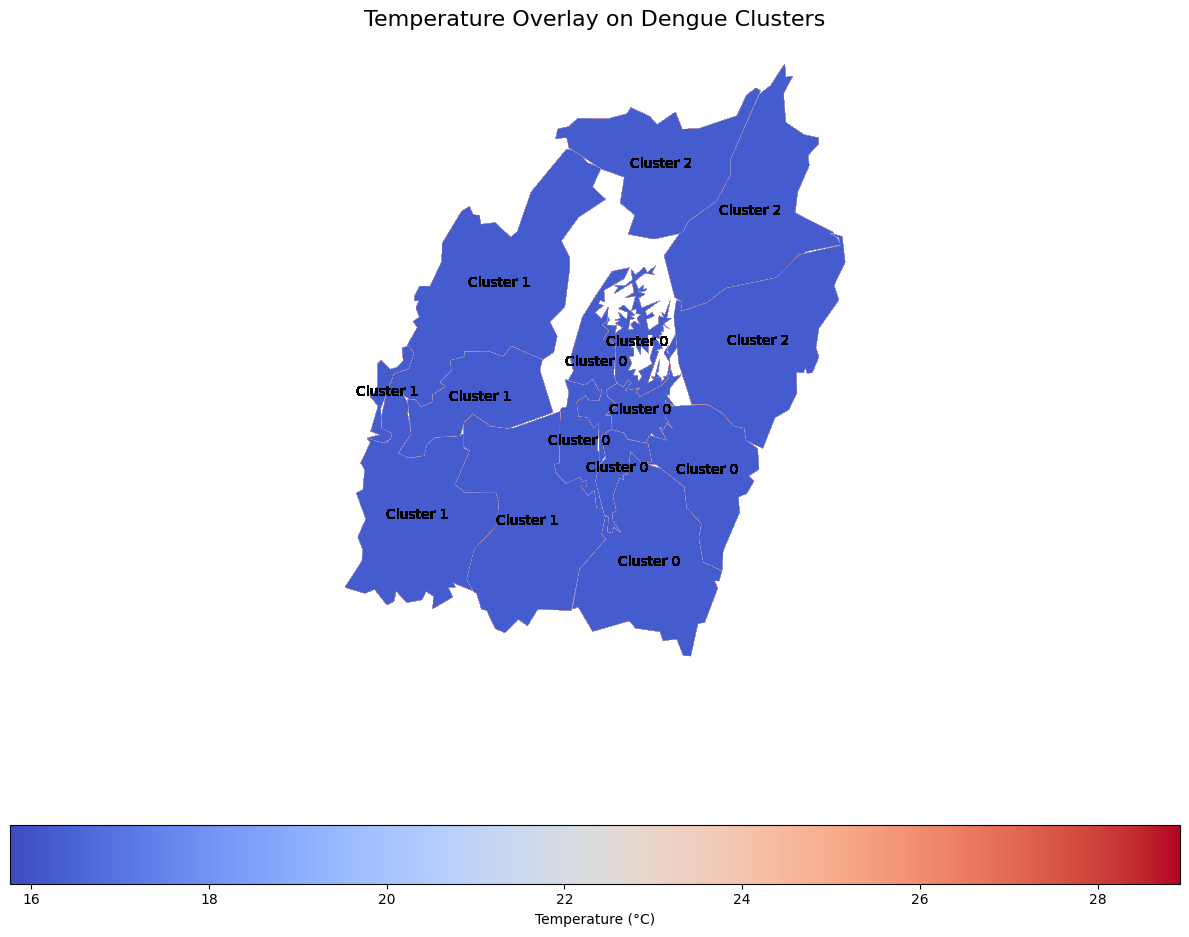

In [ ]:
# Fix the CRS issue and re-project to a suitable CRS
if not projected_gdf.crs.is_projected:
    projected_gdf = projected_gdf.to_crs(epsg=32646)  # Example: Use UTM Zone 46N (adjust for your location)

# Overlay climatic data on clusters
fig, ax = plt.subplots(1, 1, figsize=(12, 10))  # Ensure figure size is manageable
projected_gdf.plot(column='Temperature (°C)', ax=ax, legend=True, cmap='coolwarm',
                   legend_kwds={'label': 'Temperature (°C)', 'orientation': 'horizontal'})

# Add cluster labels (ensure correct projection for centroids)
for x, y, label in zip(projected_gdf.geometry.centroid.x, projected_gdf.geometry.centroid.y, final_merged_data['Cluster']):
    ax.text(x, y, f"Cluster {label}", fontsize=10, ha='center', va='center', color='black')

# Add title and axis styling
plt.title('Temperature Overlay on Dengue Clusters', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


To help you explore ANCOVA in your case, we will focus on testing if the Total_Cases differ significantly across the Cluster groups while adjusting for continuous covariates such as Temperature, Precipitation, and NDVI. We will also explore whether there are interactions between the Cluster and these continuous variables, which might suggest that the relationship between the covariates and the outcome depends on the group (Cluster).

Steps for Conducting ANCOVA in Python (using statsmodels):
Here's the full code to perform ANCOVA on your dataset:

Install and import necessary packages:

In [ ]:
!pip install statsmodels
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


Prepare the Data: You need to ensure your Cluster variable is treated as a categorical factor and that continuous variables like Temperature, Precipitation, and NDVI are included.

In [ ]:
# Assuming you have a DataFrame named 'spatial_data' or 'final_merged_data' containing the 'Cluster' column
# Replace 'spatial_data' with the actual name of your DataFrame if different

# Option 1: If you have a DataFrame named 'spatial_data'
df = spatial_data.copy()  # Create a copy to avoid modifying the original DataFrame

# Option 2: If you have a DataFrame named 'final_merged_data'
# df = final_merged_data.copy()  # Create a copy to avoid modifying the original DataFrame


df['Cluster'] = df['Cluster'].astype('category')  # Make sure Cluster is a categorical variable

Define the ANCOVA Model: The model will include Cluster as the categorical factor and the continuous covariates (Temperature, Precipitation, NDVI) as independent variables. We will also include interaction terms to test if the effect of the continuous variables on Total_Cases differs across Clusters.

In [ ]:
# Create the ANCOVA model with interaction terms between Cluster and continuous predictors
model = ols('Total_Cases ~ Cluster * Temperature + Cluster * Precipitation + Cluster * NDVI', data=df).fit()


PatsyError: Error evaluating factor: NameError: name 'Total_Cases' is not defined
    Total_Cases ~ Cluster * Temperature + Cluster * Precipitation + Cluster * NDVI
    ^^^^^^^^^^^

In [ ]:
print(df.head())  # Check the first few rows of the dataframe


    District  Latitude  Longitude  Total Cases Cluster
0  Bishnupur     24.62      93.78            0       2
1  Bishnupur     24.62      93.78            0       2
2  Bishnupur     24.62      93.78            0       2
3  Bishnupur     24.62      93.78            0       2
4  Bishnupur     24.62      93.78            0       2


In [ ]:
print(spatial_data.head())  # Or final_merged_data.head() if using that DataFrame

    District  Latitude  Longitude  Total Cases  Cluster
0  Bishnupur     24.62      93.78            0        2
1  Bishnupur     24.62      93.78            0        2
2  Bishnupur     24.62      93.78            0        2
3  Bishnupur     24.62      93.78            0        2
4  Bishnupur     24.62      93.78            0        2
